In [1]:
import pandas as pd
import numpy as np
import time
import pymysql
from sshtunnel import SSHTunnelForwarder
import matplotlib.pyplot as plt

### Loading mysql config

In [2]:
mysql_configure = pd.read_csv("Y:/Yuan/temp/mysql_connection.csv",index_col=0)

In [3]:
sql_hostname = mysql_configure.loc["sql_hostname",]["value"]
sql_username = mysql_configure.loc["sql_username",]["value"]
sql_password = mysql_configure.loc["sql_password",]["value"]
sql_main_database = mysql_configure.loc["sql_main_database",]["value"]
sql_port = mysql_configure.loc["sql_port",]["value"]
ssh_host = mysql_configure.loc["ssh_host",]["value"]
ssh_user = mysql_configure.loc["ssh_user",]["value"]
ssh_password = mysql_configure.loc["ssh_password",]["value"]
ssh_port = mysql_configure.loc["ssh_port",]["value"]

In [7]:
with SSHTunnelForwarder(
        (ssh_host, int(ssh_port)),
        ssh_username=ssh_user,
        ssh_password=ssh_password,
        remote_bind_address=('127.0.0.1', int(sql_port))) as tunnel:
    print('SSH connected')
    conn = pymysql.connect(host='127.0.0.1', user=sql_username,
            passwd=sql_password, db=sql_main_database,
            port=tunnel.local_bind_port)
    try:
        with conn as cursor: #auto commit; no close() called
            with cursor: # close() called here
                sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s "
                sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1=s.Seq and da.Res_1 = \"SER\" and da.Res_2 = \"HIS\";"    
                sql = sql_select+sql_where
                data = pd.read_sql_query(sql, conn)

    except Exception as e: # catch exceptions
        print("~~~~~~~~~~~~~~")
        print(e)
    finally:
        if conn:
            conn.close()


SSH connected


### Utils for data queries

In [59]:
def Two_active_residues_retrieval(residue_1,residue_2):
    data, data_1, data_2 = None, None, None
    with SSHTunnelForwarder(
        (ssh_host, int(ssh_port)),
        ssh_username=ssh_user,
        ssh_password=ssh_password,
        remote_bind_address=('127.0.0.1', int(sql_port))) as tunnel:
            print('SSH connected')
            conn = pymysql.connect(host='127.0.0.1', user=sql_username,
                    passwd=sql_password, db=sql_main_database,
                    port=tunnel.local_bind_port)
            try:
                with conn as cursor: #auto commit; no close() called
                    with cursor: # close() called here
                        sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s,pdbdb.Site s2 "
                        sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1=s.Seq and da.Res_1 = \"{}\" and da.pdbID = s2.pdbID and da.chain = s2.chain and da.ID_2=s2.Seq and da.Res_2 = \"{}\" ;".format(residue_1,residue_2)    
                        sql = sql_select+sql_where
                        data_1 = pd.read_sql_query(sql, conn)
                        sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s, pdbdb.Site s2 "
                        sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1=s.Seq and da.Res_1 = \"{}\" and da.pdbID = s2.pdbID and da.chain = s2.chain and da.ID_2=s2.Seq and da.Res_2 = \"{}\" ;".format(residue_2,residue_1)    
                        sql = sql_select+sql_where
                        data_2 = pd.read_sql_query(sql, conn)                        
                        data = pd.concat([data_1,data_2])
                    
            except Exception as e: # catch exceptions
                print("~~~~~~~~~~~~~~")
                print(e)
            finally:
                if conn:
                    conn.close()
    return(data)

def Two_nonactive_residues_retrieval(residue_1,residue_2):
    data, data_1, data_2 = None, None, None
    with SSHTunnelForwarder(
        (ssh_host, int(ssh_port)),
        ssh_username=ssh_user,
        ssh_password=ssh_password,
        remote_bind_address=('127.0.0.1', int(sql_port))) as tunnel:
            print('SSH connected')
            conn = pymysql.connect(host='127.0.0.1', user=sql_username,
                    passwd=sql_password, db=sql_main_database,
                    port=tunnel.local_bind_port)
            try:
                with conn as cursor: #auto commit; no close() called
                    with cursor: # close() called here
                        sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s,pdbdb.Site s2 "
                        sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1 != s.Seq and da.Res_1 = \"{}\" and da.pdbID = s2.pdbID and da.chain = s2.chain and da.ID_2 != s2.Seq and da.Res_2 = \"{}\" ;".format(residue_1,residue_2)    
                        sql = sql_select+sql_where
                        data_1 = pd.read_sql_query(sql, conn)
                        sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s, pdbdb.Site s2 "
                        sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1 != s.Seq and da.Res_1 = \"{}\" and da.pdbID = s2.pdbID and da.chain = s2.chain and da.ID_2 != s2.Seq and da.Res_2 = \"{}\" ;".format(residue_2,residue_1)    
                        sql = sql_select+sql_where
                        data_2 = pd.read_sql_query(sql, conn)                        
                        data = pd.concat([data_1,data_2])
                    
            except Exception as e: # catch exceptions
                print("~~~~~~~~~~~~~~")
                print(e)
            finally:
                if conn:
                    conn.close()
    return(data)

def Active_nonactive_residues_retrieval(residue_1,residue_2):
    data, data_1, data_2 = None, None, None
    with SSHTunnelForwarder(
        (ssh_host, int(ssh_port)),
        ssh_username=ssh_user,
        ssh_password=ssh_password,
        remote_bind_address=('127.0.0.1', int(sql_port))) as tunnel:
            print('SSH connected')
            conn = pymysql.connect(host='127.0.0.1', user=sql_username,
                    passwd=sql_password, db=sql_main_database,
                    port=tunnel.local_bind_port)
            try:
                with conn as cursor: #auto commit; no close() called
                    with cursor: # close() called here
                        sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s,pdbdb.Site s2 "
                        sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1 = s.Seq and da.Res_1 = \"{}\" and da.pdbID = s2.pdbID and da.chain = s2.chain and da.ID_2 != s2.Seq and da.Res_2 = \"{}\" ;".format(residue_1,residue_2)    
                        sql = sql_select+sql_where
                        data_1 = pd.read_sql_query(sql, conn)
                        sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s, pdbdb.Site s2 "
                        sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1 != s.Seq and da.Res_1 = \"{}\" and da.pdbID = s2.pdbID and da.chain = s2.chain and da.ID_2 = s2.Seq and da.Res_2 = \"{}\" ;".format(residue_2,residue_1)    
                        sql = sql_select+sql_where
                        data_2 = pd.read_sql_query(sql, conn)                        
                        data = pd.concat([data_1,data_2])
                    
            except Exception as e: # catch exceptions
                print("~~~~~~~~~~~~~~")
                print(e)
            finally:
                if conn:
                    conn.close()
    return(data)

def Nonactive_active_residues_retrieval(residue_1,residue_2):
    data, data_1, data_2 = None, None, None
    with SSHTunnelForwarder(
        (ssh_host, int(ssh_port)),
        ssh_username=ssh_user,
        ssh_password=ssh_password,
        remote_bind_address=('127.0.0.1', int(sql_port))) as tunnel:
            print('SSH connected')
            conn = pymysql.connect(host='127.0.0.1', user=sql_username,
                    passwd=sql_password, db=sql_main_database,
                    port=tunnel.local_bind_port)
            try:
                with conn as cursor: #auto commit; no close() called
                    with cursor: # close() called here
                        sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s,pdbdb.Site s2 "
                        sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1 != s.Seq and da.Res_1 = \"{}\" and da.pdbID = s2.pdbID and da.chain = s2.chain and da.ID_2 = s2.Seq and da.Res_2 = \"{}\" ;".format(residue_1,residue_2)    
                        sql = sql_select+sql_where
                        data_1 = pd.read_sql_query(sql, conn)
                        sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s, pdbdb.Site s2 "
                        sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1 = s.Seq and da.Res_1 = \"{}\" and da.pdbID = s2.pdbID and da.chain = s2.chain and da.ID_2 != s2.Seq and da.Res_2 = \"{}\" ;".format(residue_2,residue_1)    
                        sql = sql_select+sql_where
                        data_2 = pd.read_sql_query(sql, conn)                        
                        data = pd.concat([data_1,data_2])
                    
            except Exception as e: # catch exceptions
                print("~~~~~~~~~~~~~~")
                print(e)
            finally:
                if conn:
                    conn.close()
    return(data)

def Two_all_residues_retrieval(residue_1,residue_2):
    data, data_1, data_2 = None, None, None
    with SSHTunnelForwarder(
        (ssh_host, int(ssh_port)),
        ssh_username=ssh_user,
        ssh_password=ssh_password,
        remote_bind_address=('127.0.0.1', int(sql_port))) as tunnel:
            print('SSH connected')
            conn = pymysql.connect(host='127.0.0.1', user=sql_username,
                    passwd=sql_password, db=sql_main_database,
                    port=tunnel.local_bind_port)
            try:
                with conn as cursor: #auto commit; no close() called
                    with cursor: # close() called here
                        sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s,pdbdb.Site s2 "
                        sql_where = "WHERE da.Res_1 = \"{}\" and da.Res_2 = \"{}\" ;".format(residue_1,residue_2)    
                        sql = sql_select+sql_where
                        data_1 = pd.read_sql_query(sql, conn)
                        sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s, pdbdb.Site s2 "
                        sql_where = "WHERE da.Res_1 = \"{}\" andda.Res_2 = \"{}\" ;".format(residue_2,residue_1)    
                        sql = sql_select+sql_where
                        data_2 = pd.read_sql_query(sql, conn)                        
                        data = pd.concat([data_1,data_2])
                    
            except Exception as e: # catch exceptions
                print("~~~~~~~~~~~~~~")
                print(e)
            finally:
                if conn:
                    conn.close()
    return(data)



def Two_residues_generic_retrieval(residue_1,residue_2,active_1,active_2):
    data, data_1, data_2 = None, None, None
    with SSHTunnelForwarder(
        (ssh_host, int(ssh_port)),
        ssh_username=ssh_user,
        ssh_password=ssh_password,
        remote_bind_address=('127.0.0.1', int(sql_port))) as tunnel:
            print('SSH connected')
            conn = pymysql.connect(host='127.0.0.1', user=sql_username,
                    passwd=sql_password, db=sql_main_database,
                    port=tunnel.local_bind_port)
            try:
                with conn as cursor: #auto commit; no close() called
                    with cursor: # close() called here
                        
                        #not pairewise anymore
#                         sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s,pdbdb.Site s2 "
#                         sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1 {} s.Seq and da.Res_1 = \"{}\" and da.pdbID = s2.pdbID and da.chain = s2.chain and da.ID_2 {} s2.Seq and da.Res_2 = \"{}\" ;".format(active_1,residue_1,active_2,residue_2)    
#                         sql = sql_select+sql_where
#                         data_1 = pd.read_sql_query(sql, conn)
#                         sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s, pdbdb.Site s2 "
#                         sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1 {} s.Seq and da.Res_1 = \"{}\" and da.pdbID = s2.pdbID and da.chain = s2.chain and da.ID_2 {} s2.Seq and da.Res_2 = \"{}\" ;".format(active_2,residue_2,active_1,residue_1)    
#                         sql = sql_select+sql_where
#                         data_2 = pd.read_sql_query(sql, conn)                        
#                         data = pd.concat([data_1,data_2])
                        sql_select = "Select da.* FROM pdbdb.`Distance_angle2.0` da, pdbdb.Site s,pdbdb.Site s2 "
                        sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1 {} s.Seq and da.Res_1 = \"{}\" and da.pdbID = s2.pdbID and da.chain = s2.chain and da.ID_2 {} s2.Seq and da.Res_2 = \"{}\" ;".format(active_1,residue_1,active_2,residue_2)    
                        sql = sql_select+sql_where
                        data_1 = pd.read_sql_query(sql, conn)
                        data = data_1

                    
            except Exception as e: # catch exceptions
                print("~~~~~~~~~~~~~~")
                print(e)
            finally:
                if conn:
                    conn.close()
    return(data)

In [148]:
active_data = Two_residues_generic_retrieval("HIS","SER","!=","!=")
active_data = active_data[active_data["Distance"]<17]

SSH connected


SSH connected
SSH connected
SSH connected
SSH connected


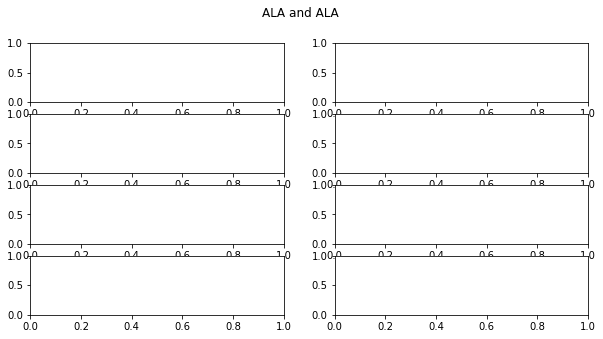

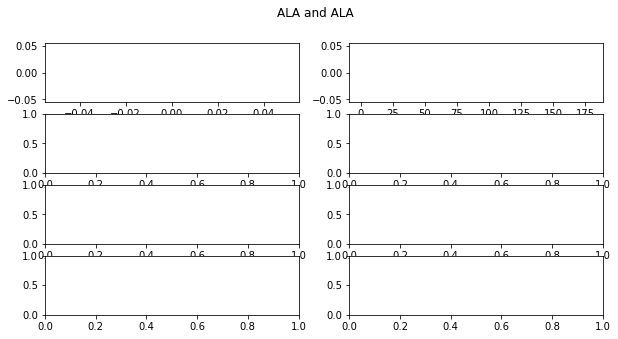

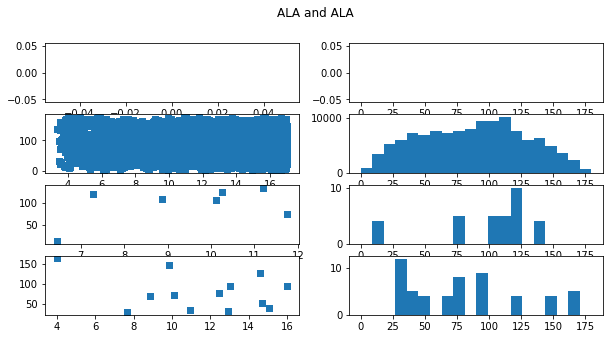

SSH connected
SSH connected
SSH connected
SSH connected


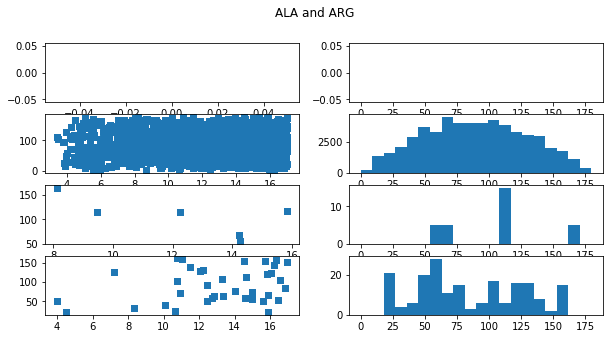

SSH connected
SSH connected
SSH connected
SSH connected


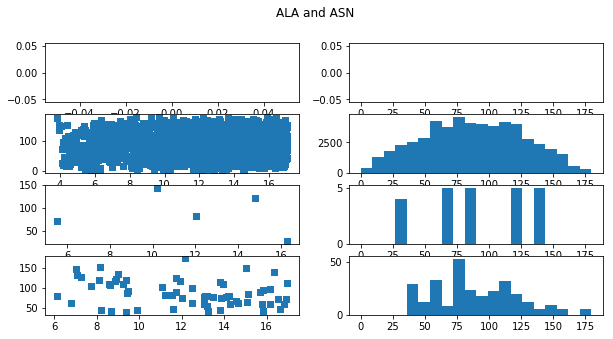

SSH connected
SSH connected
SSH connected
SSH connected


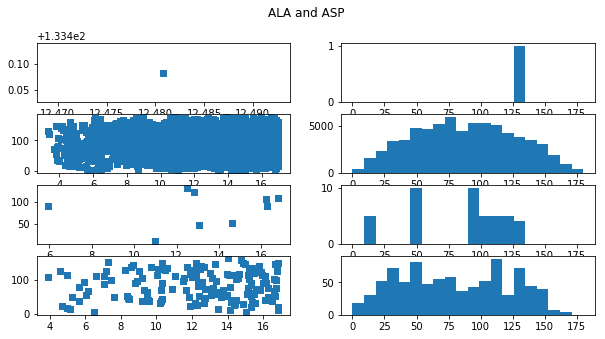

SSH connected
SSH connected
SSH connected
SSH connected


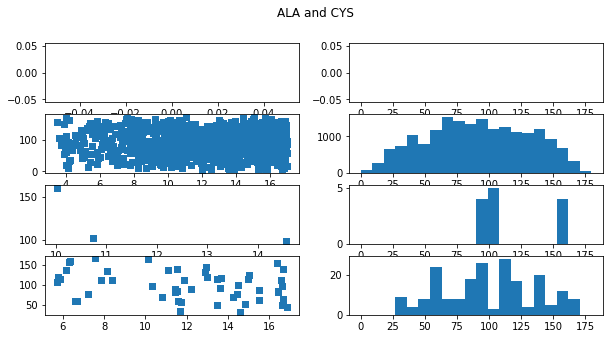

SSH connected
SSH connected
SSH connected
SSH connected


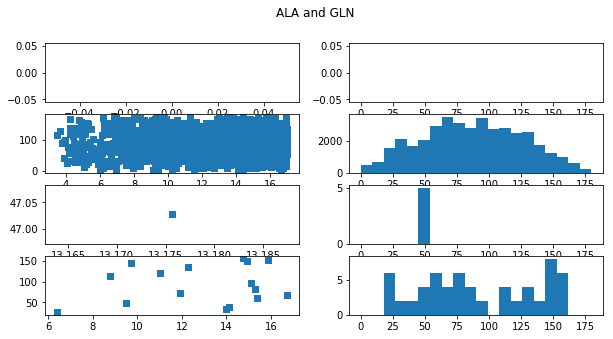

SSH connected
SSH connected
SSH connected
SSH connected


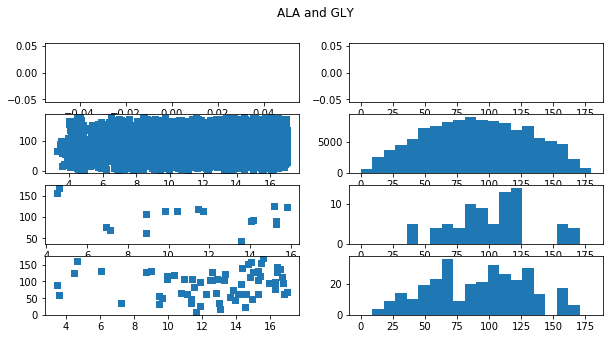

SSH connected
SSH connected
SSH connected
SSH connected


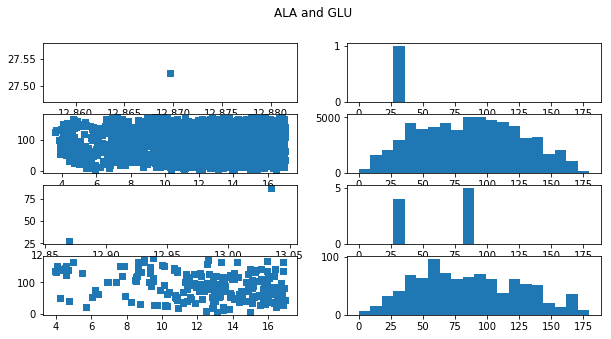

SSH connected
SSH connected
SSH connected
SSH connected


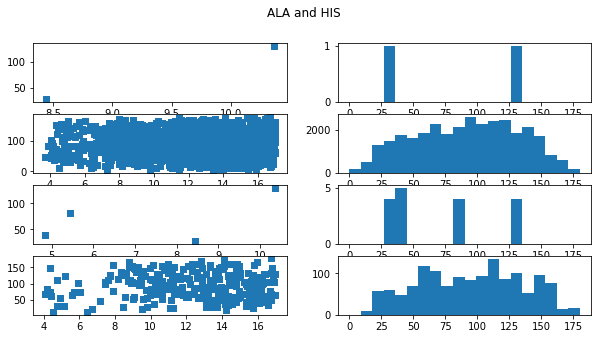

SSH connected
SSH connected
SSH connected
SSH connected


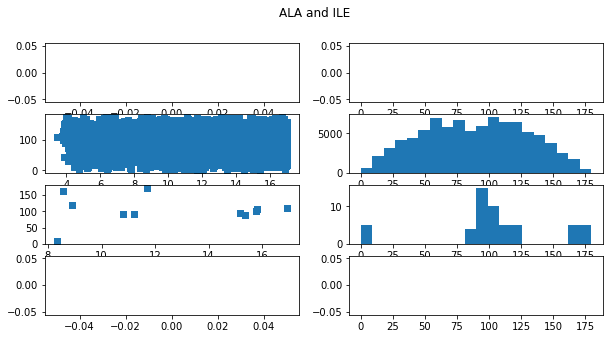

SSH connected
SSH connected
SSH connected
SSH connected


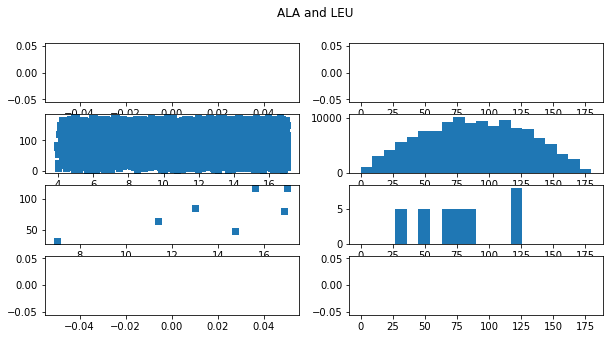

SSH connected
SSH connected
SSH connected
SSH connected


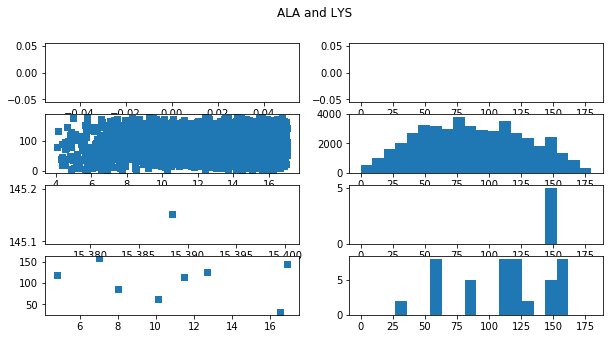

SSH connected
SSH connected
SSH connected
SSH connected


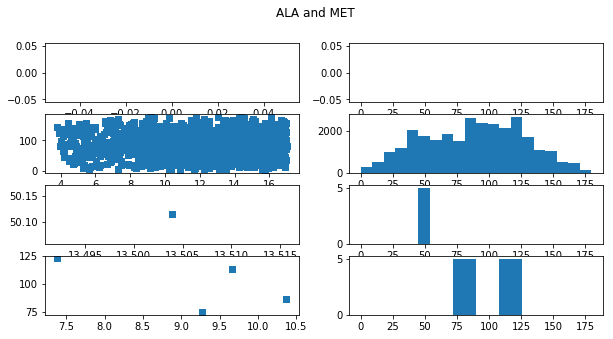

SSH connected
SSH connected
SSH connected
SSH connected


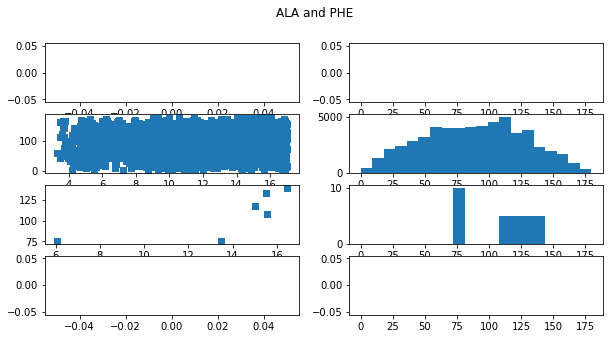

SSH connected
SSH connected
SSH connected
SSH connected


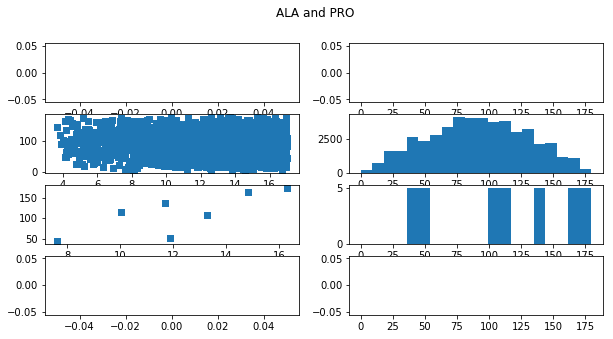

SSH connected
SSH connected
SSH connected
SSH connected


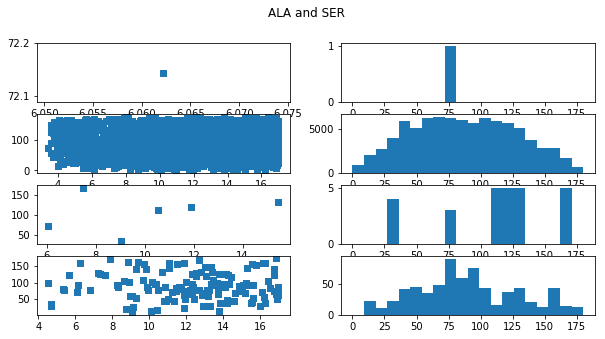

SSH connected
SSH connected
SSH connected
SSH connected


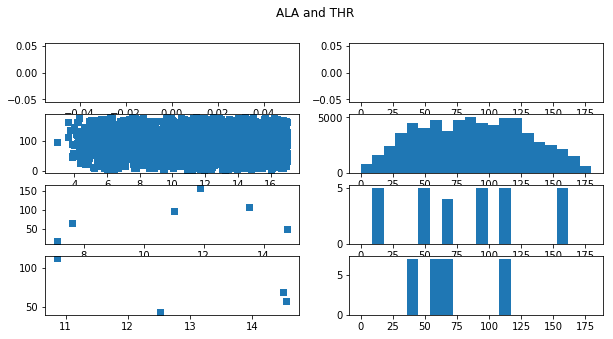

SSH connected
SSH connected
SSH connected
SSH connected


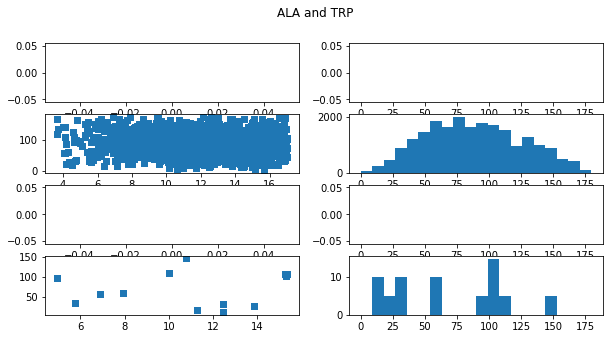

SSH connected
SSH connected
SSH connected
SSH connected


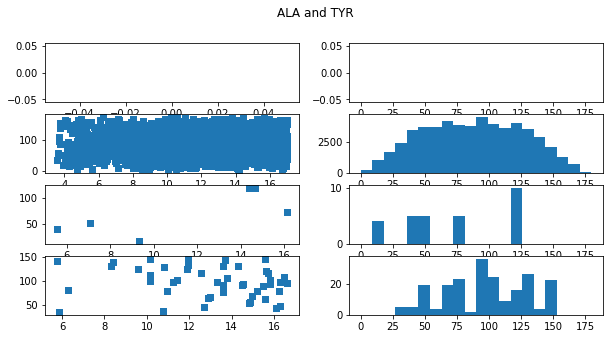

SSH connected
SSH connected
SSH connected
SSH connected


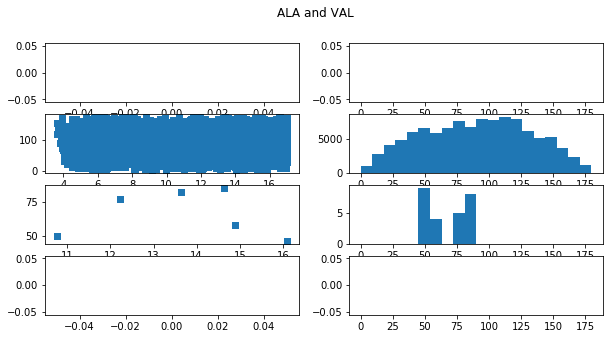

SSH connected
SSH connected
SSH connected
SSH connected


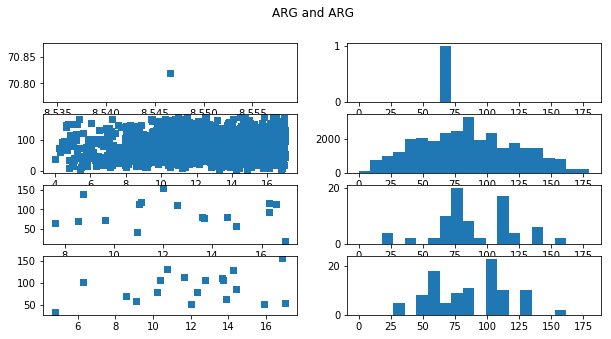

SSH connected
SSH connected
SSH connected
SSH connected


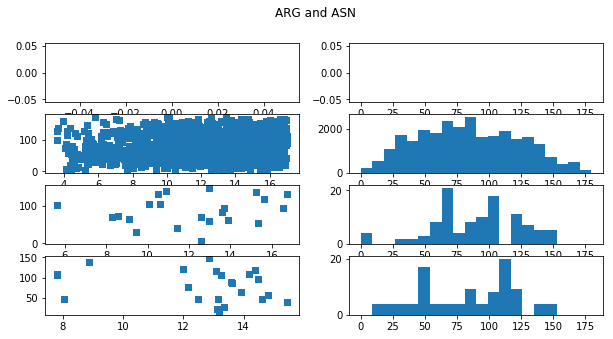

SSH connected
SSH connected
SSH connected
SSH connected


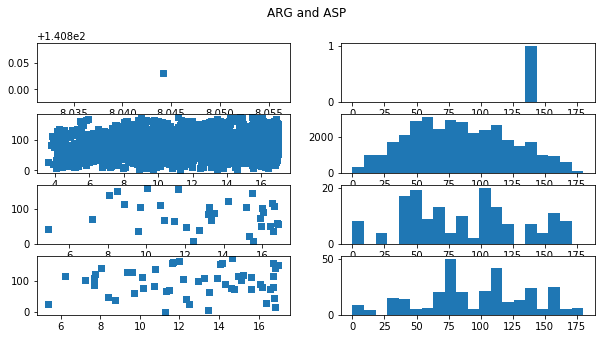

SSH connected
SSH connected
SSH connected
SSH connected


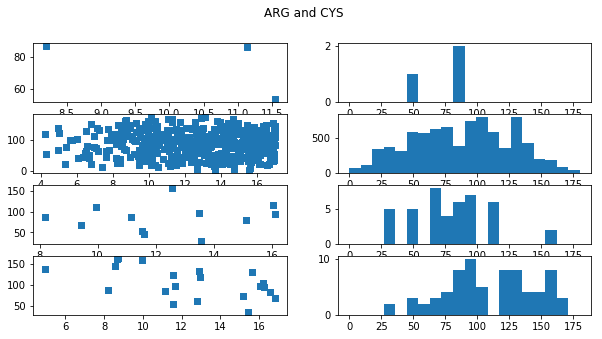

SSH connected
SSH connected
SSH connected
SSH connected


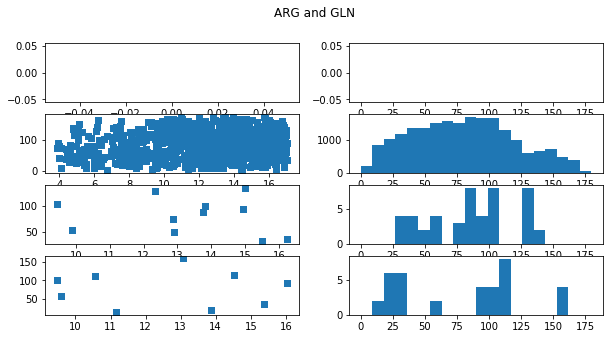

SSH connected
SSH connected
SSH connected
SSH connected


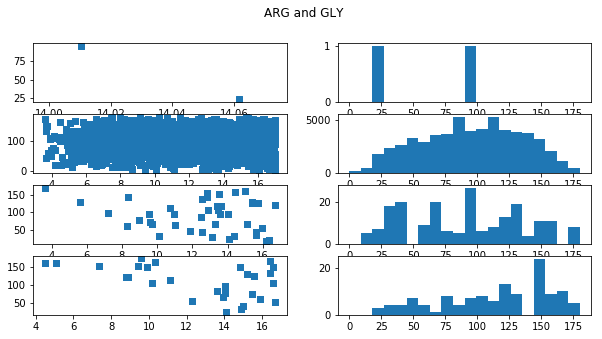

SSH connected
SSH connected
SSH connected
SSH connected


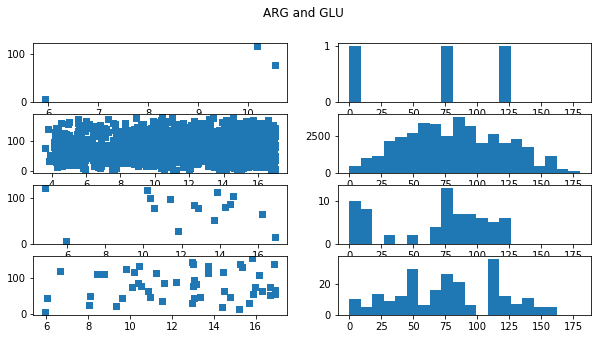

SSH connected
SSH connected
SSH connected
SSH connected


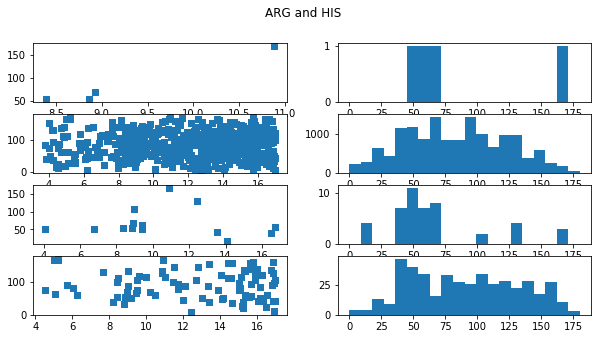

SSH connected
SSH connected
SSH connected
SSH connected


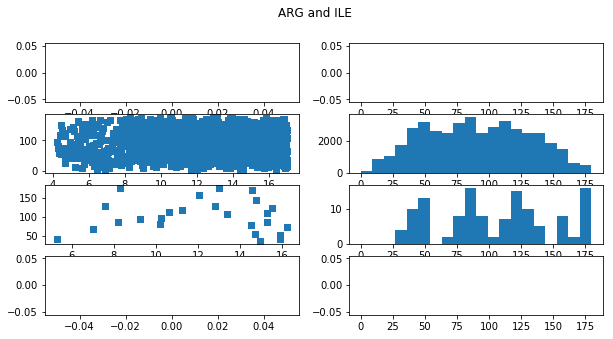

SSH connected
SSH connected
SSH connected
SSH connected


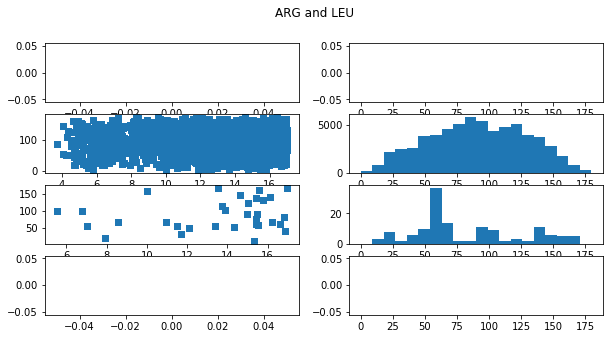

SSH connected
SSH connected
SSH connected
SSH connected


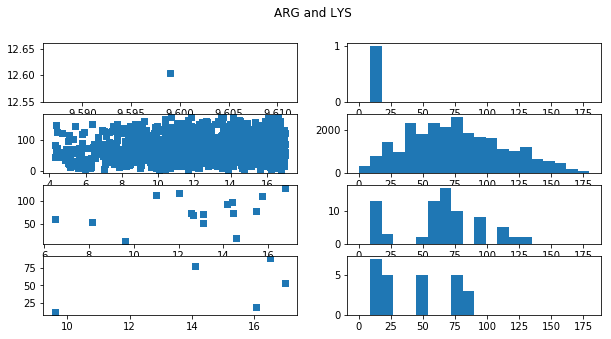

SSH connected
SSH connected
SSH connected
SSH connected


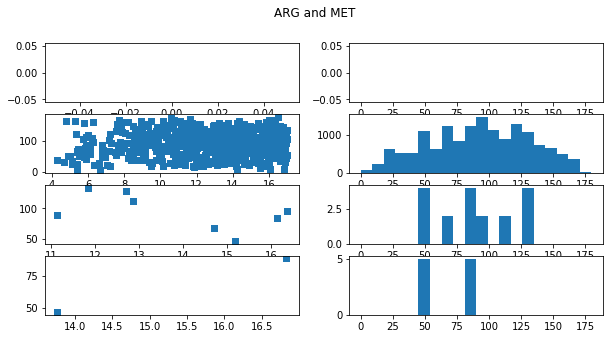

SSH connected
SSH connected
SSH connected


2019-10-17 10:16:34,963| ERROR   | Could not establish connection from ('127.0.0.1', 54820) to remote side of the tunnel


SSH connected


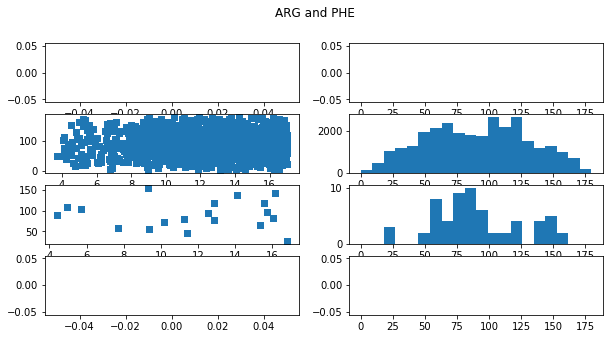

SSH connected
SSH connected
SSH connected
SSH connected


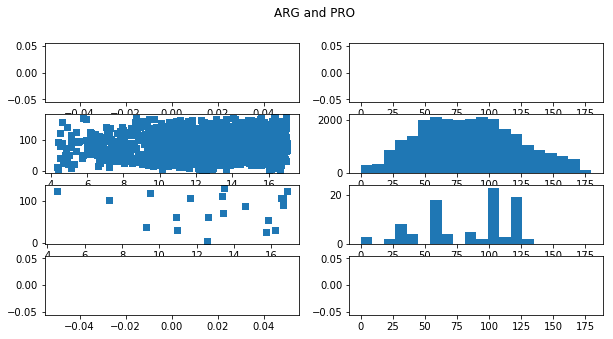

SSH connected
SSH connected
SSH connected
SSH connected


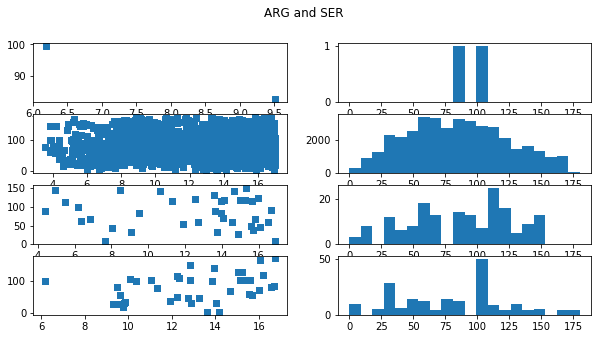

SSH connected
SSH connected
SSH connected
SSH connected


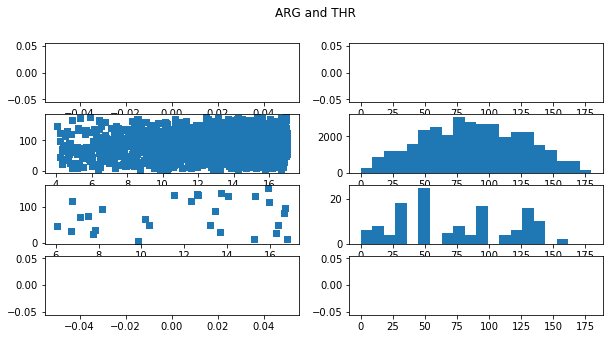

SSH connected
SSH connected
SSH connected
SSH connected


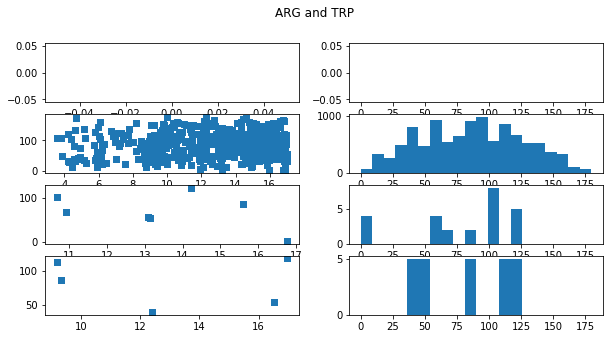

SSH connected
SSH connected
SSH connected
SSH connected


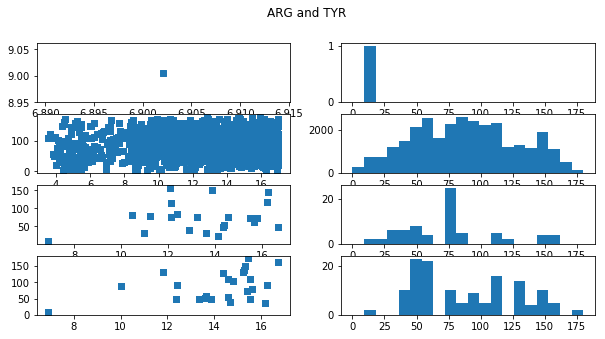

SSH connected
SSH connected
SSH connected
SSH connected


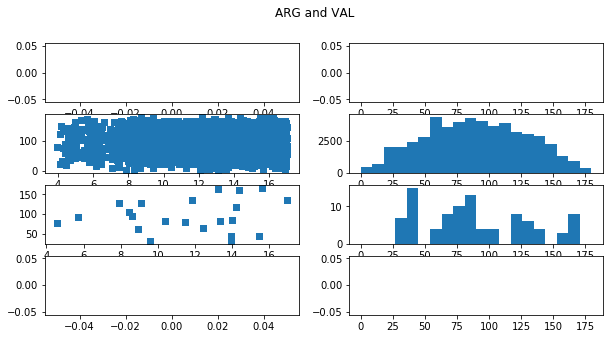

SSH connected
SSH connected
SSH connected
SSH connected


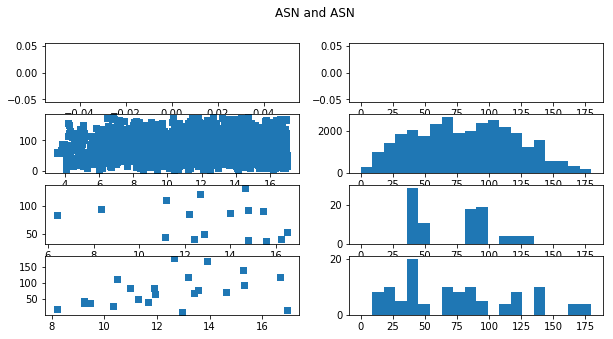

SSH connected
SSH connected
SSH connected
SSH connected


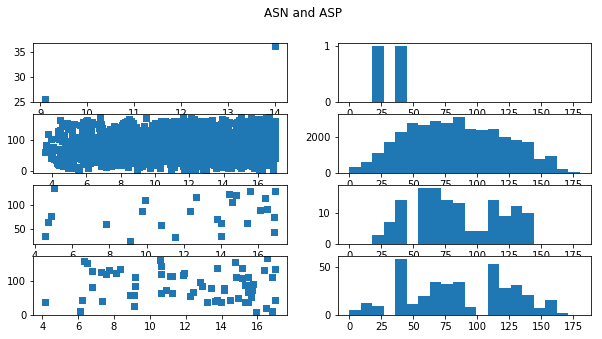

SSH connected
SSH connected
SSH connected
SSH connected


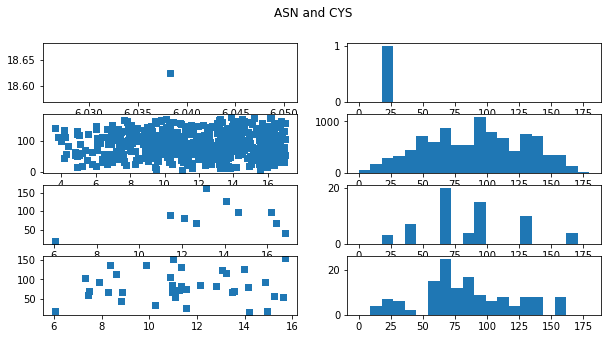

SSH connected
SSH connected
SSH connected
SSH connected


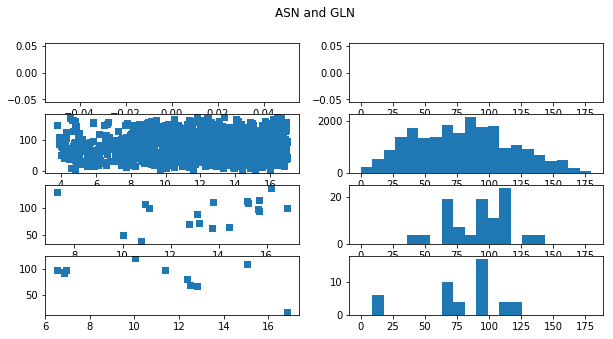

SSH connected
SSH connected
SSH connected
SSH connected


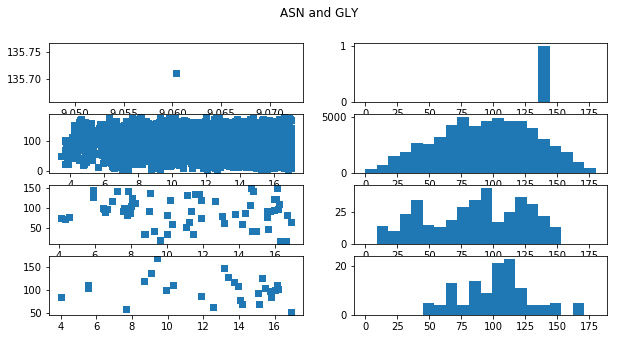

SSH connected
SSH connected
SSH connected
SSH connected


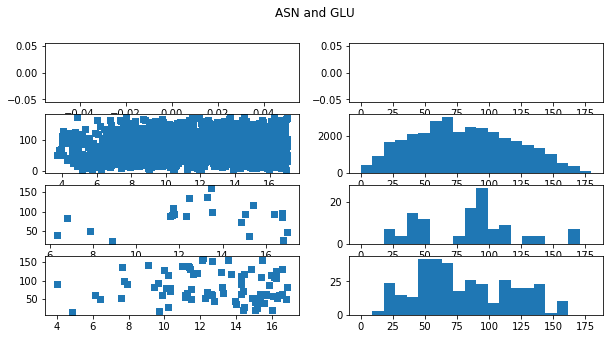

SSH connected
SSH connected
SSH connected
SSH connected


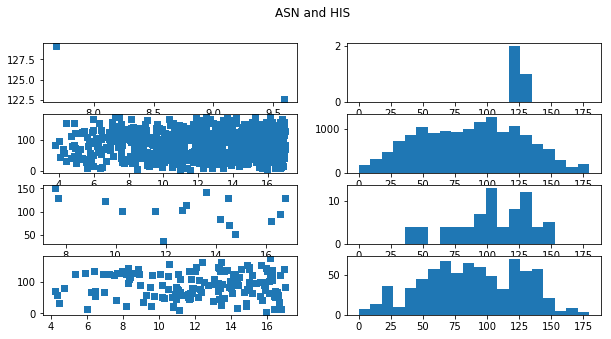

SSH connected
SSH connected
SSH connected
SSH connected


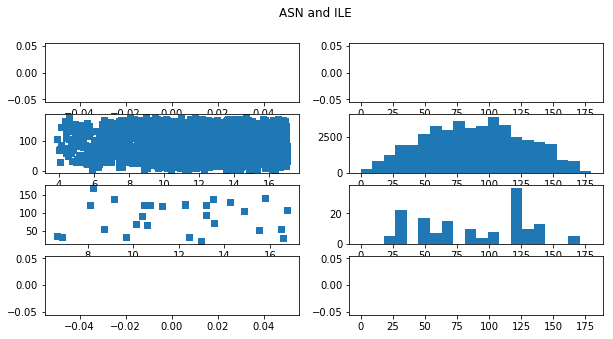

SSH connected
SSH connected
SSH connected
SSH connected


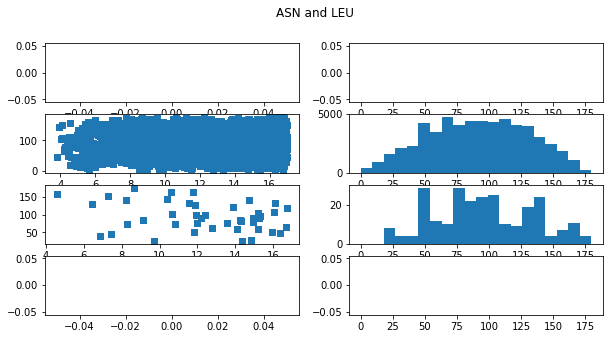

SSH connected
SSH connected
SSH connected
SSH connected


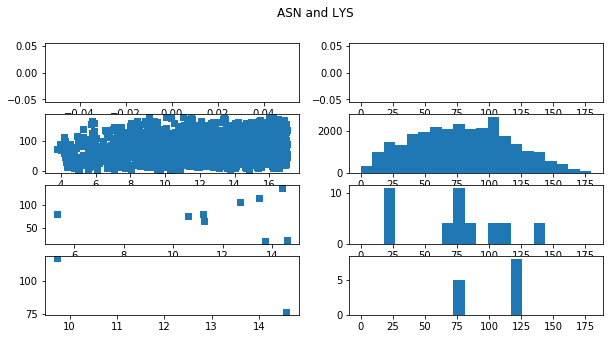

SSH connected
SSH connected
SSH connected
SSH connected


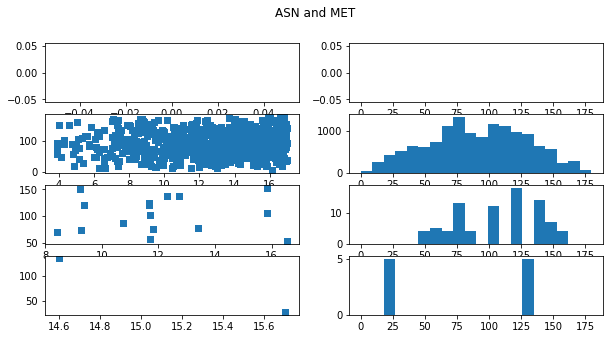

SSH connected
SSH connected
SSH connected
SSH connected


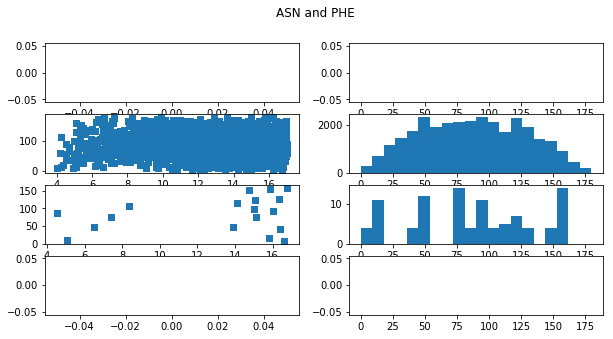

SSH connected
SSH connected
SSH connected
SSH connected


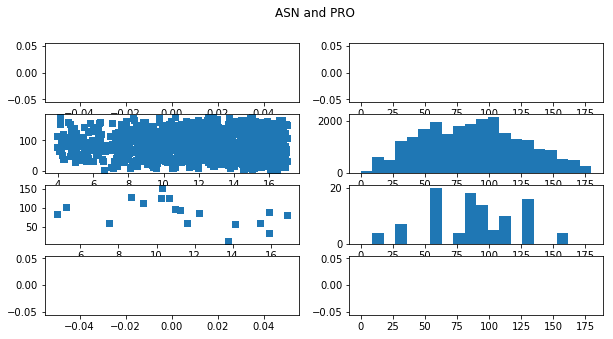

SSH connected
SSH connected
SSH connected
SSH connected


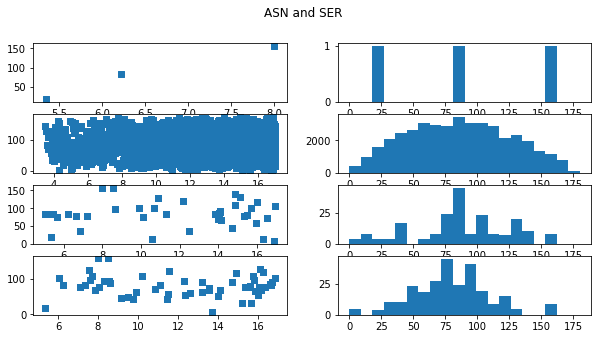

SSH connected
SSH connected
SSH connected
SSH connected


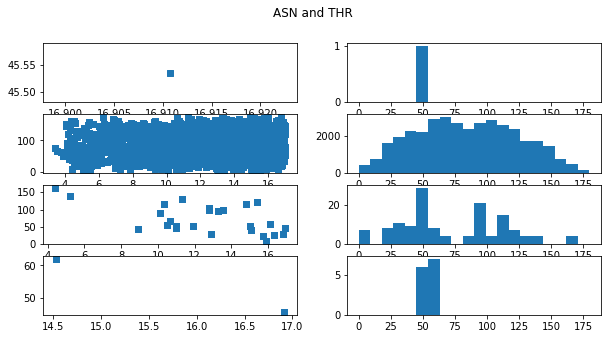

SSH connected
SSH connected
SSH connected
SSH connected


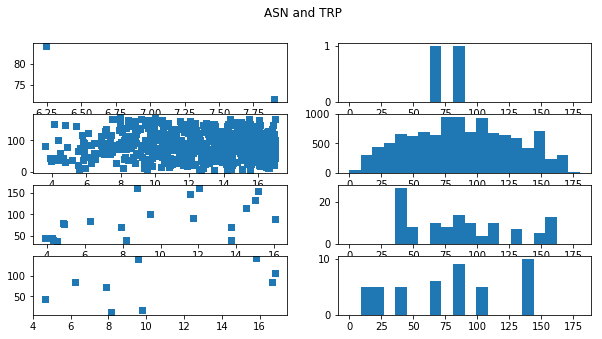

SSH connected
SSH connected
SSH connected
SSH connected


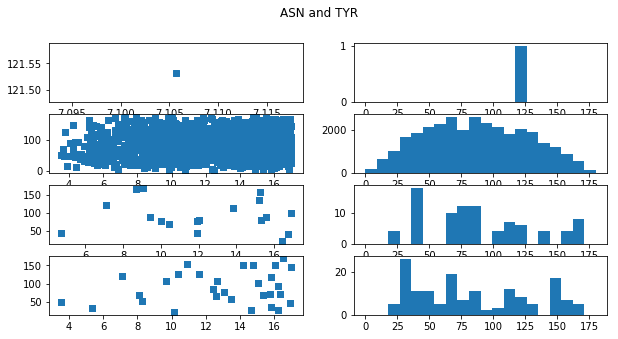

SSH connected
SSH connected
SSH connected
SSH connected


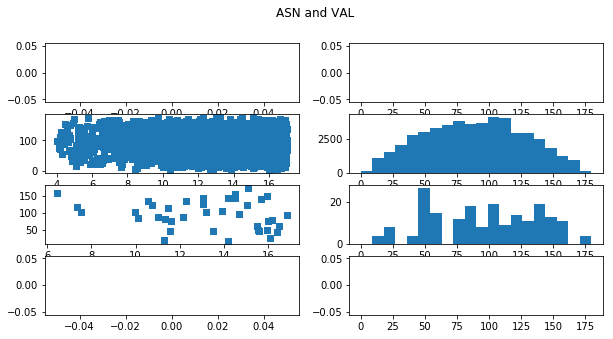

SSH connected
SSH connected
SSH connected
SSH connected


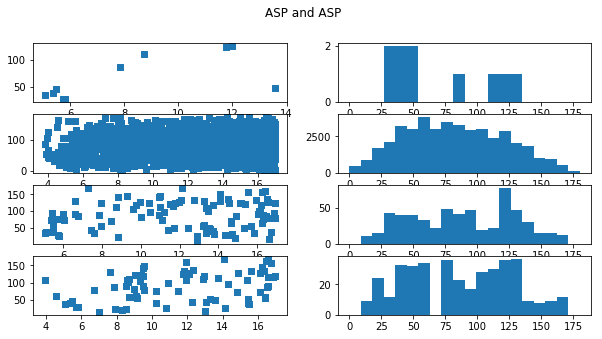

SSH connected
SSH connected
SSH connected
SSH connected


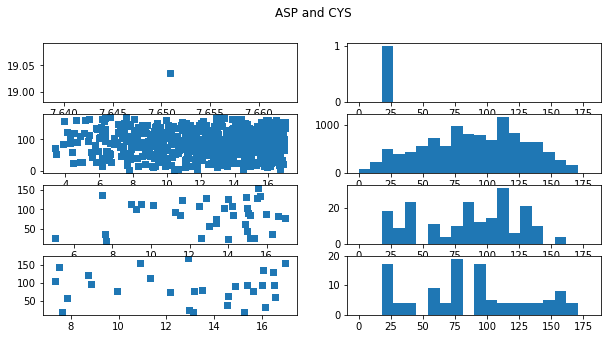

SSH connected
SSH connected
SSH connected
SSH connected


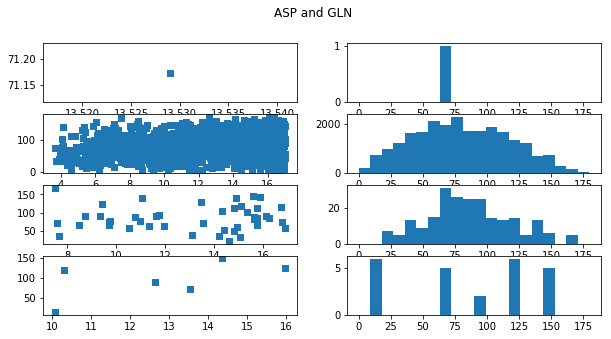

SSH connected
SSH connected
SSH connected
SSH connected


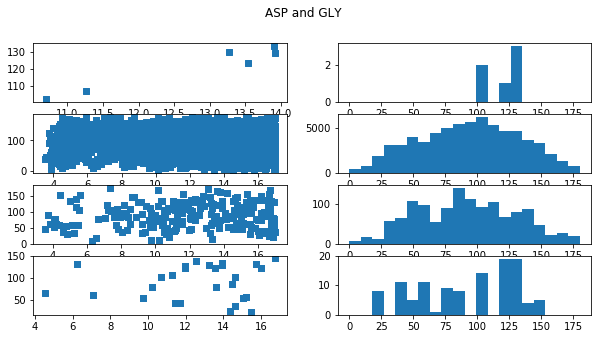

SSH connected
SSH connected
SSH connected
SSH connected


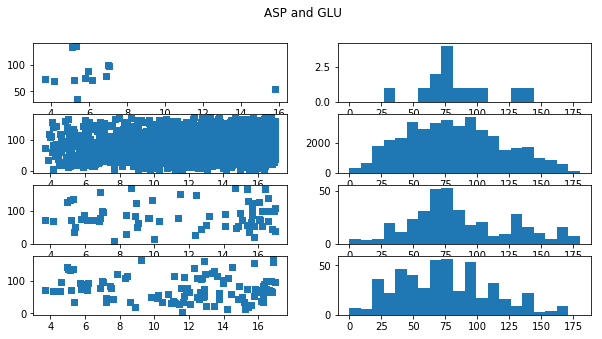

SSH connected
SSH connected
SSH connected
SSH connected


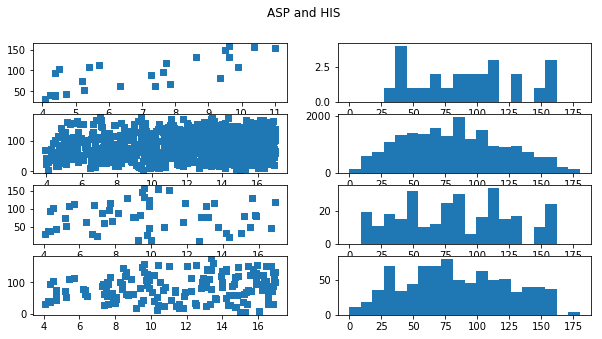

SSH connected
SSH connected
SSH connected
SSH connected


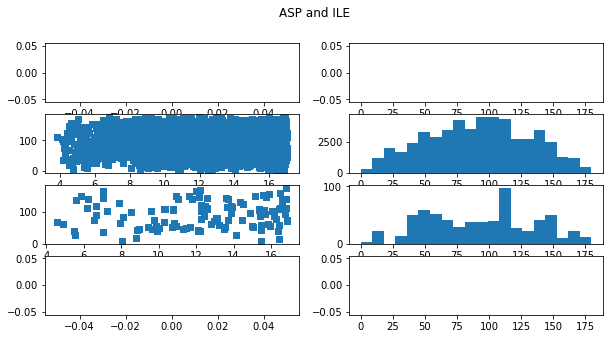

SSH connected
SSH connected
SSH connected
SSH connected


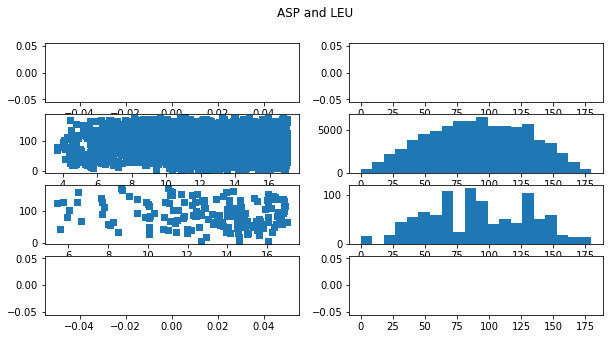

SSH connected
SSH connected
SSH connected
SSH connected


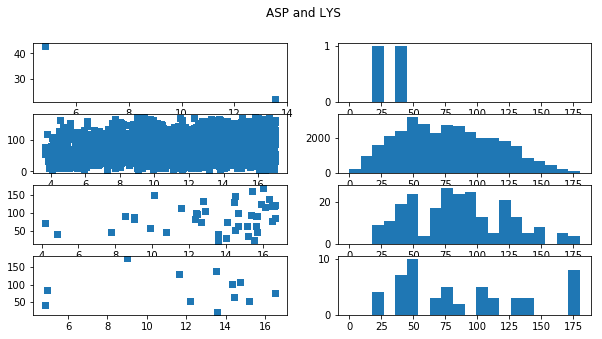

SSH connected
SSH connected
SSH connected
SSH connected


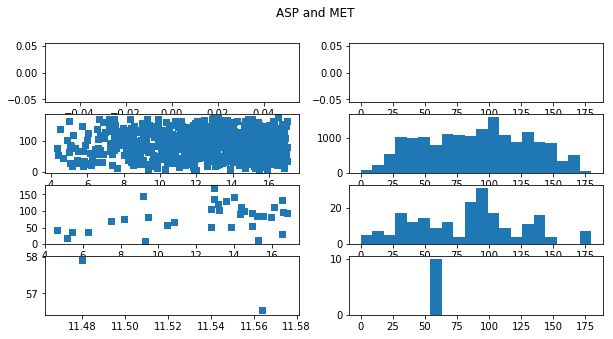

SSH connected
SSH connected
SSH connected
SSH connected


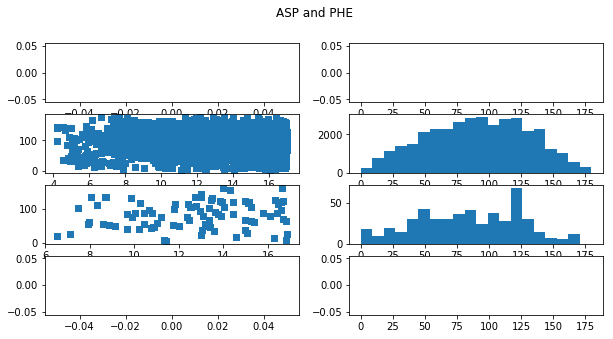

SSH connected
SSH connected
SSH connected
SSH connected


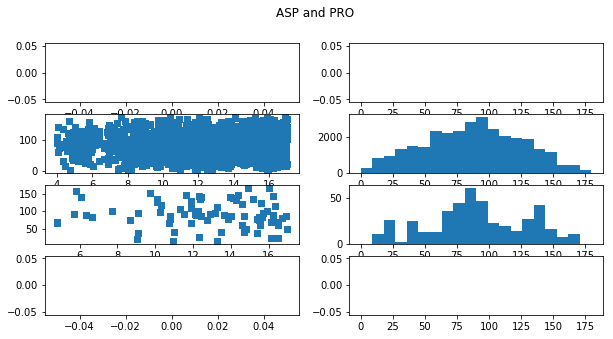

SSH connected
SSH connected
SSH connected
SSH connected


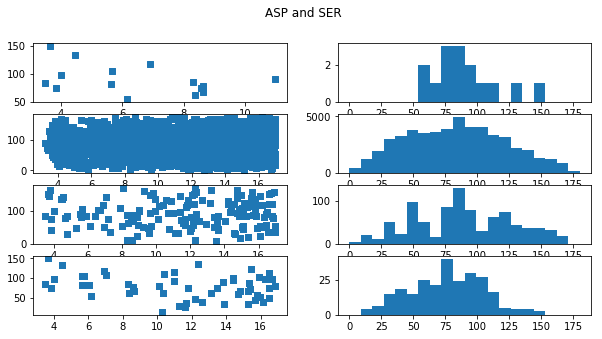

SSH connected
SSH connected
SSH connected
SSH connected


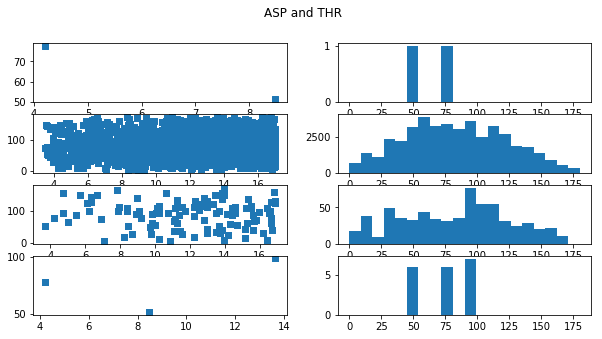

SSH connected
SSH connected
SSH connected
SSH connected


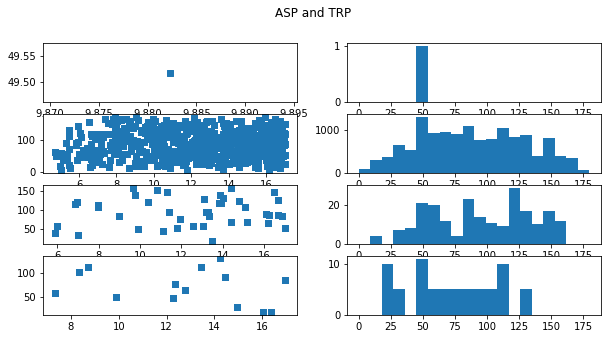

SSH connected
SSH connected
SSH connected
SSH connected


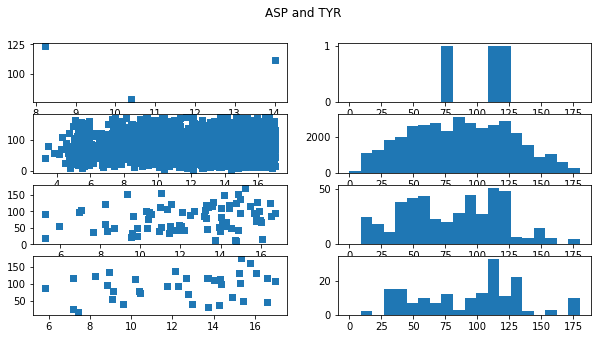

SSH connected
SSH connected
SSH connected
SSH connected


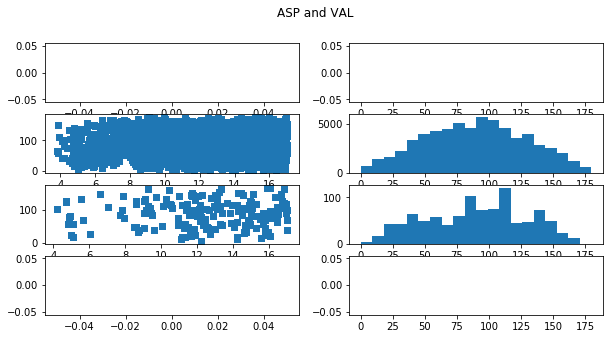

SSH connected
SSH connected
SSH connected
SSH connected


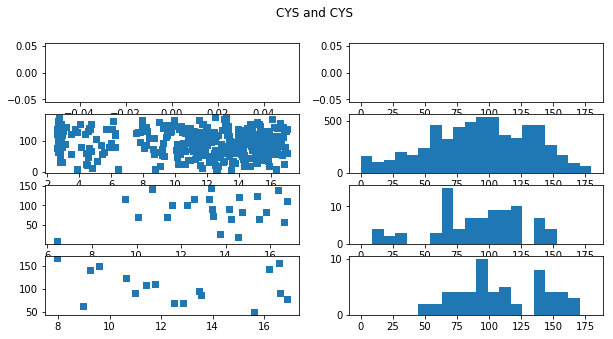

SSH connected
SSH connected
SSH connected
SSH connected


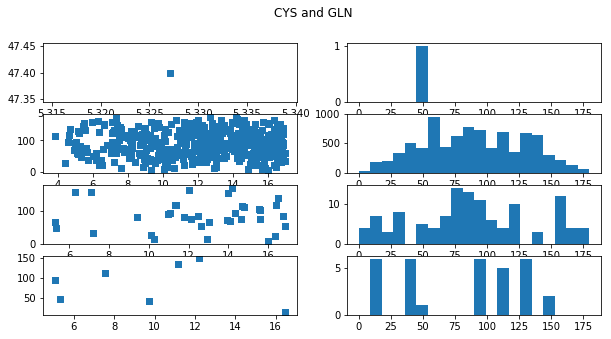

SSH connected
SSH connected
SSH connected
SSH connected


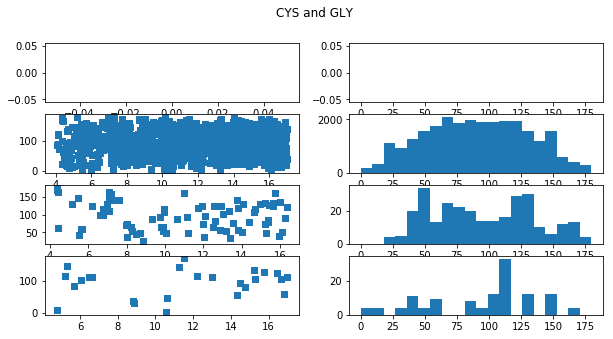

SSH connected
SSH connected
SSH connected
SSH connected


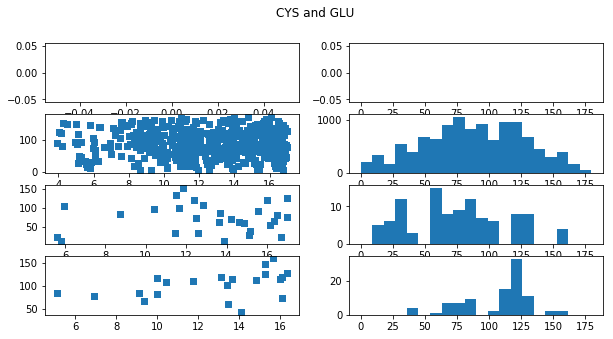

SSH connected
SSH connected
SSH connected
SSH connected


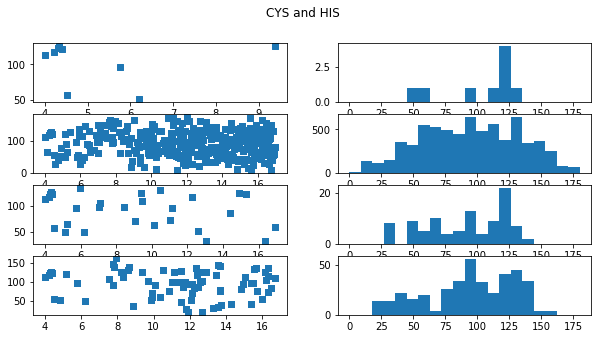

SSH connected
SSH connected
SSH connected
SSH connected


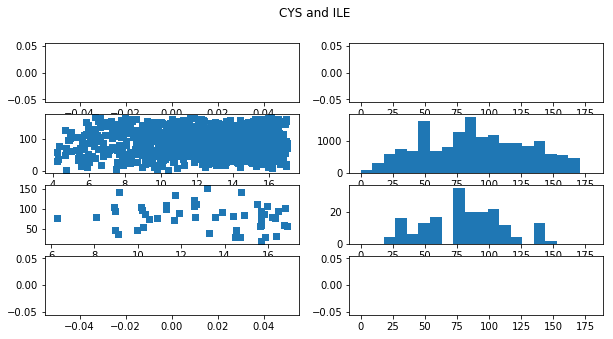

SSH connected
SSH connected
SSH connected
SSH connected


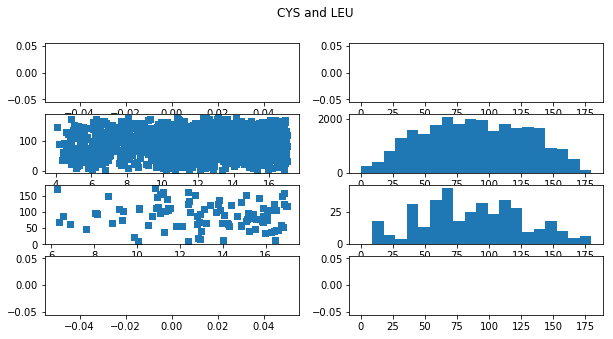

SSH connected
SSH connected
SSH connected
SSH connected


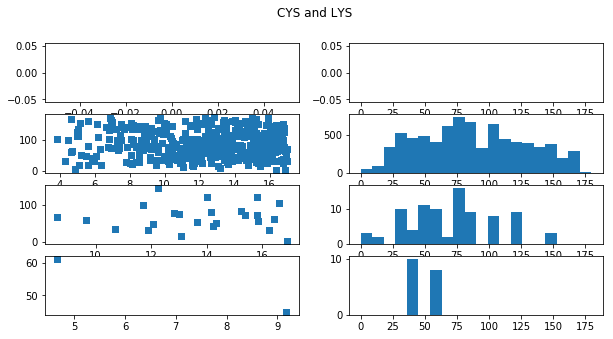

SSH connected
SSH connected
SSH connected
SSH connected


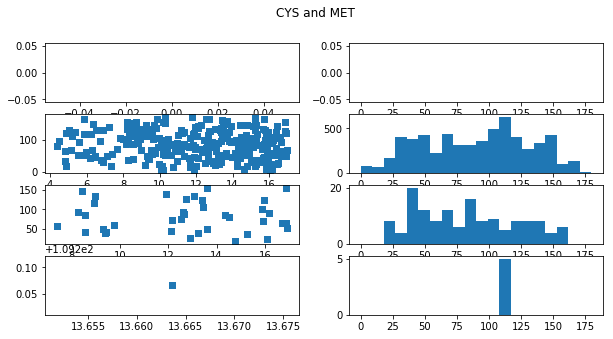

SSH connected
SSH connected
SSH connected
SSH connected


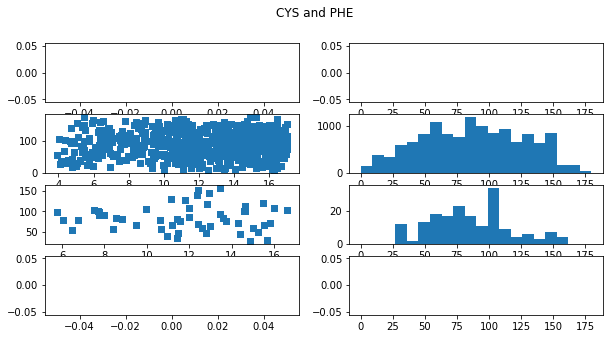

SSH connected
SSH connected
SSH connected
SSH connected


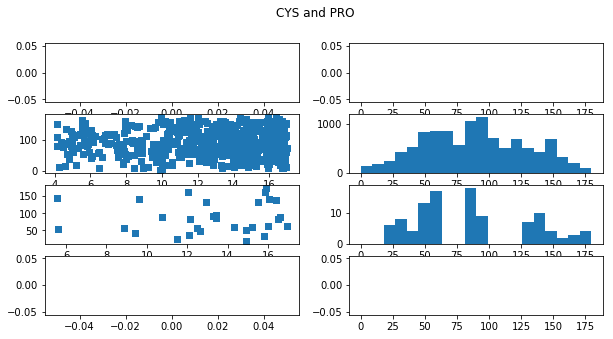

SSH connected
SSH connected
SSH connected
SSH connected


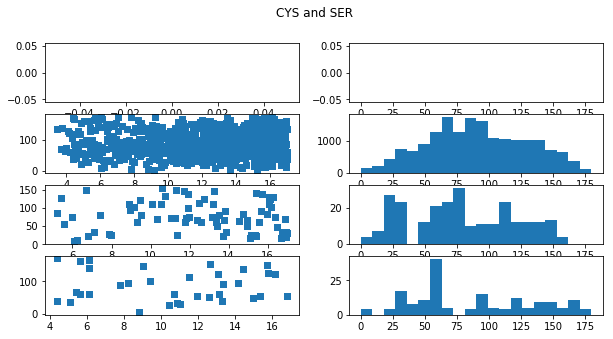

SSH connected
SSH connected
SSH connected
SSH connected


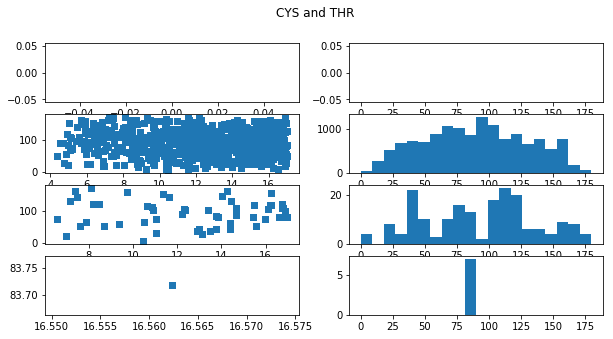

SSH connected
SSH connected
SSH connected
SSH connected


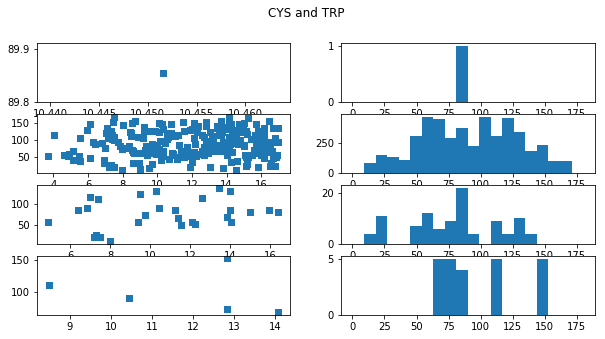

SSH connected
SSH connected
SSH connected
SSH connected


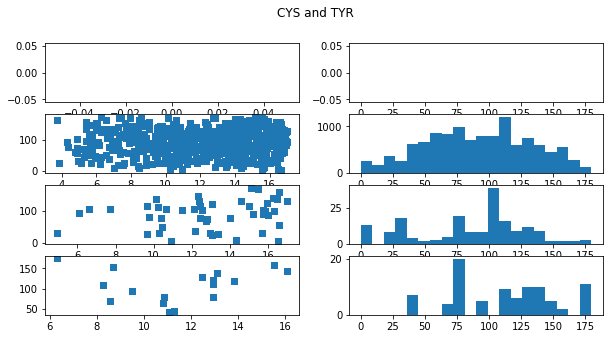

SSH connected
SSH connected
SSH connected
SSH connected


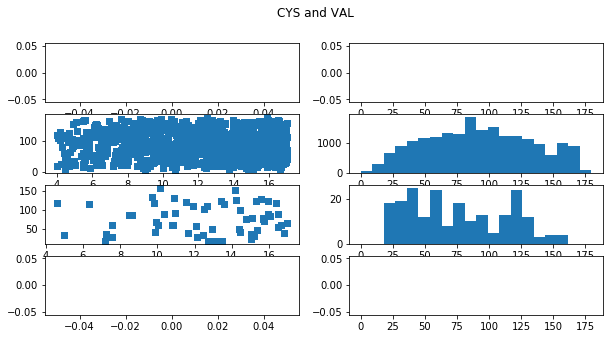

SSH connected
SSH connected
SSH connected
SSH connected


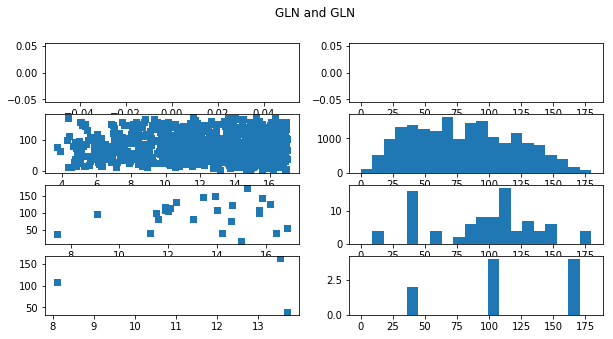

SSH connected
SSH connected
SSH connected
SSH connected


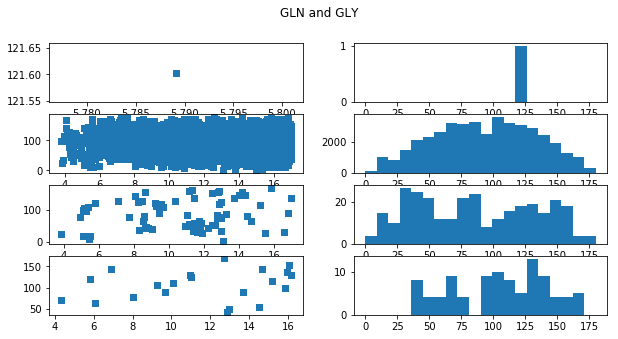

SSH connected
SSH connected
SSH connected
SSH connected


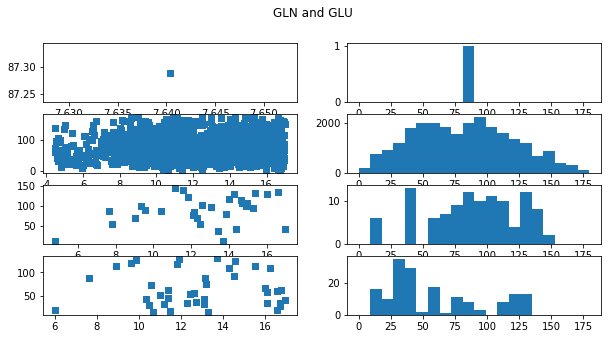

SSH connected
SSH connected
SSH connected
SSH connected


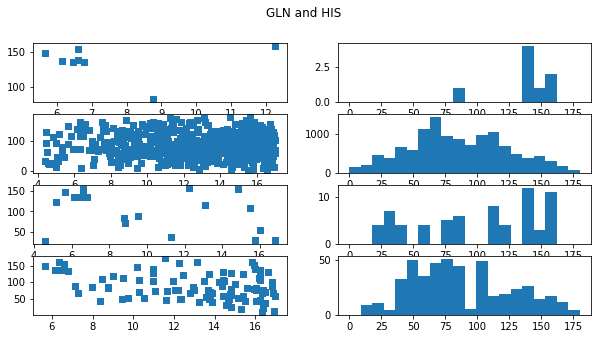

SSH connected
SSH connected
SSH connected
SSH connected


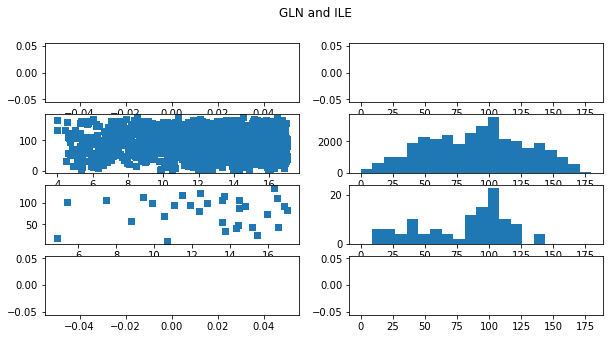

SSH connected
SSH connected
SSH connected
SSH connected


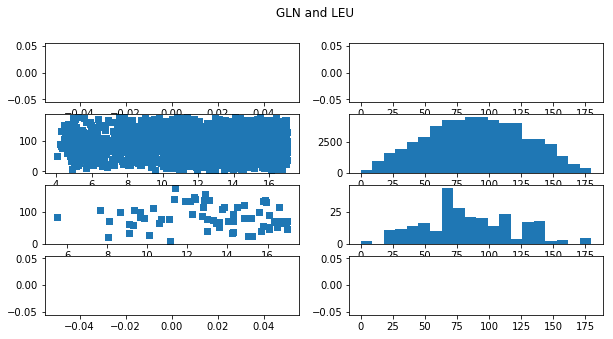

SSH connected
SSH connected
SSH connected
SSH connected


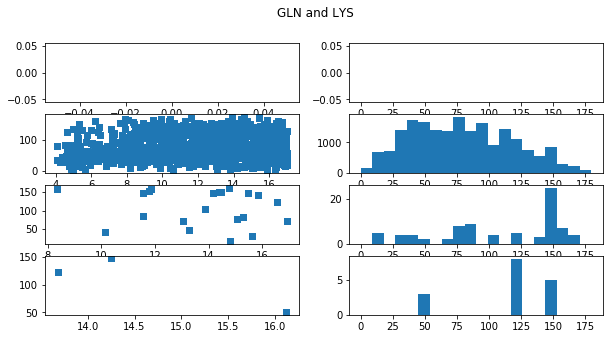

SSH connected
SSH connected
SSH connected
SSH connected


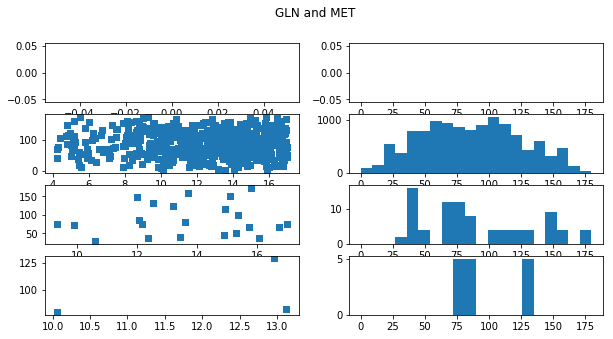

SSH connected
SSH connected
SSH connected
SSH connected


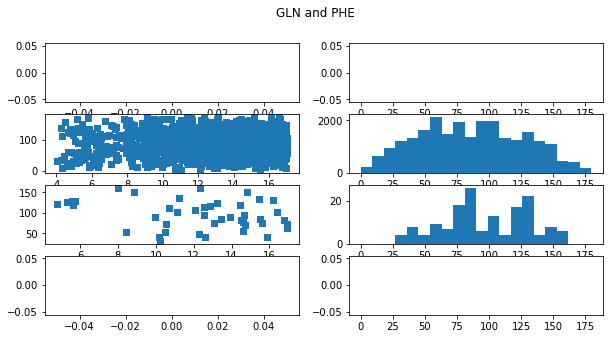

SSH connected
SSH connected
SSH connected
SSH connected


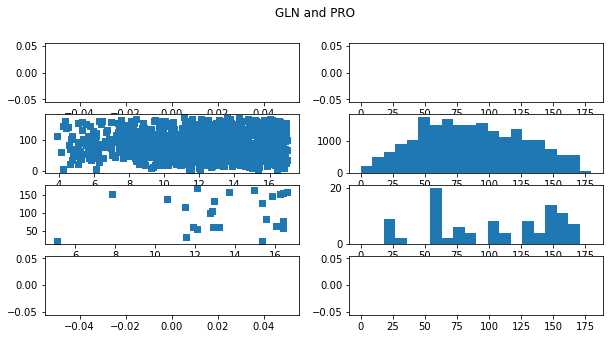

SSH connected
SSH connected
SSH connected
SSH connected


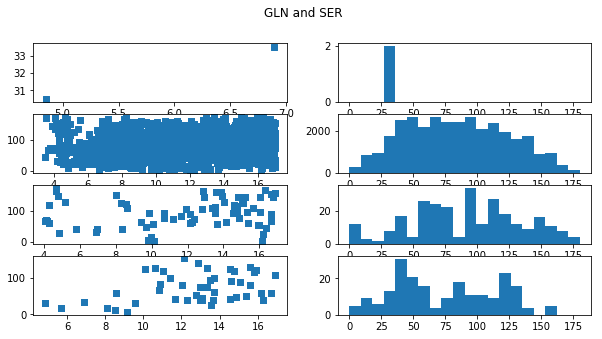

SSH connected
SSH connected
SSH connected
SSH connected


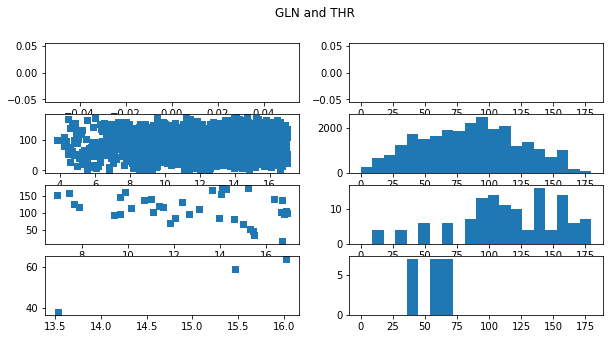

SSH connected
SSH connected
SSH connected
SSH connected


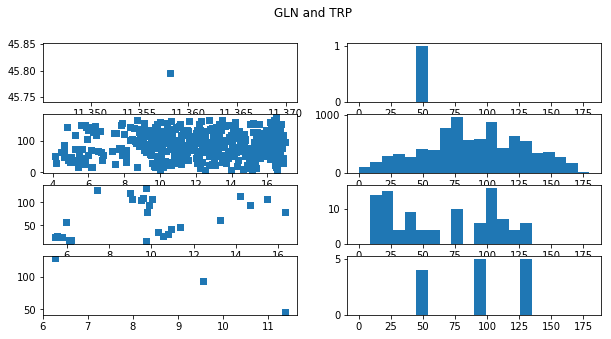

SSH connected
SSH connected
SSH connected
SSH connected


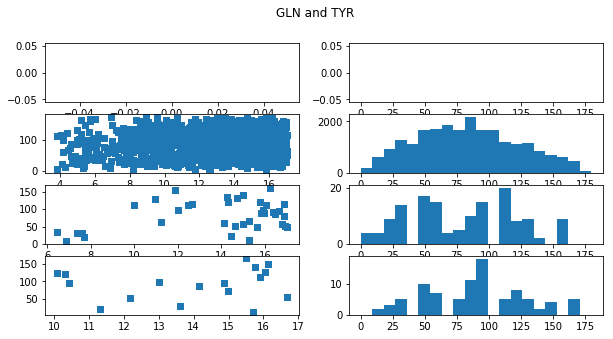

SSH connected
SSH connected
SSH connected
SSH connected


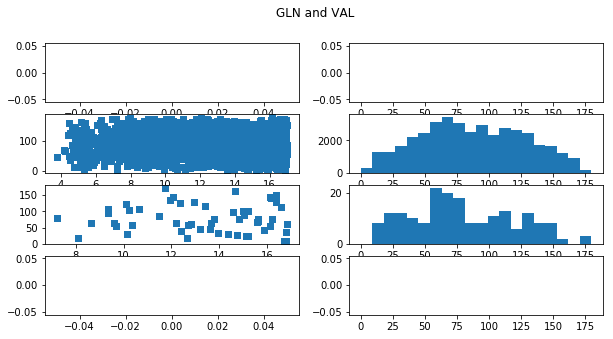

SSH connected
SSH connected
SSH connected
SSH connected


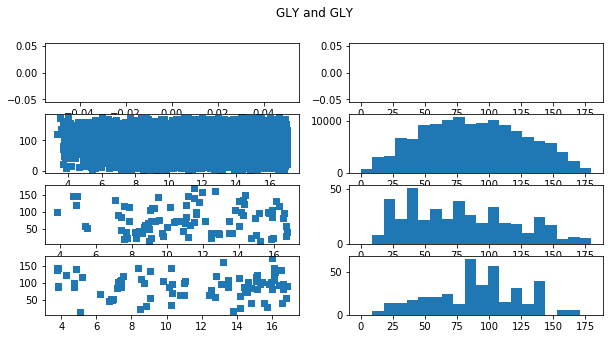

SSH connected
SSH connected
SSH connected
SSH connected


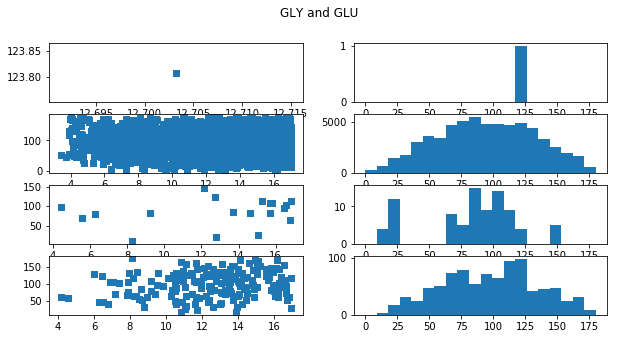

SSH connected
SSH connected
SSH connected
SSH connected


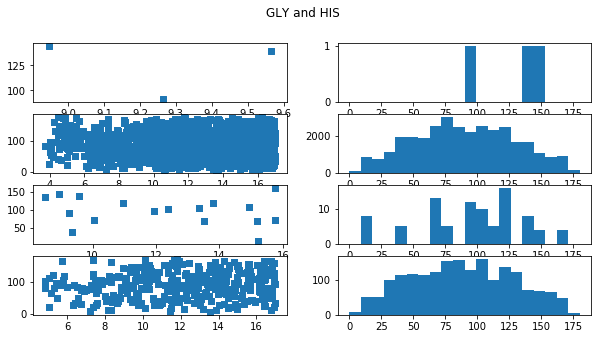

SSH connected
SSH connected
SSH connected
SSH connected


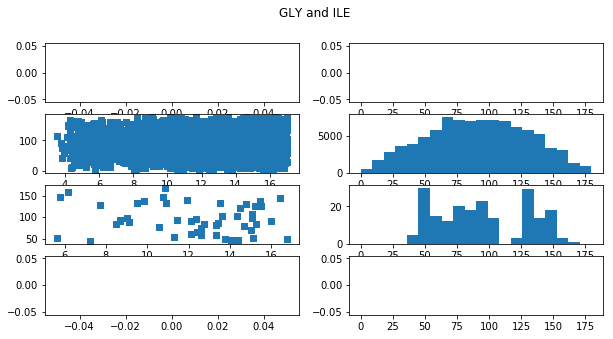

SSH connected
SSH connected
SSH connected
SSH connected


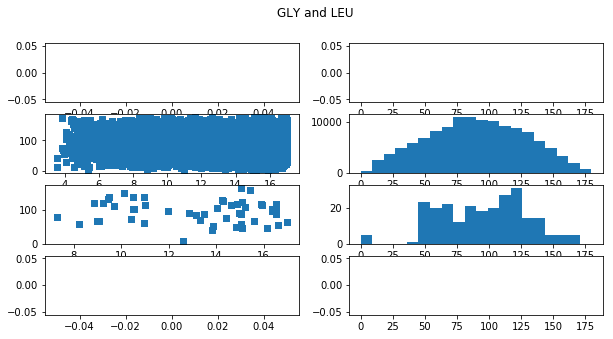

SSH connected
SSH connected
SSH connected
SSH connected


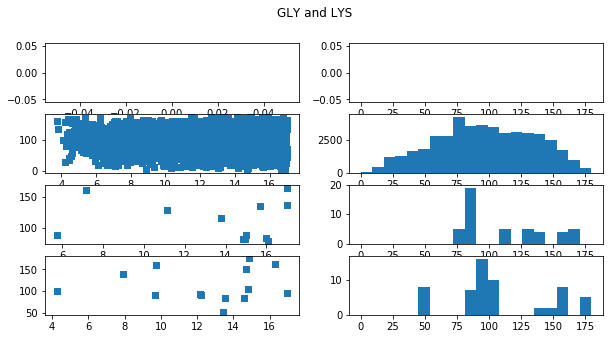

SSH connected
SSH connected
SSH connected
SSH connected


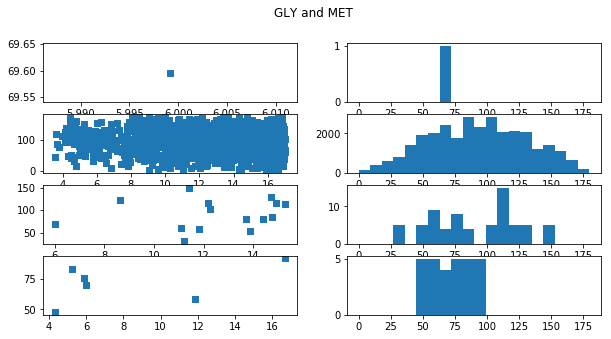

SSH connected
SSH connected
SSH connected
SSH connected


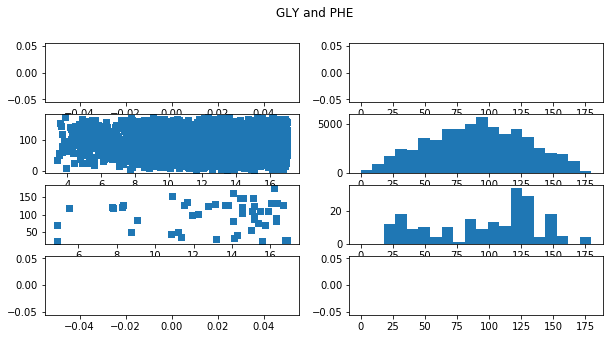

SSH connected
SSH connected
SSH connected
SSH connected


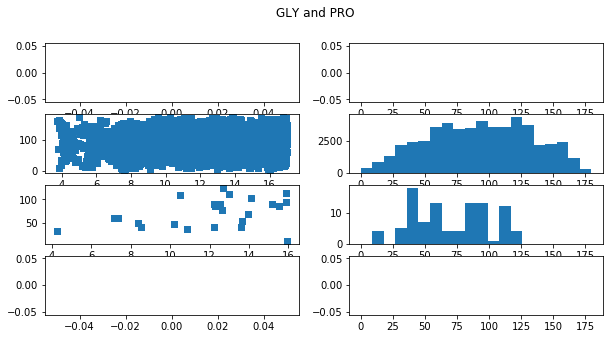

SSH connected
SSH connected
SSH connected
SSH connected


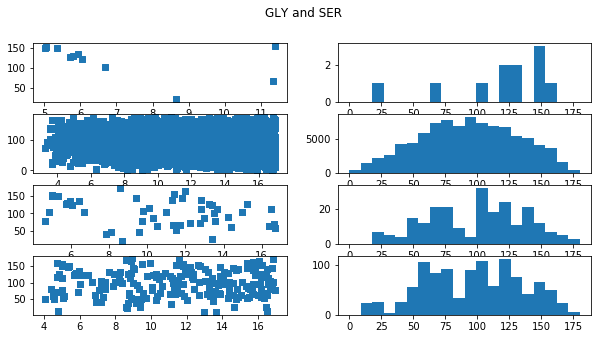

SSH connected
SSH connected
SSH connected
SSH connected


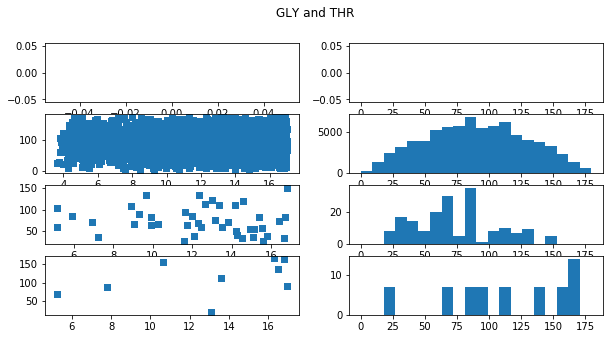

SSH connected
SSH connected
SSH connected
SSH connected


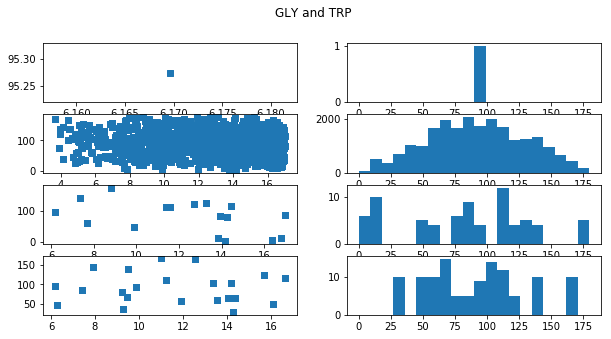

SSH connected
SSH connected
SSH connected
SSH connected


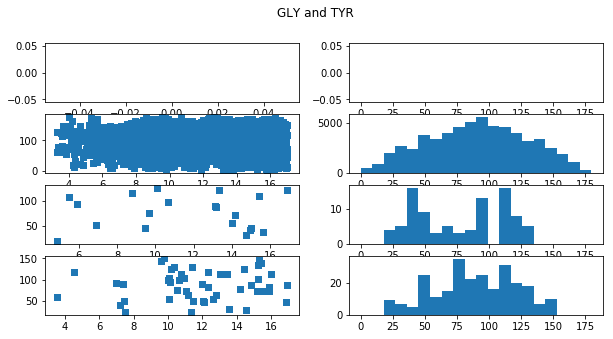

SSH connected
SSH connected
SSH connected
SSH connected


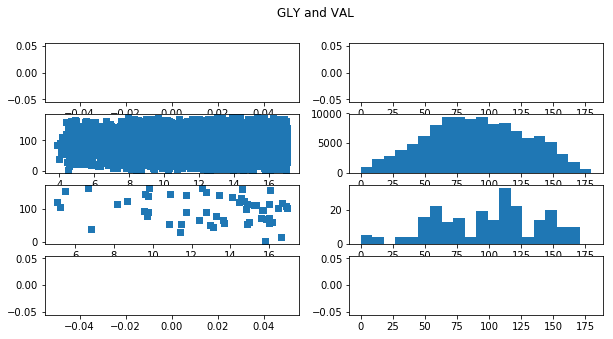

SSH connected
SSH connected
SSH connected
SSH connected


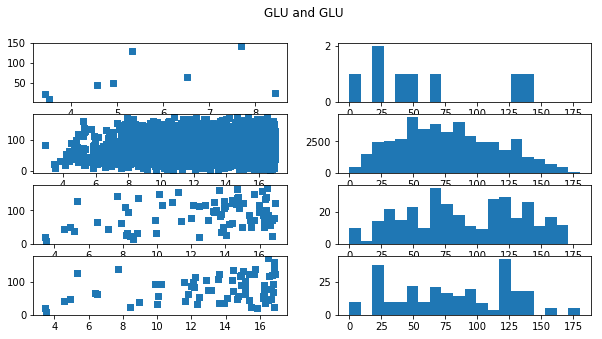

SSH connected
SSH connected
SSH connected
SSH connected


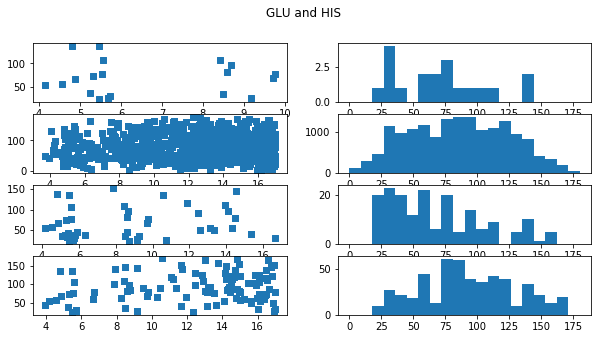

SSH connected
SSH connected
SSH connected
SSH connected


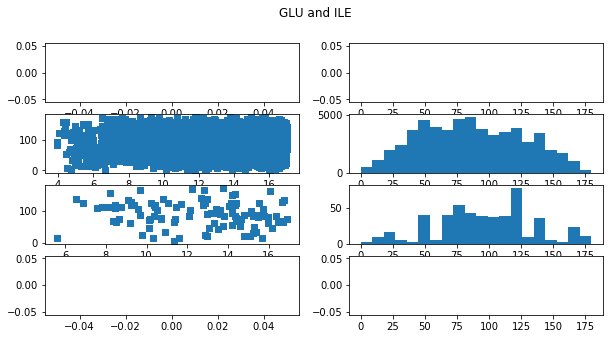

SSH connected
SSH connected
SSH connected
SSH connected


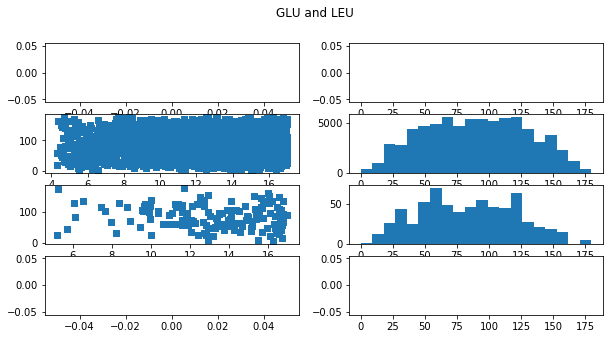

SSH connected
SSH connected
SSH connected
SSH connected


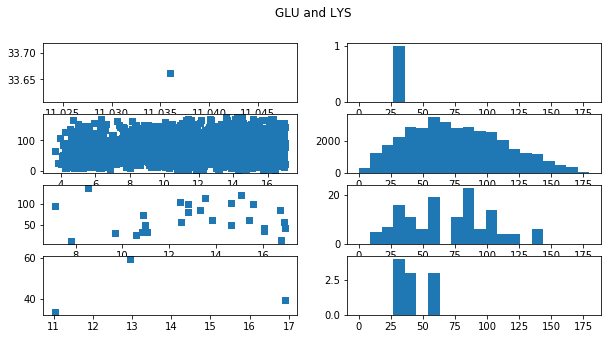

SSH connected
SSH connected
SSH connected
SSH connected


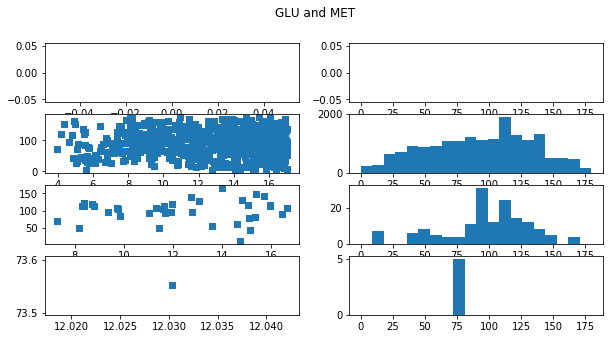

SSH connected
SSH connected
SSH connected
SSH connected


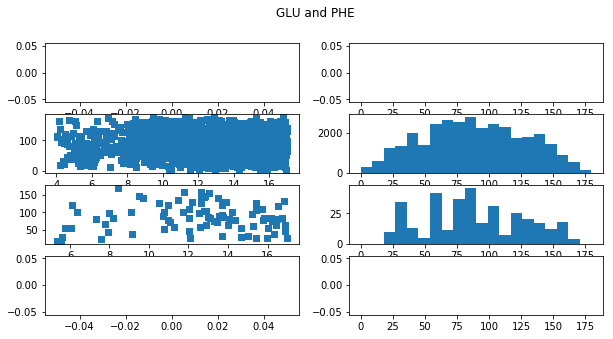

SSH connected
SSH connected
SSH connected
SSH connected


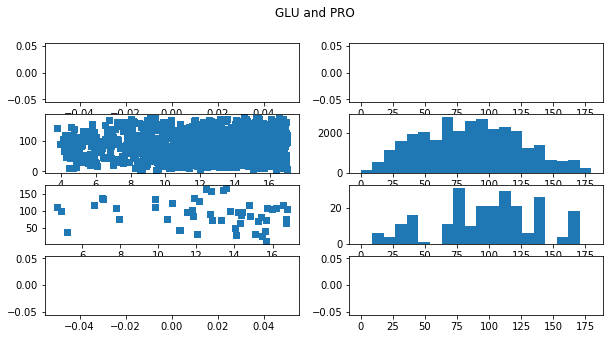

SSH connected
SSH connected
SSH connected
SSH connected


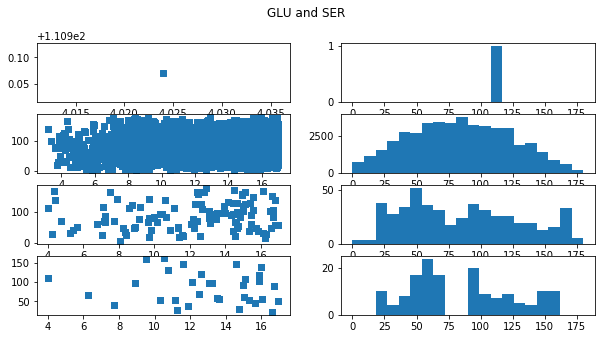

SSH connected
SSH connected
SSH connected
SSH connected


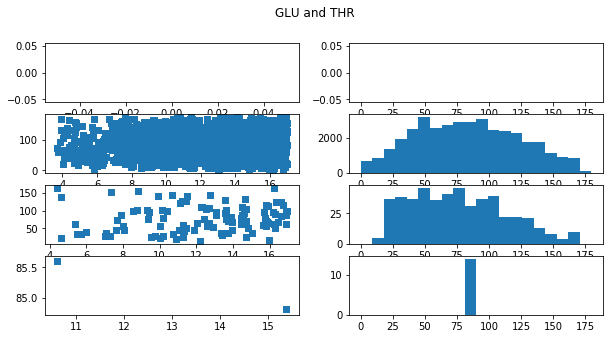

SSH connected
SSH connected
SSH connected
SSH connected


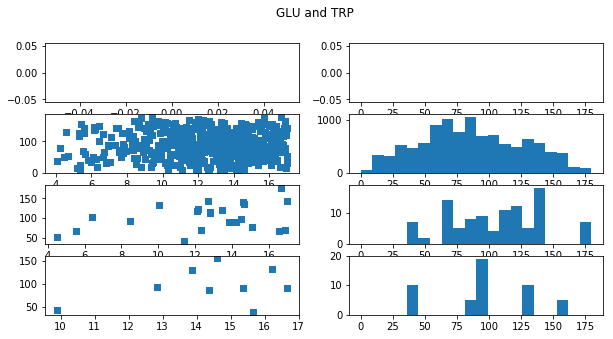

SSH connected
SSH connected
SSH connected
SSH connected


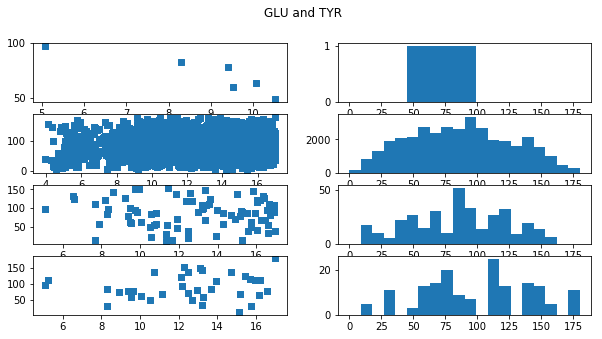

SSH connected
SSH connected
SSH connected
SSH connected


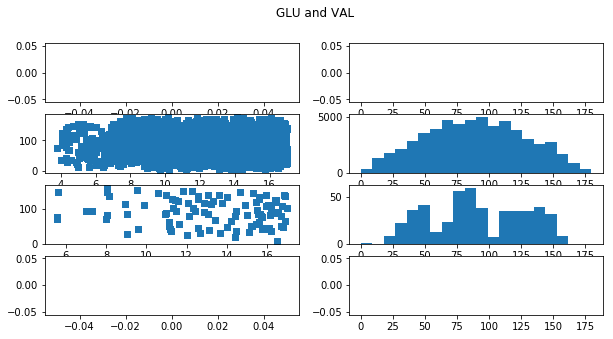

SSH connected
SSH connected
SSH connected
SSH connected


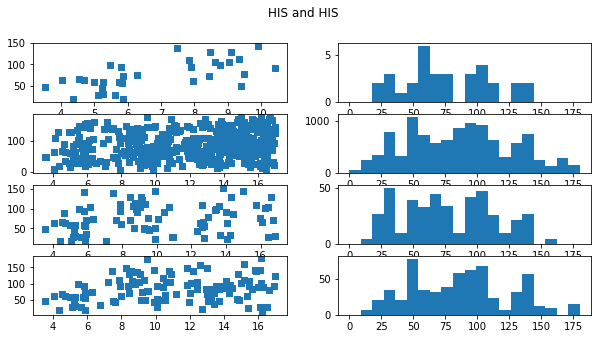

SSH connected
SSH connected
SSH connected
SSH connected


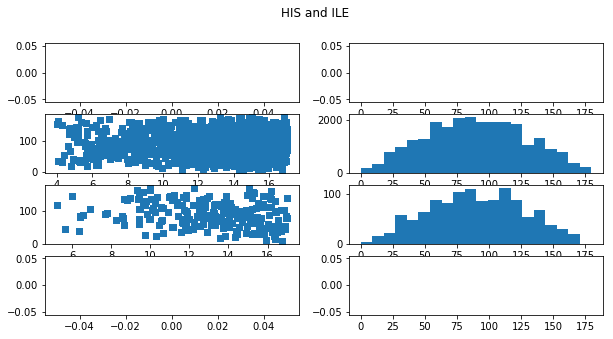

SSH connected
SSH connected
SSH connected
SSH connected


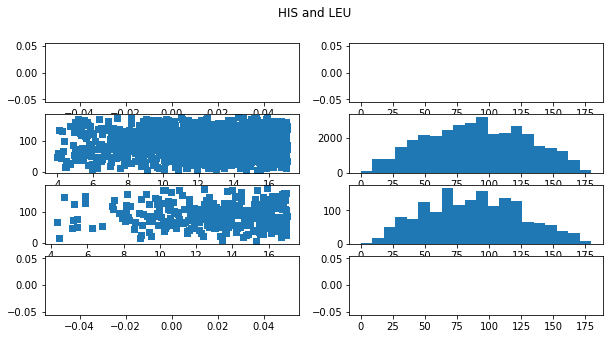

SSH connected
SSH connected
SSH connected
SSH connected


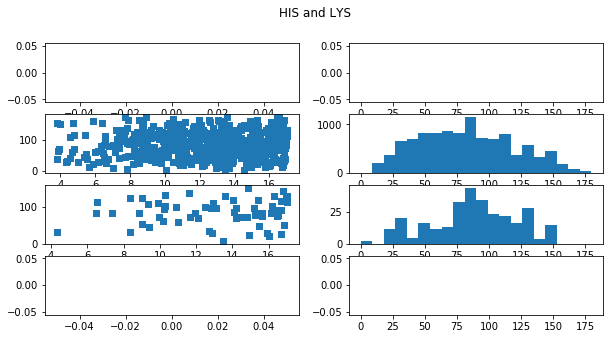

SSH connected
SSH connected
SSH connected
SSH connected


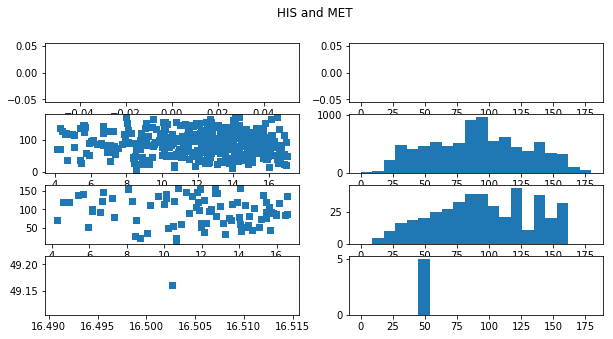

SSH connected
SSH connected
SSH connected
SSH connected


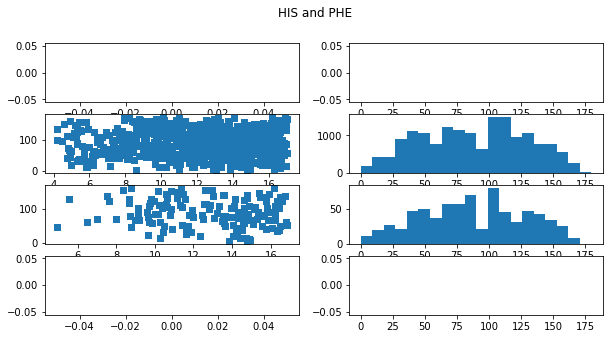

SSH connected
SSH connected
SSH connected
SSH connected


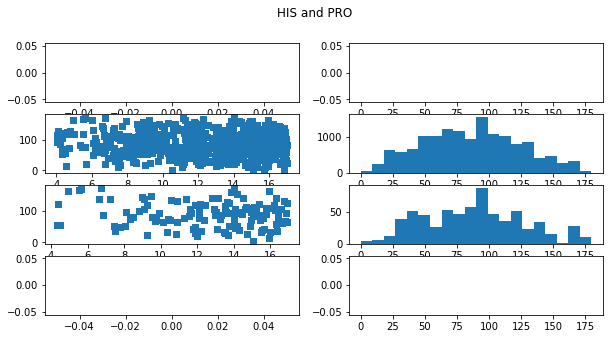

SSH connected
SSH connected
SSH connected
SSH connected


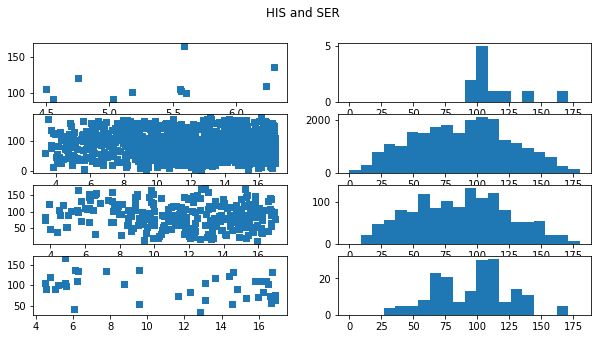

SSH connected
SSH connected
SSH connected
SSH connected


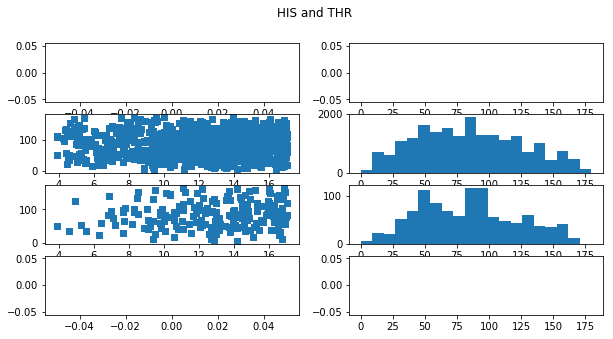

SSH connected
SSH connected
SSH connected
SSH connected


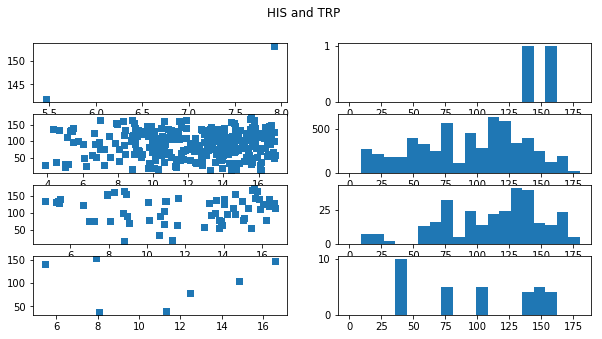

SSH connected
SSH connected
SSH connected
SSH connected


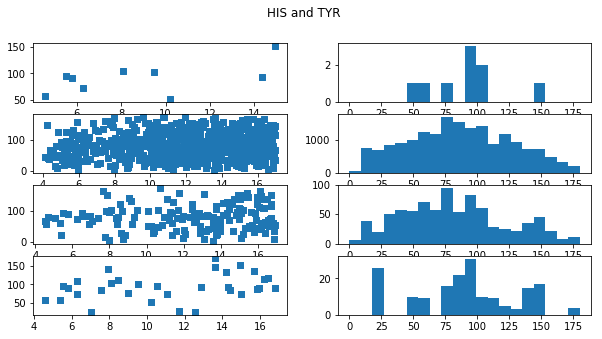

SSH connected
SSH connected
SSH connected
SSH connected


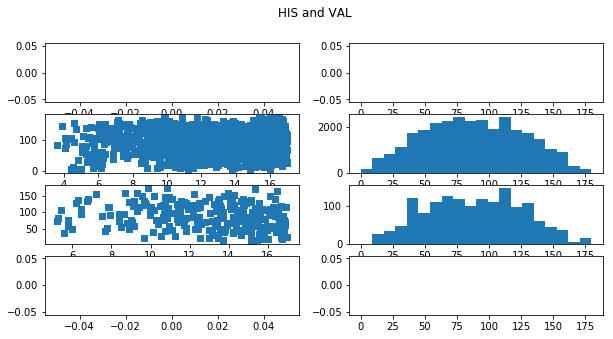

SSH connected
SSH connected
SSH connected
SSH connected


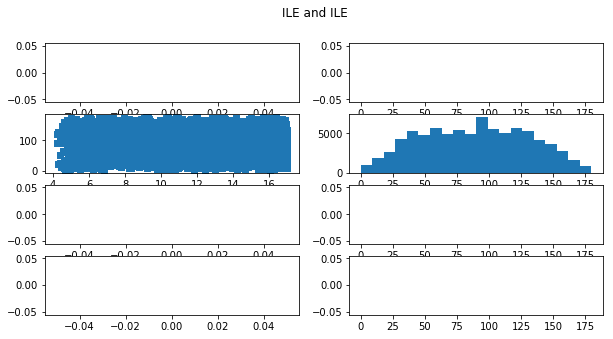

SSH connected
SSH connected
SSH connected
SSH connected


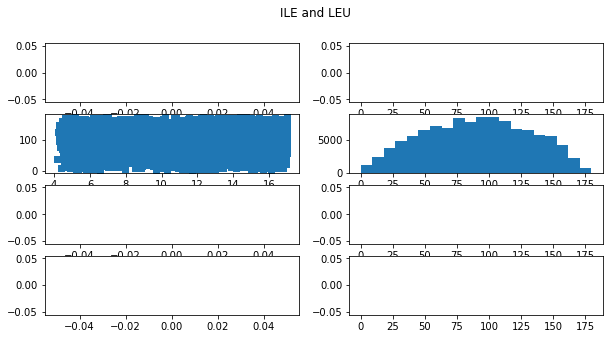

SSH connected
SSH connected
SSH connected
SSH connected


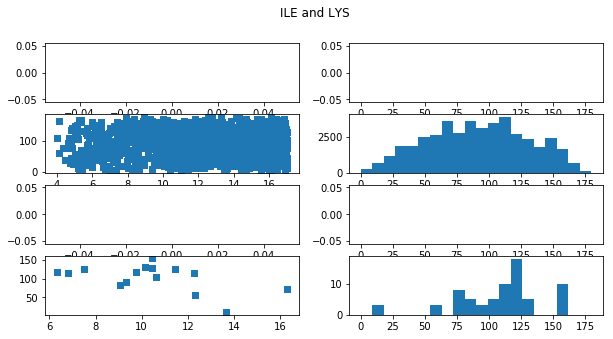

SSH connected
SSH connected
SSH connected
SSH connected


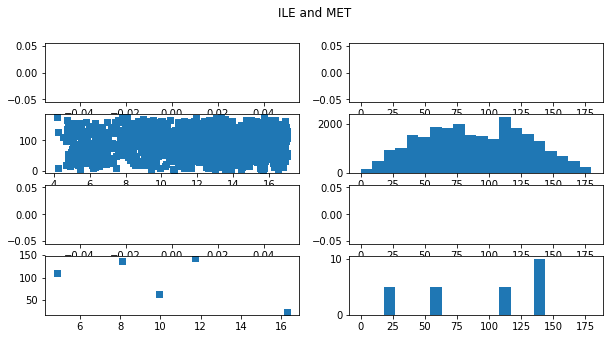

SSH connected
SSH connected
SSH connected
SSH connected


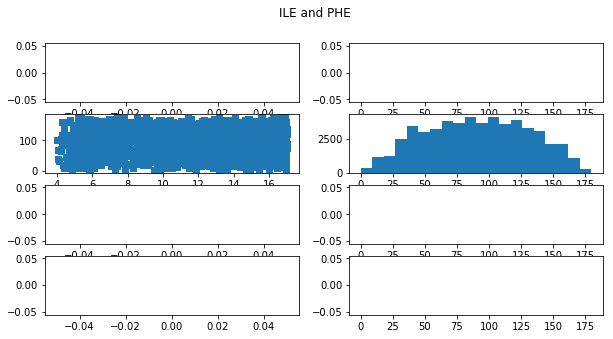

SSH connected
SSH connected
SSH connected
SSH connected


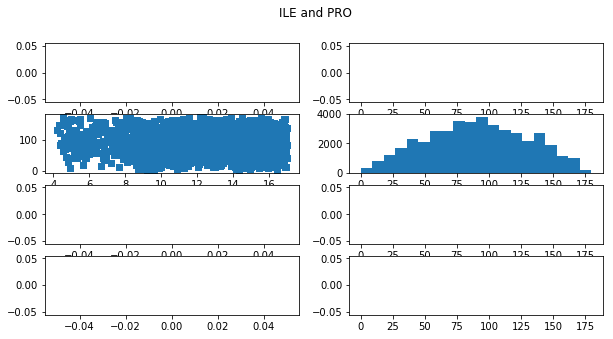

SSH connected
SSH connected
SSH connected
SSH connected


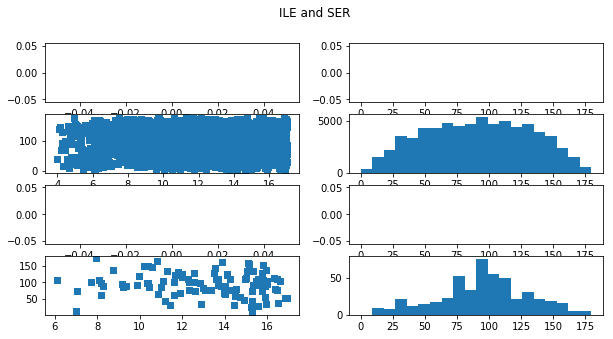

SSH connected
SSH connected
SSH connected
SSH connected


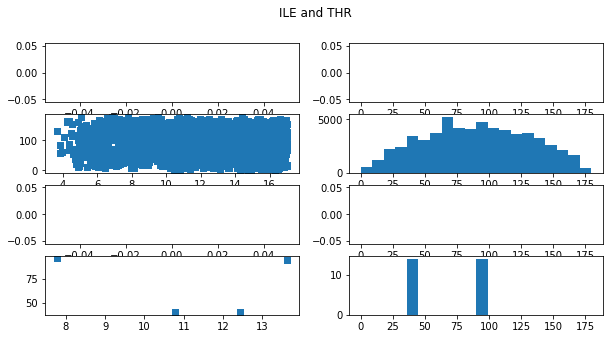

SSH connected
SSH connected
SSH connected
SSH connected


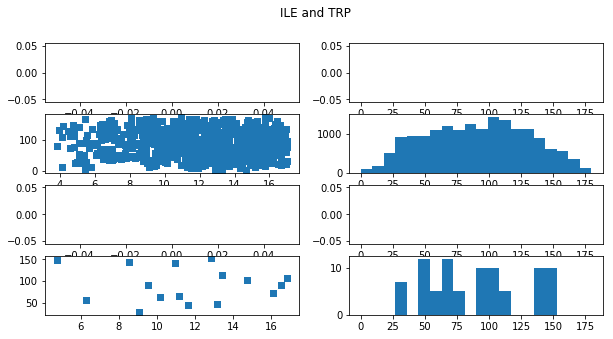

SSH connected
SSH connected
SSH connected
SSH connected


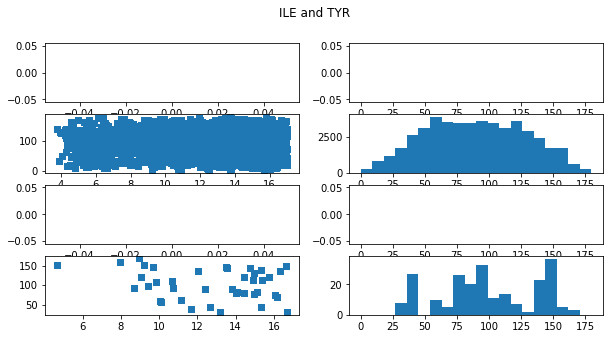

SSH connected
SSH connected
SSH connected
SSH connected


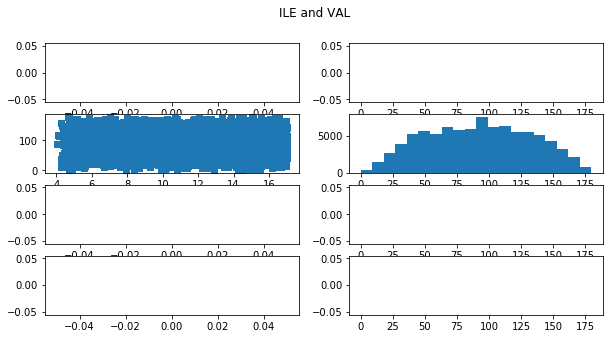

SSH connected
SSH connected
SSH connected
SSH connected


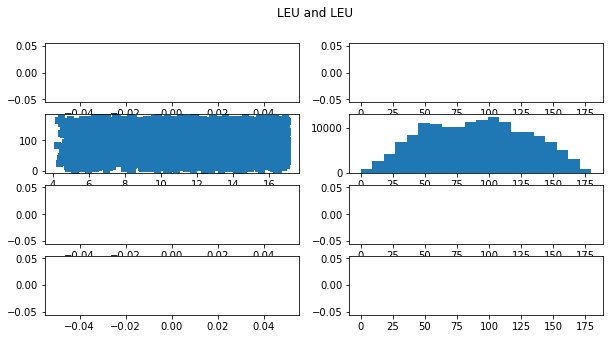

SSH connected
SSH connected
SSH connected
SSH connected


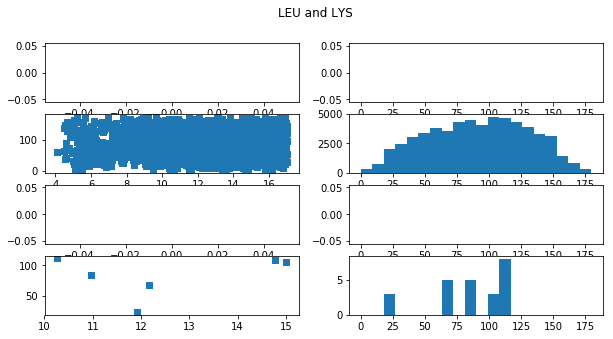

SSH connected
SSH connected
SSH connected
SSH connected


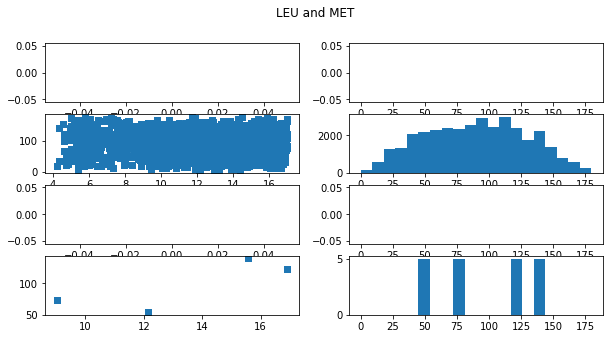

SSH connected
SSH connected
SSH connected
SSH connected


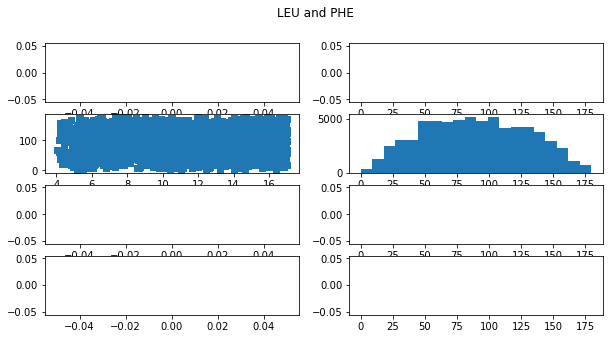

SSH connected
SSH connected
SSH connected
SSH connected


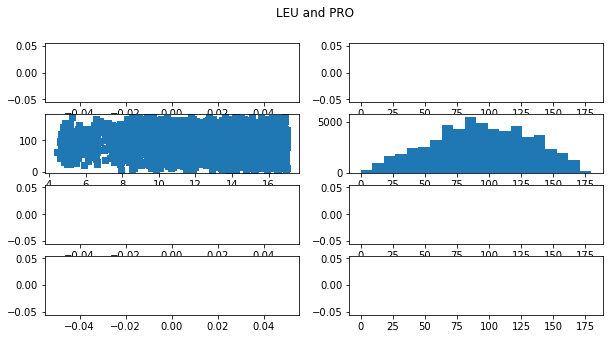

SSH connected
SSH connected
SSH connected
SSH connected


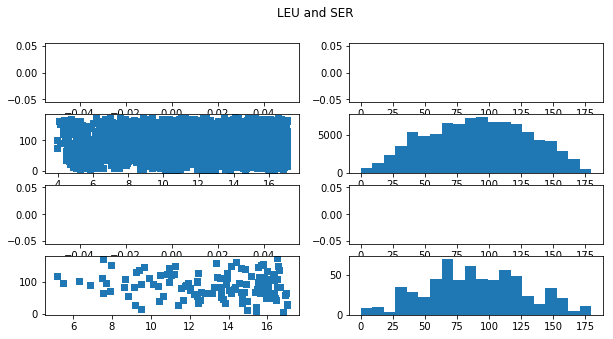

SSH connected
SSH connected
SSH connected
SSH connected


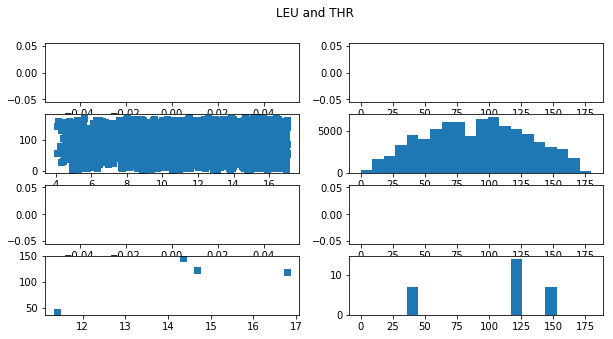

SSH connected
SSH connected
SSH connected
SSH connected


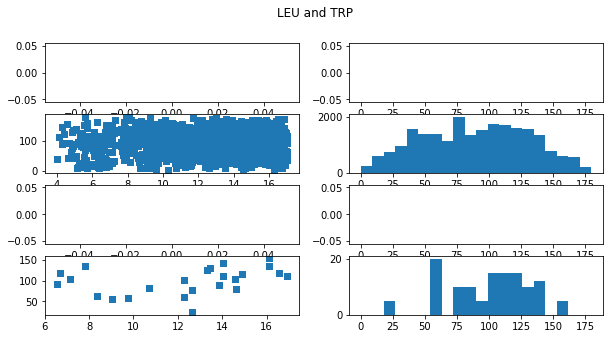

SSH connected
SSH connected
SSH connected
SSH connected


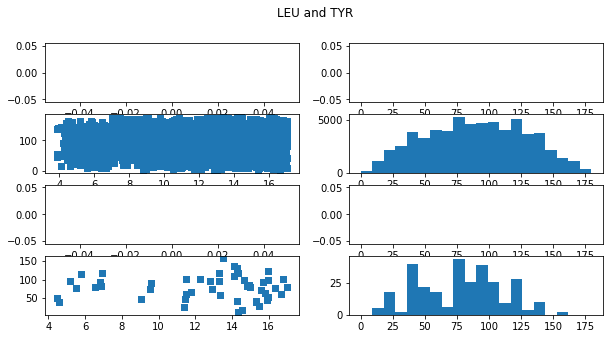

SSH connected
SSH connected
SSH connected
SSH connected


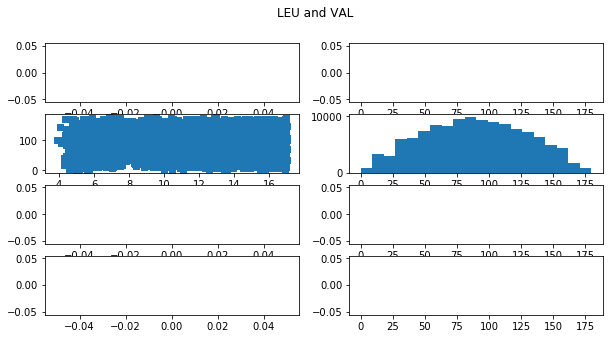

SSH connected
SSH connected
SSH connected
SSH connected


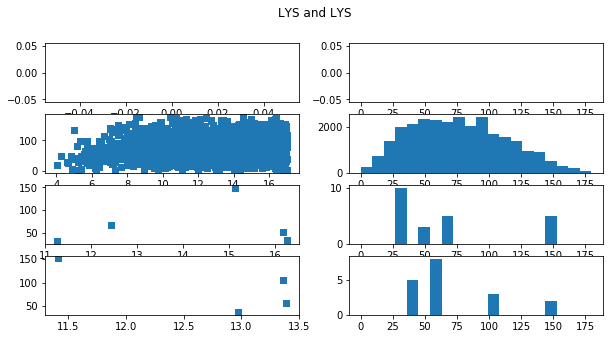

SSH connected
SSH connected
SSH connected
SSH connected


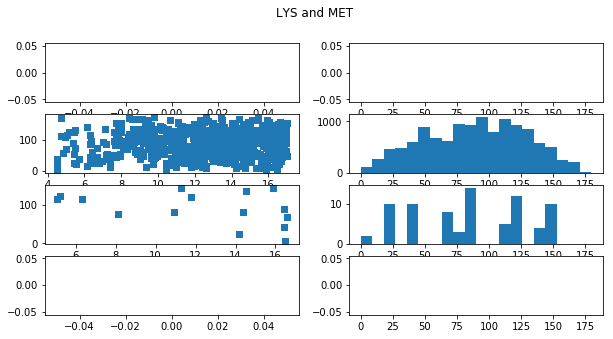

SSH connected
SSH connected
SSH connected
SSH connected


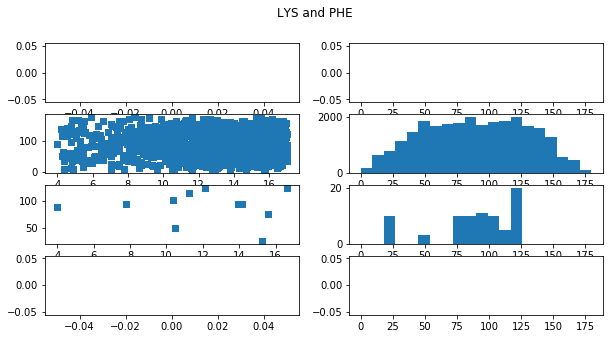

SSH connected
SSH connected
SSH connected
SSH connected


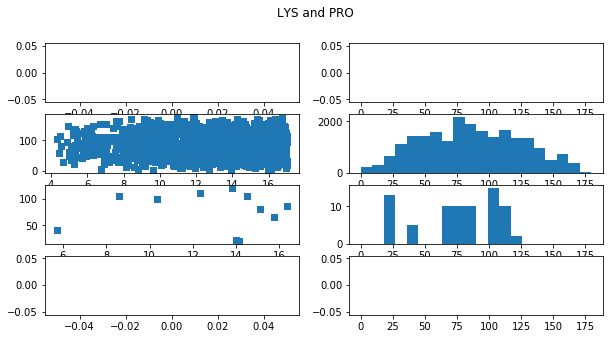

SSH connected
SSH connected
SSH connected
SSH connected


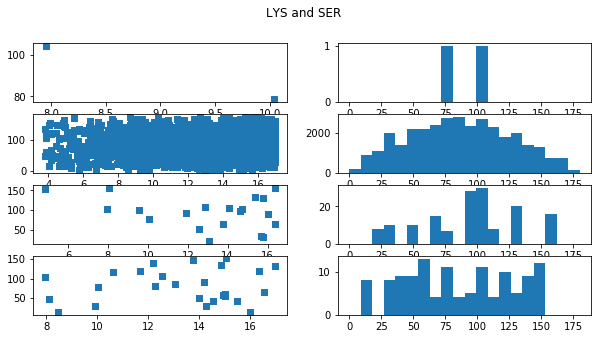

SSH connected
SSH connected
SSH connected
SSH connected


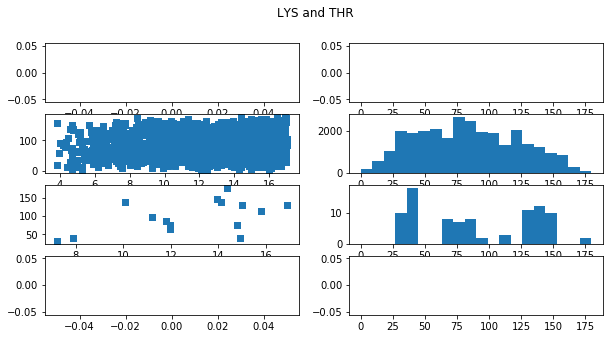

SSH connected
SSH connected
SSH connected
SSH connected


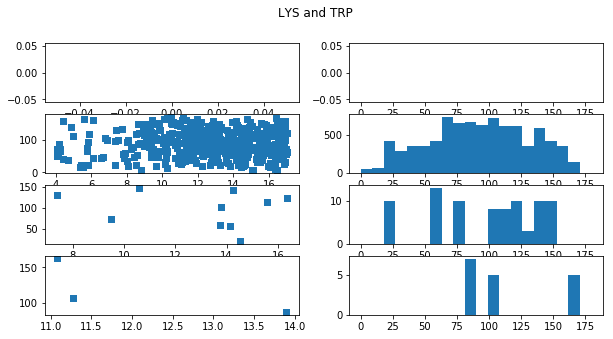

SSH connected
SSH connected
SSH connected
SSH connected


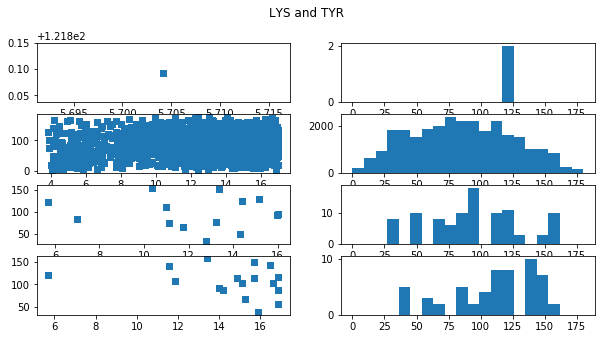

SSH connected
SSH connected
SSH connected
SSH connected


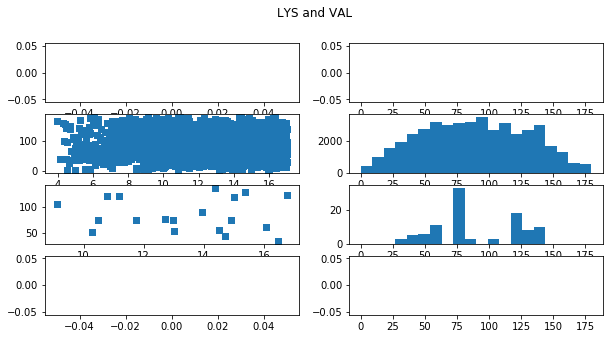

SSH connected
SSH connected
SSH connected
SSH connected


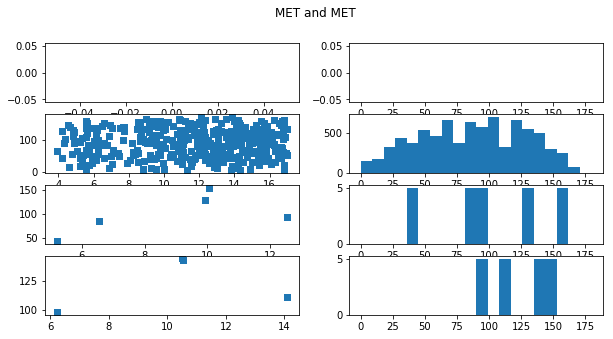

SSH connected
SSH connected
SSH connected
SSH connected


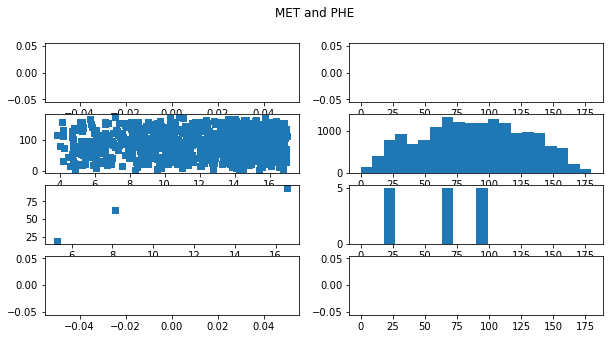

SSH connected
SSH connected
SSH connected
SSH connected


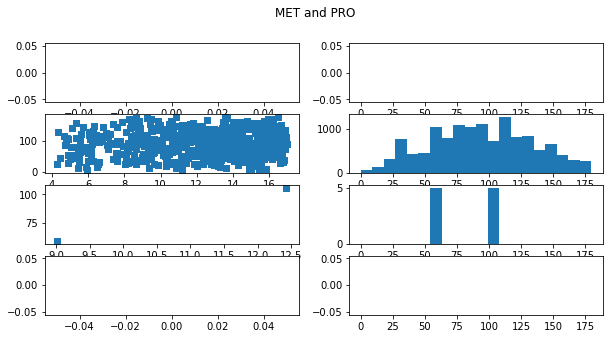

SSH connected
SSH connected
SSH connected
SSH connected


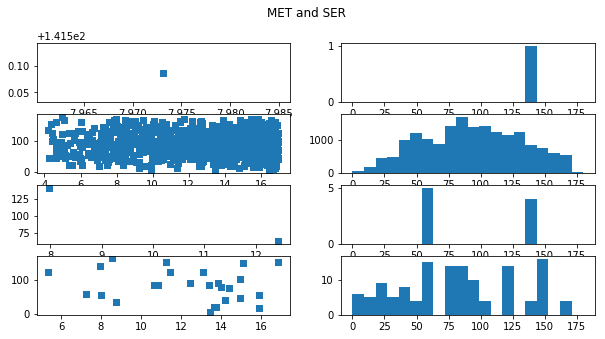

SSH connected
SSH connected
SSH connected
SSH connected


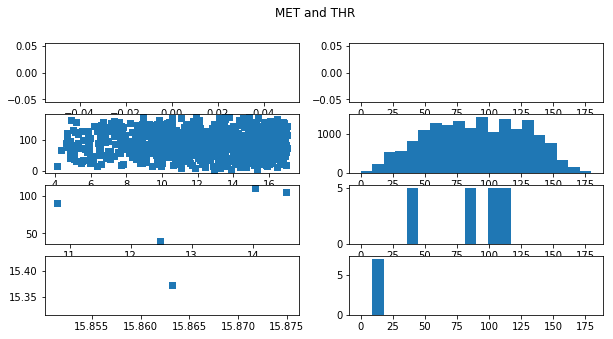

SSH connected
SSH connected
SSH connected
SSH connected


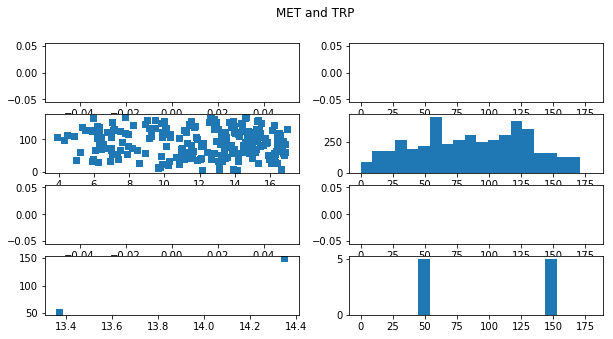

SSH connected
SSH connected
SSH connected
SSH connected


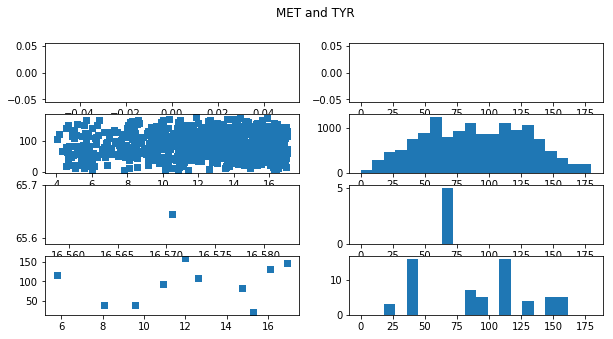

SSH connected
SSH connected
SSH connected
SSH connected


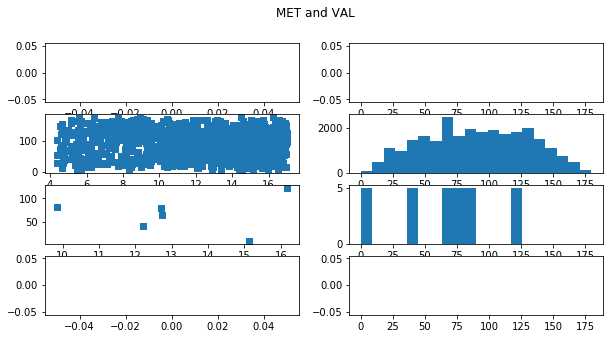

SSH connected
SSH connected
SSH connected
SSH connected


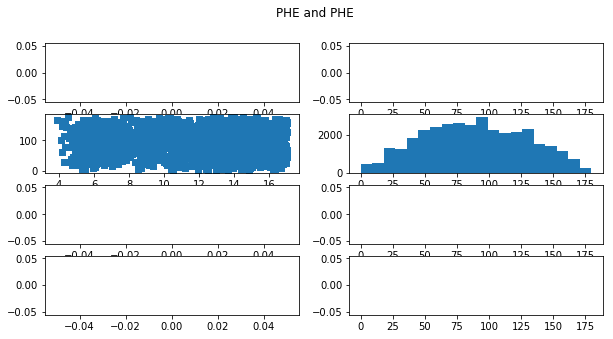

SSH connected
SSH connected
SSH connected
SSH connected


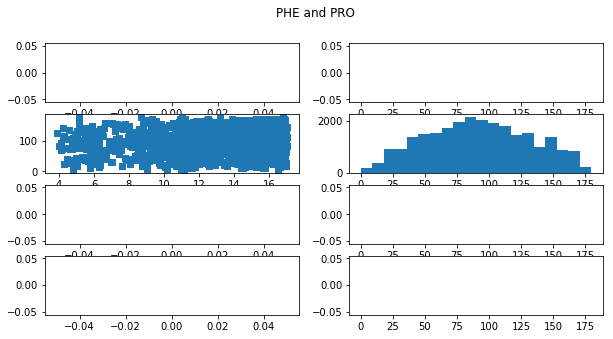

SSH connected
SSH connected
SSH connected
SSH connected


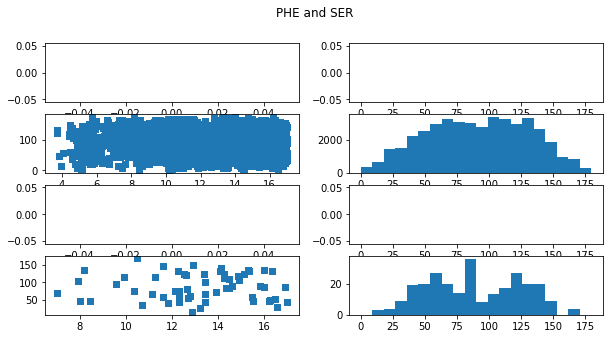

SSH connected
SSH connected
SSH connected
SSH connected


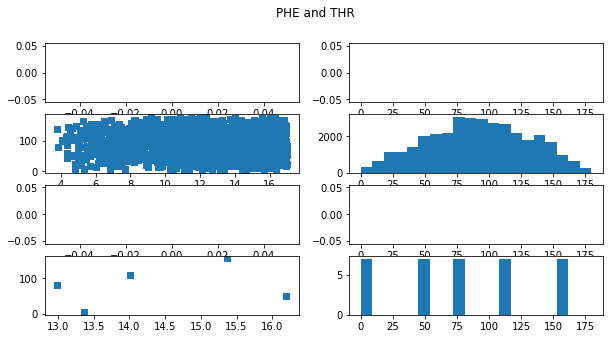

SSH connected
SSH connected
SSH connected
SSH connected


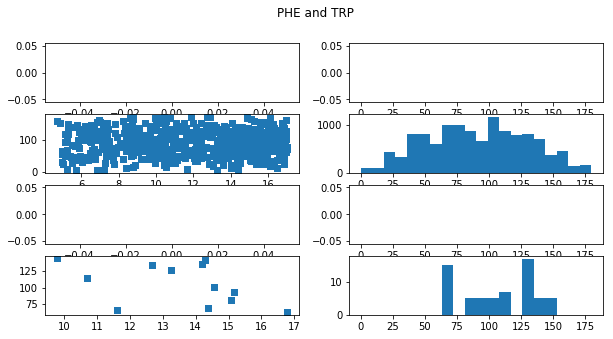

SSH connected
SSH connected
SSH connected
SSH connected


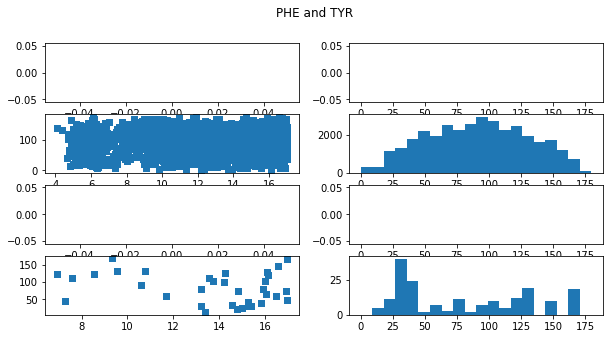

SSH connected
SSH connected
SSH connected
SSH connected


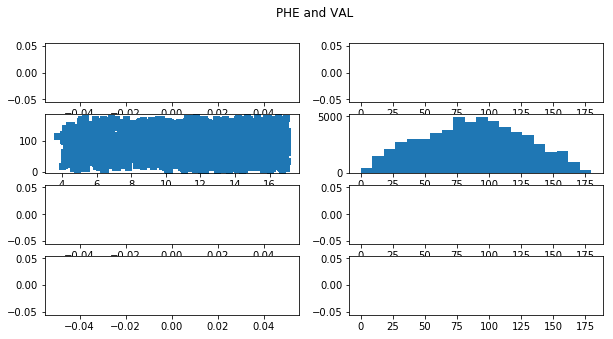

SSH connected
SSH connected
SSH connected
SSH connected


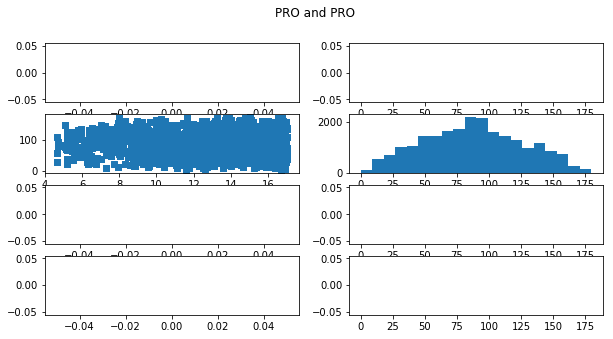

SSH connected
SSH connected
SSH connected
SSH connected


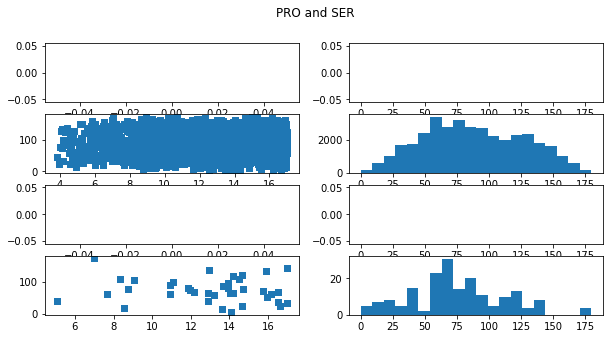

SSH connected
SSH connected
SSH connected
SSH connected


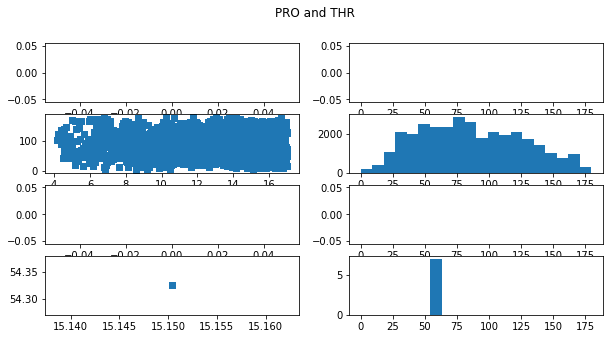

SSH connected
SSH connected
SSH connected
SSH connected


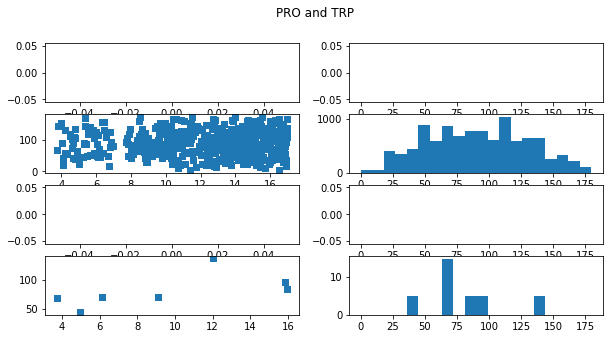

SSH connected
SSH connected
SSH connected
SSH connected


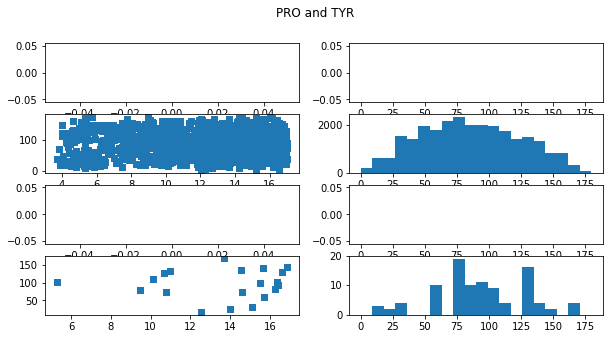

SSH connected
SSH connected
SSH connected
SSH connected


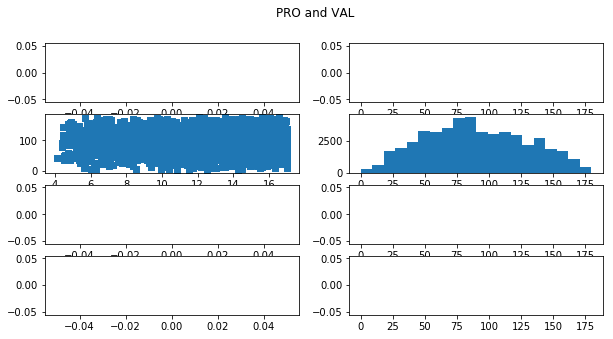

SSH connected
SSH connected
SSH connected
SSH connected


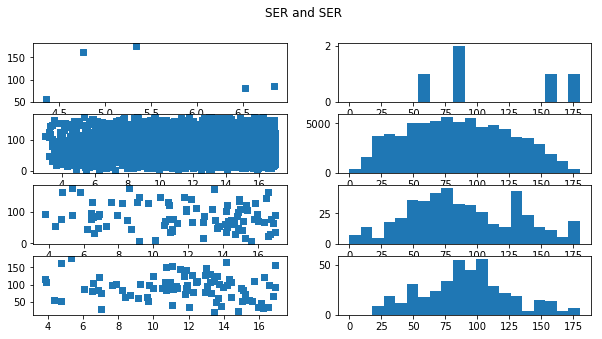

SSH connected
SSH connected
SSH connected
SSH connected


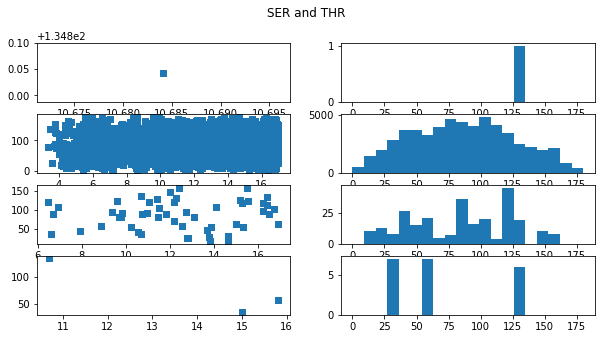

SSH connected
SSH connected
SSH connected
SSH connected


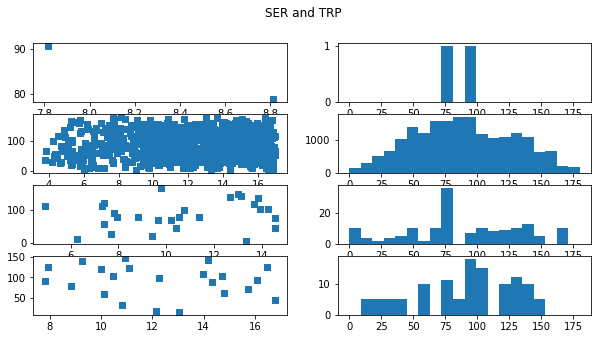

SSH connected
SSH connected
SSH connected
SSH connected


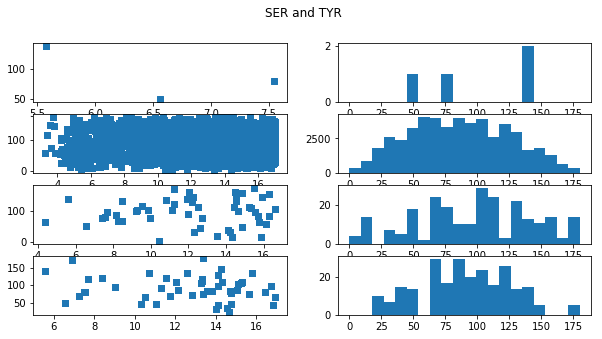

SSH connected
SSH connected
SSH connected
SSH connected


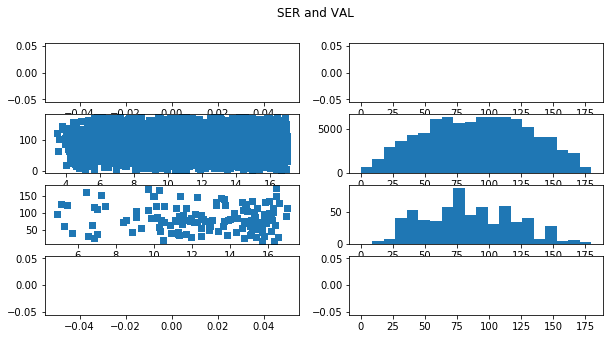

SSH connected
SSH connected
SSH connected
SSH connected


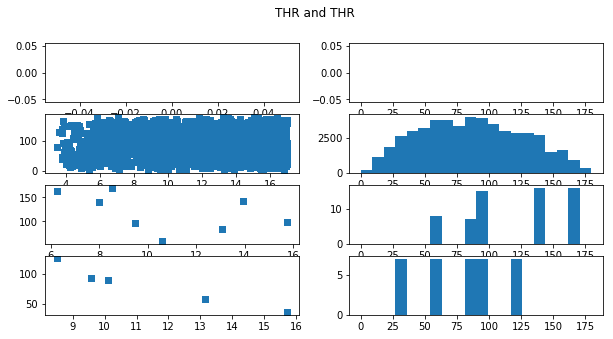

SSH connected
SSH connected
SSH connected
SSH connected


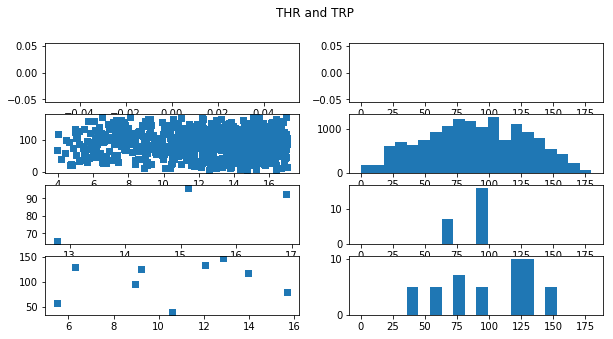

SSH connected
SSH connected
SSH connected
SSH connected


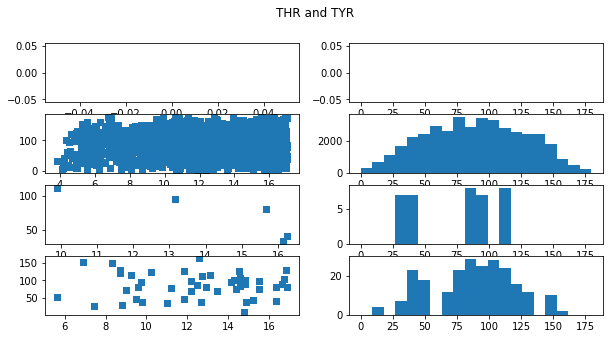

SSH connected
SSH connected
SSH connected
SSH connected


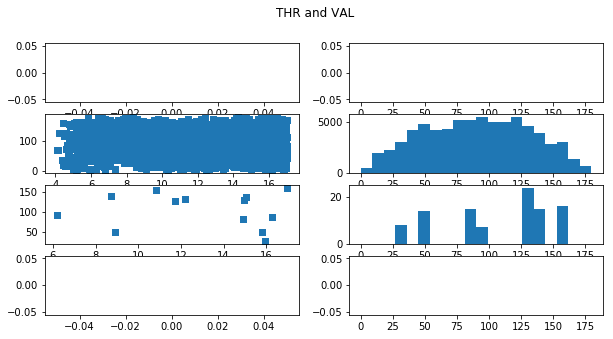

SSH connected
SSH connected
SSH connected
SSH connected


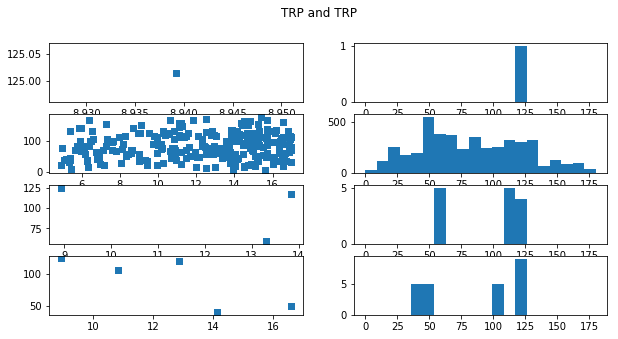

SSH connected
SSH connected
SSH connected
SSH connected


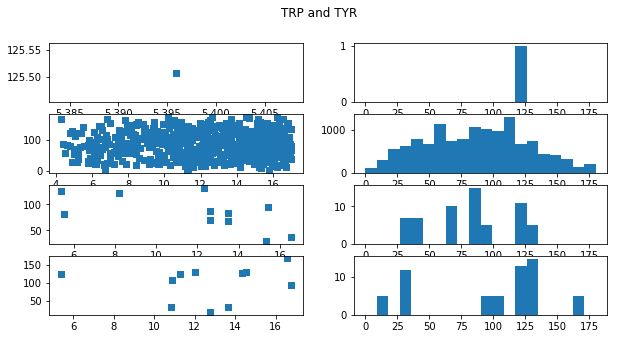

SSH connected
SSH connected
SSH connected
SSH connected


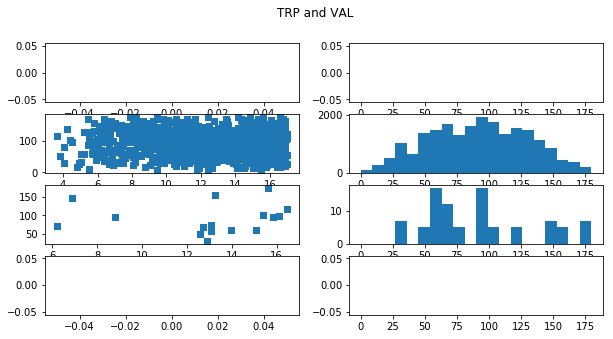

SSH connected
SSH connected
SSH connected
SSH connected


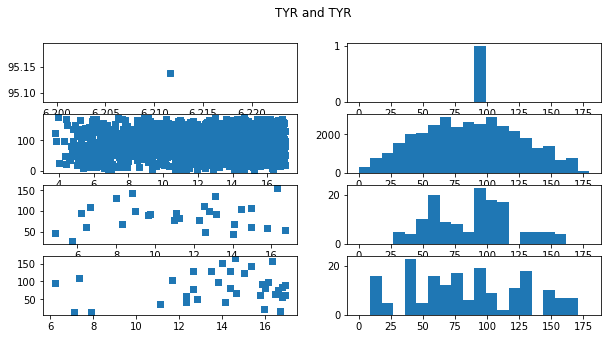

SSH connected
SSH connected
SSH connected
SSH connected


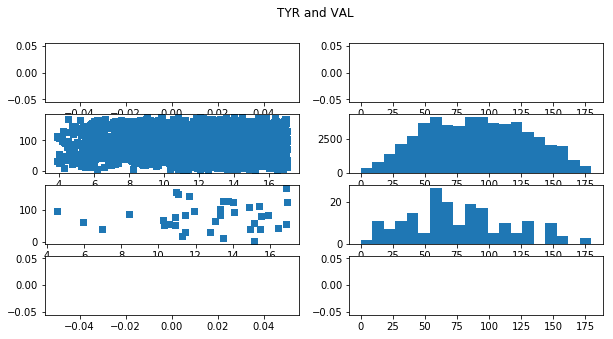

SSH connected
SSH connected
SSH connected
SSH connected


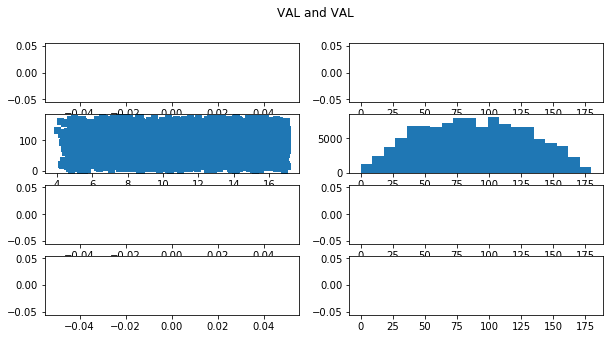

In [8]:
aminoAcidCodes = ["ALA","ARG","ASN","ASP","CYS","GLN","GLY","GLU","HIS","ILE","LEU","LYS",
                 "MET","PHE","PRO","SER","THR","TRP","TYR","VAL"]
for i in range(len(aminoAcidCodes)):
    for j in range(i,len(aminoAcidCodes)):
        residue_1 = aminoAcidCodes[i]
        residue_2 = aminoAcidCodes[j]

        fig, axs = plt.subplots(4, 2,figsize=(10,5))
        fig.suptitle('{} and {}'.format(residue_1,residue_2))

        active_data = Two_residues_generic_retrieval(residue_1,residue_2,"=","=")
        active_data = active_data[active_data["Distance"]<17]
        axs[0,0].scatter(active_data["Distance"],active_data["Angle"],marker = "s")
        axs[0,1].hist([float(x) for x in active_data["Angle"]], bins=20,range=(0,180)) 

        active_data = Two_residues_generic_retrieval(residue_1,residue_2,"!=","!=")
        active_data = active_data[active_data["Distance"]<17]
        axs[1,0].scatter(active_data["Distance"],active_data["Angle"],marker = "s")
        axs[1,1].hist([float(x) for x in active_data["Angle"]], bins=20,range=(0,180))

        active_data = Two_residues_generic_retrieval(residue_1,residue_2,"=","!=")
        active_data = active_data[active_data["Distance"]<17]
        axs[2,0].scatter(active_data["Distance"],active_data["Angle"],marker = "s")
        axs[2,1].hist([float(x) for x in active_data["Angle"]], bins=20,range=(0,180))

        active_data = Two_residues_generic_retrieval(residue_1,residue_2,"!=","=")
        active_data = active_data[active_data["Distance"]<17]
        axs[3,0].scatter(active_data["Distance"],active_data["Angle"],marker = "s")
        axs[3,1].hist([float(x) for x in active_data["Angle"]], bins=20,range=(0,180))

        #Two_all_residues_retrieval(residue_1,residue_2)
        #active_data = active_data[active_data["Distance"]<17]
        #axs[4,0].scatter(active_data["Distance"],active_data["Angle"],marker = "s")
        #axs[4,1].hist([float(x) for x in active_data["Angle"]], bins=20,range=(0,180))        
                
        fig.savefig("Y:/Yuan/temp/Two_way_plots/{}_and_{}".format(residue_1,residue_2))
        plt.show()

##  Catorgory of amino acids
### Amino Acids with Hydrophobic Side Chain – Aliphatic
Alanine, Ala, A; Isoleucine, ile, l; Leucine, Leu, L; Methionine, Met, M; Valine, Val,V
### Amino Acids with Hydrophobic Side Chain – Aromatic
Phenylalanine, Phe, F; Tryptophan, Trp, W; Tyrosine, Tyr, Y
### Amino Acids with Polar Neutral Side Chains
Asparagine, Asn, N; Cysteine, Cys, C; Glutamine, Gln, Q; Serine, Ser, S; Threonine, Thr, T
### Amino Acids with Electrically Charged Side Chains – Acidic
Asparic acid, Asp, D; Glutamic Glu, E
### Amino Acids with Electrically Charged Side Chains – Basic
Arginine, Arg,R; Histidine, His, H, Lysine, Lys, K
### Unique Amino Acids
Glycine, Gly, G; Proline, Pro, P

#### Source:https://www.sigmaaldrich.com/life-science/metabolomics/learning-center/amino-acid-reference-chart.html

In [31]:
amino_acid_property_by_res = {"ALA":1,"ILE":1,"LEU":1,"MET":1,"VAL":1,
                      "PHE":2, "TRP":2,"TYR":2,
                       "ASN":3,"CYS":3,"GLN":3,"SER":3,"THR":3,
                      "ASP":4,"GLU":4,"ARG":5,"HIS":5,"LYS":5,"GLY":6,"PRO":6}
amino_acid_property_by_type = {1:["ALA","ILE","LEU","MET","VAL"],
                               2:["PHE","TRP","TYR"],3:["ASN","CYS","GLN","SER","THR"],
                               4:["ASP","GLU"],5:["ARG","HIS","LYS"],6:["GLY","PRO"]}


In [ ]:
aminoAcidCodes = ["ALA","ARG","ASN","ASP","CYS","GLN","GLY","GLU","HIS","ILE","LEU","LYS",
                 "MET","PHE","PRO","SER","THR","TRP","TYR","VAL"]
for i in range(len(aminoAcidCodes)):
    for j in range(i,len(aminoAcidCodes)):
        residue_1 = aminoAcidCodes[i]
        residue_2 = aminoAcidCodes[j]

        fig, axs = plt.subplots(4, 2,figsize=(10,5))
        fig.suptitle('{} and {}'.format(residue_1,residue_2))

        active_data = Two_residues_generic_retrieval(residue_1,residue_2,"=","=")
        active_data = active_data[active_data["Distance"]<17]
        axs[0,0].scatter(active_data["Distance"],active_data["Angle"],marker = "s")
        axs[0,1].hist([float(x) for x in active_data["Angle"]], bins=20,range=(0,180)) 

        active_data = Two_residues_generic_retrieval(residue_1,residue_2,"!=","!=")
        active_data = active_data[active_data["Distance"]<17]
        axs[1,0].scatter(active_data["Distance"],active_data["Angle"],marker = "s")
        axs[1,1].hist([float(x) for x in active_data["Angle"]], bins=20,range=(0,180))

        active_data = Two_residues_generic_retrieval(residue_1,residue_2,"=","!=")
        active_data = active_data[active_data["Distance"]<17]
        axs[2,0].scatter(active_data["Distance"],active_data["Angle"],marker = "s")
        axs[2,1].hist([float(x) for x in active_data["Angle"]], bins=20,range=(0,180))

        active_data = Two_residues_generic_retrieval(residue_1,residue_2,"!=","=")
        active_data = active_data[active_data["Distance"]<17]
        axs[3,0].scatter(active_data["Distance"],active_data["Angle"],marker = "s")
        axs[3,1].hist([float(x) for x in active_data["Angle"]], bins=20,range=(0,180))

        fig.savefig("Y:/Yuan/temp/Two_way_plots/{}_and_{}".format(residue_1,residue_2))
        plt.show()

SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(236040, 9)
SSH connected
(180015, 9)
SSH connected
(246461, 9)
SSH connected
(53688, 9)
SSH connected
(214956, 9)
SSH connected
(180015, 9)
SSH connected
(164460, 9)
SSH connected
(214573, 9)
SSH connected
(49264, 9)
SSH connected
(173599, 9)
SSH connected
(246461, 9)
SSH connected
(214573, 9)
SSH connected
(302410, 9)
SSH connected
(65923, 9)
SSH connected
(249328, 9)
SSH connected
(53688, 9)
SSH connected
(49264, 9)
SSH connected
(65923, 9)
SSH connected

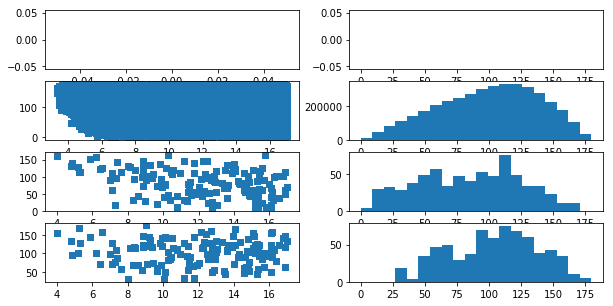

SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(114823, 9)
SSH connected
(41903, 9)
SSH connected
(104053, 9)
SSH connected
(101251, 9)
SSH connected
(33191, 9)
SSH connected
(92613, 9)
SSH connected
(139395, 9)
SSH connected
(45628, 9)
SSH connected
(122869, 9)
SSH connected
(31892, 9)
SSH connected
(10626, 9)
SSH connected
(28868, 9)
SSH connected
(111447, 9)
SSH connected
(39972, 9)
SSH connected
(104233, 9)
SSH connected
(65, 9)
SSH connected
(30, 9)
SSH connected
(59, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(15, 9)
SSH connected
(0, 9)
SSH connected
(10, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH 

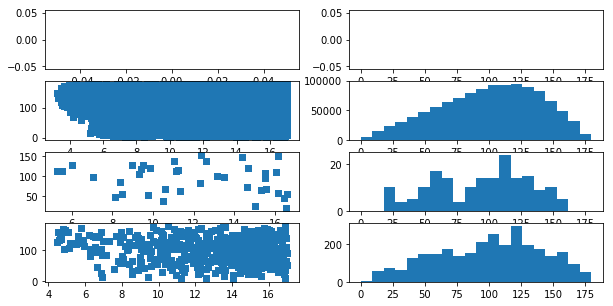

SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(2, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(2, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(104105, 9)
SSH connected
(37022, 9)
SSH connected
(82443, 9)
SSH connected
(170220, 9)
SSH connected
(145044, 9)
SSH connected
(90121, 9)
SSH connected
(31443, 9)
SSH connected
(65034, 9)
SSH connected
(135133, 9)
SSH connected
(123893, 9)
SSH connected
(112973, 9)
SSH connected
(44642, 9)
SSH connected
(96905, 9)
SSH connected
(189307, 9)
SSH connected
(162760, 9)
SSH connected
(25793, 9)
SSH connected
(10693, 9)
SSH connected
(20672, 9)
SSH connected
(39

2019-11-05 11:20:56,804| ERROR   | Could not establish connection from ('127.0.0.1', 55239) to remote side of the tunnel


(106, 9)
SSH connected
(315, 9)
SSH connected
(29, 9)
SSH connected
(440, 9)
SSH connected
(386, 9)
SSH connected
(274, 9)
SSH connected
(1273, 9)
SSH connected
(113, 9)


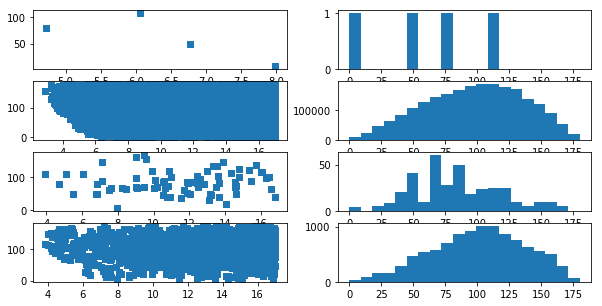

SSH connected
(4, 9)
SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(2, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(131982, 9)
SSH connected
(122580, 9)
SSH connected
(108896, 9)
SSH connected
(112585, 9)
SSH connected
(148556, 9)
SSH connected
(144197, 9)
SSH connected
(35138, 9)
SSH connected
(35220, 9)
SSH connected
(128211, 9)
SSH connected
(117409, 9)
SSH connected
(73, 9)
SSH connected
(41, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(28, 9)
SSH connected
(25, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(1837, 9)
SSH connected
(1493, 9)
SSH connected
(1406, 9)
SSH connected
(1346, 9)
SSH connected
(1807, 9)
SSH connected
(1546, 9)
SSH connected
(445, 9)
SSH connected
(363, 9)
SSH connected
(1822, 9)
SSH connected
(1233, 9)


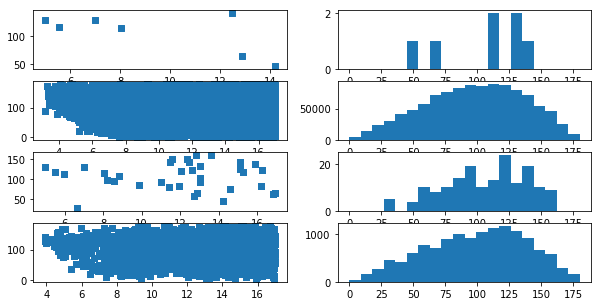

SSH connected
(0, 9)
SSH connected
(3, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(1, 9)
SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(106413, 9)
SSH connected
(60679, 9)
SSH connected
(90533, 9)
SSH connected
(86186, 9)
SSH connected
(50067, 9)
SSH connected
(86668, 9)
SSH connected
(126252, 9)
SSH connected
(69010, 9)
SSH connected
(112870, 9)
SSH connected
(30048, 9)
SSH connected
(17835, 9)
SSH connected
(24719, 9)
SSH connected
(101790, 9)
SSH connected
(56586, 9)
SSH connected
(91331, 9)
SSH connected
(53, 9)
SSH connected
(30, 9)
SSH connected
(39, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(30, 9)
SSH connected
(14, 9)
SSH connected
(19, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH co

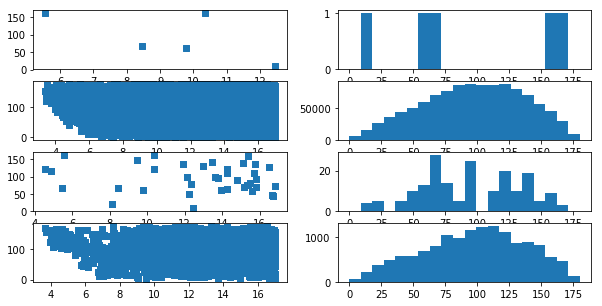

SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(228551, 9)
SSH connected
(94505, 9)
SSH connected
(187291, 9)
SSH connected
(82043, 9)
SSH connected
(243553, 9)
SSH connected
(113979, 9)
SSH connected
(59288, 9)
SSH connected
(25090, 9)
SSH connected
(222735, 9)
SSH connected
(94182, 9)
SSH connected
(136, 9)
SSH connected
(48, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(64, 9)
SSH connected
(15, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(574, 9)
SSH connected
(0, 9)
SSH connected
(453, 9)
SSH connected
(0, 9)
SSH connected
(529, 9)
SSH connected
(0, 9)
SSH connected
(134, 9)
SSH connected
(0, 9)
SSH connected
(507, 9)
SSH connected
(0, 9)


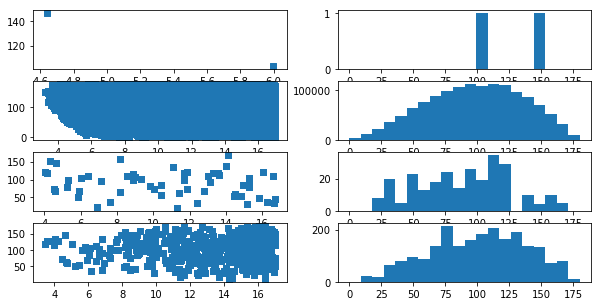

SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(114823, 9)
SSH connected
(101251, 9)
SSH connected
(139395, 9)
SSH connected
(31892, 9)
SSH connected
(111447, 9)
SSH connected
(41903, 9)
SSH connected
(33191, 9)
SSH connected
(45628, 9)
SSH connected
(10626, 9)
SSH connected
(39972, 9)
SSH connected
(104053, 9)
SSH connected
(92613, 9)
SSH connected
(122869, 9)
SSH connected
(28868, 9)
SSH connected
(104233, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(215, 9)
SSH connected
(167, 9)
SSH connected
(242, 9)
SSH connected
(32, 9)
SSH connected
(151, 9)
SSH connected
(482, 9)
SSH connected
(502, 9)
SSH connected
(473, 9)
SSH connected
(

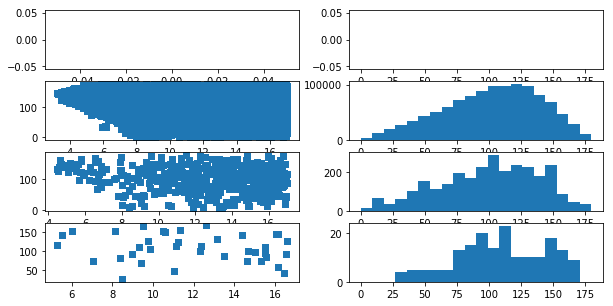

SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(2, 9)
SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(1, 9)
SSH connected
(2, 9)
SSH connected
(68046, 9)
SSH connected
(23717, 9)
SSH connected
(64853, 9)
SSH connected
(23717, 9)
SSH connected
(8846, 9)
SSH connected
(24615, 9)
SSH connected
(64853, 9)
SSH connected
(24615, 9)
SSH connected
(68154, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(135, 9)
SSH connected
(38, 9)
SSH connected
(72, 9)
SSH connected
(286, 9)
SSH connected
(117, 9)
SSH connected
(306, 9)
SSH connected
(0, 9)
SSH connected
(135, 9)
SSH connected
(286, 9)
SSH connected
(0, 9)
SSH connected
(38, 9)
SSH connected
(117, 9)
SSH connected
(0, 9)
SSH connected
(72, 9)
SSH connected
(306, 9)


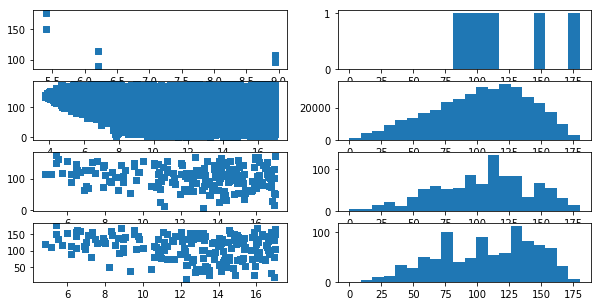

SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(2, 9)
SSH connected
(3, 9)
SSH connected
(1, 9)
SSH connected
(2, 9)
SSH connected
(1, 9)
SSH connected
(3, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(7, 9)
SSH connected
(1, 9)
SSH connected
(58644, 9)
SSH connected
(22254, 9)
SSH connected
(46066, 9)
SSH connected
(88868, 9)
SSH connected
(74735, 9)
SSH connected
(21250, 9)
SSH connected
(8669, 9)
SSH connected
(17092, 9)
SSH connected
(36613, 9)
SSH connected
(28252, 9)
SSH connected
(62918, 9)
SSH connected
(20161, 9)
SSH connected
(44177, 9)
SSH connected
(92503, 9)
SSH connected
(76863, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(116, 9)
SSH connected
(61, 9)
SSH connected
(84, 9)
SSH connected
(243, 9)
SSH connected
(115, 9)
SSH connected
(301, 9)
SSH connected
(106, 9)
SSH connected
(195, 9)
SSH connected
(433, 9)
S

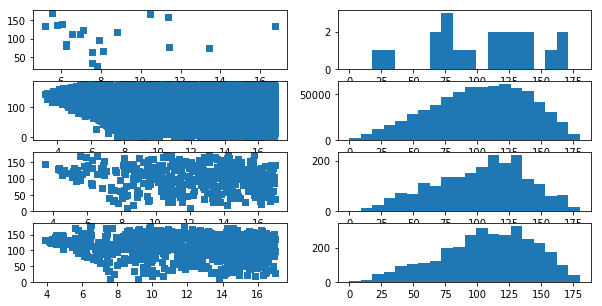

SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(5, 9)
SSH connected
(0, 9)
SSH connected
(9, 9)
SSH connected
(9, 9)
SSH connected
(73318, 9)
SSH connected
(70552, 9)
SSH connected
(25735, 9)
SSH connected
(23095, 9)
SSH connected
(76247, 9)
SSH connected
(68399, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(140, 9)
SSH connected
(122, 9)
SSH connected
(354, 9)
SSH connected
(275, 9)
SSH connected
(985, 9)
SSH connected
(722, 9)
SSH connected
(401, 9)
SSH connected
(238, 9)
SSH connected
(952, 9)
SSH connected
(774, 9)


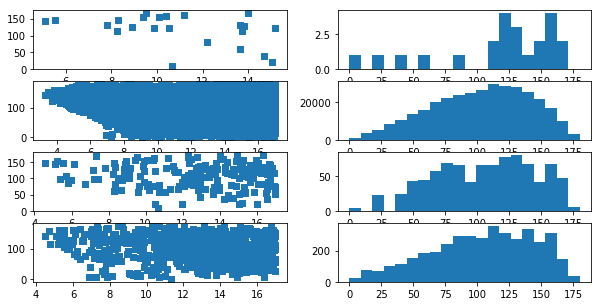

SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(4, 9)
SSH connected
(0, 9)
SSH connected
(2, 9)
SSH connected
(16, 9)
SSH connected
(1, 9)
SSH connected
(59394, 9)
SSH connected
(32866, 9)
SSH connected
(53222, 9)
SSH connected
(21084, 9)
SSH connected
(11998, 9)
SSH connected
(16857, 9)
SSH connected
(56460, 9)
SSH connected
(34933, 9)
SSH connected
(54748, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(67, 9)
SSH connected
(115, 9)
SSH connected
(43, 9)
SSH connected
(252, 9)
SSH connected
(242, 9)
SSH connected
(115, 9)
SSH connected
(234, 9)
SSH connected
(1538, 9)
SSH connected
(65, 9)
SSH connected
(61, 9)
SSH connected
(656, 9)
SSH connected
(52, 9)
SSH connected
(182, 9)
SSH connected
(1667, 9)
SSH connected
(74, 9)


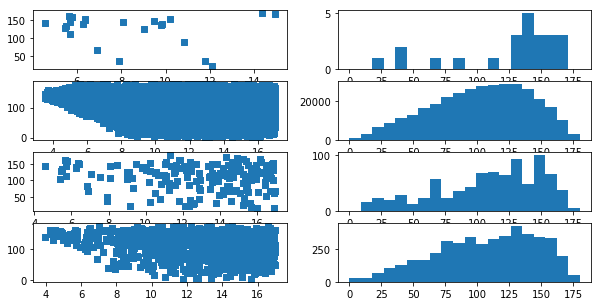

SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(117260, 9)
SSH connected
(51882, 9)
SSH connected
(45411, 9)
SSH connected
(19533, 9)
SSH connected
(117871, 9)
SSH connected
(52735, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(259, 9)
SSH connected
(85, 9)
SSH connected
(714, 9)
SSH connected
(249, 9)
SSH connected
(336, 9)
SSH connected
(0, 9)
SSH connected
(125, 9)
SSH connected
(0, 9)
SSH connected
(194, 9)
SSH connected
(0, 9)


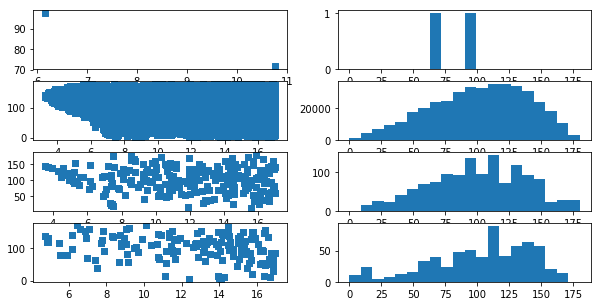

SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(2, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(2, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(104105, 9)
SSH connected
(90121, 9)
SSH connected
(112973, 9)
SSH connected
(25793, 9)
SSH connected
(95287, 9)
SSH connected
(37022, 9)
SSH connected
(31443, 9)
SSH connected
(44642, 9)
SSH connected
(10693, 9)
SSH connected
(36672, 9)
SSH connected
(82443, 9)
SSH connected
(65034, 9)
SSH connected
(96905, 9)
SSH connected
(20672, 9)
SSH connected
(76970, 9)
SSH connected
(170220, 9)
SSH connected
(135133, 9)
SSH connected
(189307, 9)
SSH connected
(39436

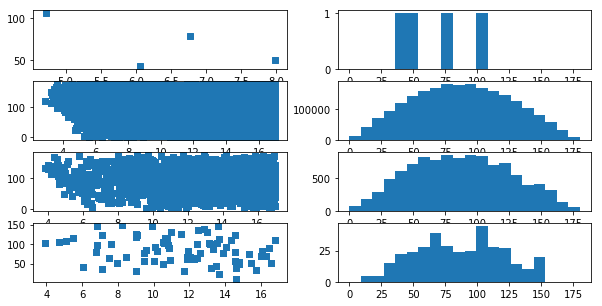

SSH connected
(0, 9)
SSH connected
(2, 9)
SSH connected
(3, 9)
SSH connected
(0, 9)
SSH connected
(3, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(2, 9)
SSH connected
(7, 9)
SSH connected
(0, 9)
SSH connected
(1, 9)
SSH connected
(1, 9)
SSH connected
(58644, 9)
SSH connected
(21250, 9)
SSH connected
(62918, 9)
SSH connected
(22254, 9)
SSH connected
(8669, 9)
SSH connected
(20161, 9)
SSH connected
(46066, 9)
SSH connected
(17092, 9)
SSH connected
(44177, 9)
SSH connected
(88868, 9)
SSH connected
(36613, 9)
SSH connected
(92503, 9)
SSH connected
(74735, 9)
SSH connected
(28252, 9)
SSH connected
(76863, 9)
SSH connected
(206, 9)
SSH connected
(137, 9)
SSH connected
(205, 9)
SSH connected
(301, 9)
SSH connected
(132, 9)
SSH connected
(268, 9)
SSH connected
(208, 9)
SSH connected
(123, 9)
SSH connected
(183, 9)
SSH connected
(594, 9)
SSH connected
(256, 9)
SSH connected
(459, 9)
SSH connected
(63, 9)
SSH connected

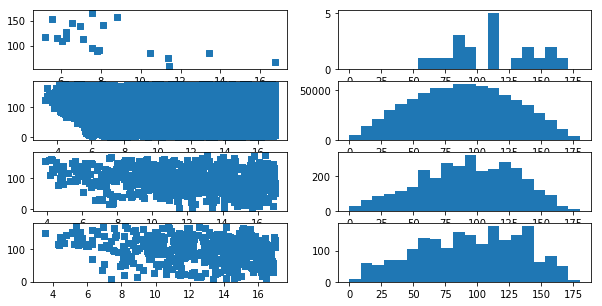

SSH connected
(0, 9)
SSH connected
(5, 9)
SSH connected
(6, 9)
SSH connected
(6, 9)
SSH connected
(1, 9)
SSH connected
(5, 9)
SSH connected
(0, 9)
SSH connected
(8, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(6, 9)
SSH connected
(8, 9)
SSH connected
(0, 9)
SSH connected
(2, 9)
SSH connected
(0, 9)
SSH connected
(6, 9)
SSH connected
(0, 9)
SSH connected
(2, 9)
SSH connected
(10, 9)
SSH connected
(3, 9)
SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(3, 9)
SSH connected
(0, 9)
SSH connected
(60490, 9)
SSH connected
(20355, 9)
SSH connected
(43225, 9)
SSH connected
(86589, 9)
SSH connected
(76759, 9)
SSH connected
(20355, 9)
SSH connected
(11488, 9)
SSH connected
(15866, 9)
SSH connected
(32853, 9)
SSH connected
(26560, 9)
SSH connected
(43225, 9)
SSH connected
(15866, 9)
SSH connected
(36278, 9)
SSH connected
(65710, 9)
SSH connected
(55102, 9)
SSH connected
(86589, 9)
SSH connected
(32853, 9)
SSH connected
(65710, 9)
SSH connected
(143918, 9

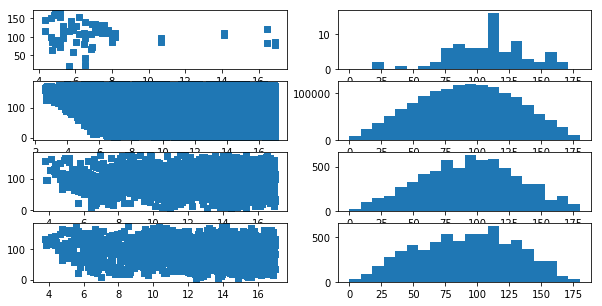

SSH connected
(4, 9)
SSH connected
(0, 9)
SSH connected
(3, 9)
SSH connected
(4, 9)
SSH connected
(3, 9)
SSH connected
(2, 9)
SSH connected
(23, 9)
SSH connected
(3, 9)
SSH connected
(4, 9)
SSH connected
(0, 9)
SSH connected
(69062, 9)
SSH connected
(64438, 9)
SSH connected
(23199, 9)
SSH connected
(21701, 9)
SSH connected
(50945, 9)
SSH connected
(48324, 9)
SSH connected
(106549, 9)
SSH connected
(92815, 9)
SSH connected
(91625, 9)
SSH connected
(83741, 9)
SSH connected
(244, 9)
SSH connected
(174, 9)
SSH connected
(253, 9)
SSH connected
(201, 9)
SSH connected
(141, 9)
SSH connected
(162, 9)
SSH connected
(523, 9)
SSH connected
(311, 9)
SSH connected
(64, 9)
SSH connected
(43, 9)
SSH connected
(860, 9)
SSH connected
(649, 9)
SSH connected
(385, 9)
SSH connected
(157, 9)
SSH connected
(498, 9)
SSH connected
(336, 9)
SSH connected
(1557, 9)
SSH connected
(1046, 9)
SSH connected
(1363, 9)
SSH connected
(1162, 9)


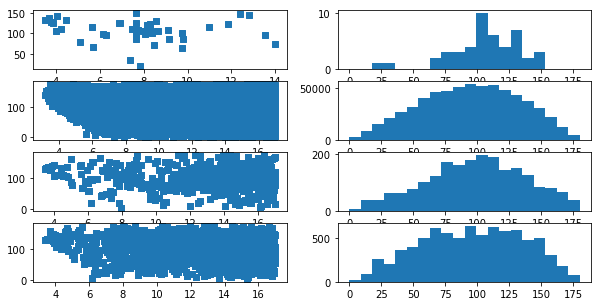

SSH connected
(1, 9)
SSH connected
(10, 9)
SSH connected
(1, 9)
SSH connected
(3, 9)
SSH connected
(17, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(10, 9)
SSH connected
(0, 9)
SSH connected
(6, 9)
SSH connected
(21, 9)
SSH connected
(6, 9)
SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(1, 9)
SSH connected
(53993, 9)
SSH connected
(28407, 9)
SSH connected
(52840, 9)
SSH connected
(18318, 9)
SSH connected
(12310, 9)
SSH connected
(15252, 9)
SSH connected
(42043, 9)
SSH connected
(21315, 9)
SSH connected
(38292, 9)
SSH connected
(81053, 9)
SSH connected
(46482, 9)
SSH connected
(72296, 9)
SSH connected
(69857, 9)
SSH connected
(41836, 9)
SSH connected
(61511, 9)
SSH connected
(214, 9)
SSH connected
(124, 9)
SSH connected
(117, 9)
SSH connected
(133, 9)
SSH connected
(160, 9)
SSH connected
(181, 9)
SSH connected
(116, 9)
SSH connected
(76, 9)
SSH connected
(122, 9)
SSH connected
(409, 9)
SSH connected
(303, 9)
SSH connected
(212, 9)
SSH connected
(22, 9)
SSH conne

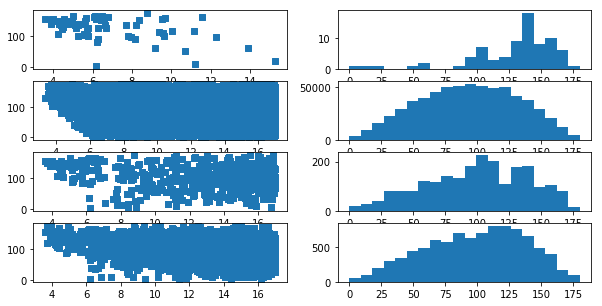

SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(4, 9)
SSH connected
(0, 9)
SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(14, 9)
SSH connected
(0, 9)
SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(111400, 9)
SSH connected
(48477, 9)
SSH connected
(45992, 9)
SSH connected
(19170, 9)
SSH connected
(81893, 9)
SSH connected
(39323, 9)
SSH connected
(186177, 9)
SSH connected
(76746, 9)
SSH connected
(158142, 9)
SSH connected
(65963, 9)
SSH connected
(606, 9)
SSH connected
(169, 9)
SSH connected
(532, 9)
SSH connected
(218, 9)
SSH connected
(421, 9)
SSH connected
(140, 9)
SSH connected
(1792, 9)
SSH connected
(407, 9)
SSH connected
(170, 9)
SSH connected
(37, 9)
SSH connected
(206, 9)
SSH connected
(0, 9)
SSH connected
(190, 9)
SSH connected
(0, 9)
SSH connected
(160, 9)
SSH connected
(0, 9)
SSH connected
(471, 9)
SSH connected
(0, 9)
SSH connected
(461, 9)
SSH connected
(0, 9)


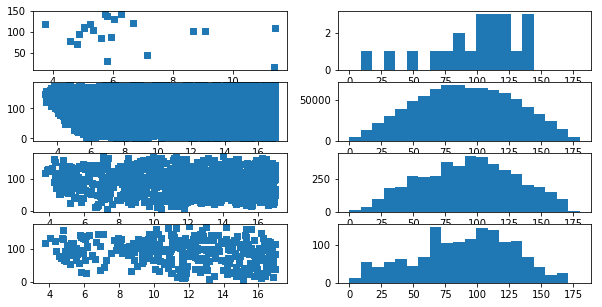

SSH connected
(4, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(2, 9)
SSH connected
(0, 9)
SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(131982, 9)
SSH connected
(108896, 9)
SSH connected
(148556, 9)
SSH connected
(35138, 9)
SSH connected
(128211, 9)
SSH connected
(122580, 9)
SSH connected
(112585, 9)
SSH connected
(144197, 9)
SSH connected
(35220, 9)
SSH connected
(117409, 9)
SSH connected
(1837, 9)
SSH connected
(1406, 9)
SSH connected
(1807, 9)
SSH connected
(445, 9)
SSH connected
(1822, 9)
SSH connected
(1493, 9)
SSH connected
(1346, 9)
SSH connected
(1546, 9)
SSH connected
(363, 9)
SSH connected
(1233, 9)
SSH connected
(73, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(28, 9)
SSH connected
(0, 9)
SSH connected
(41, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(25, 9)
SSH connected
(0, 9)


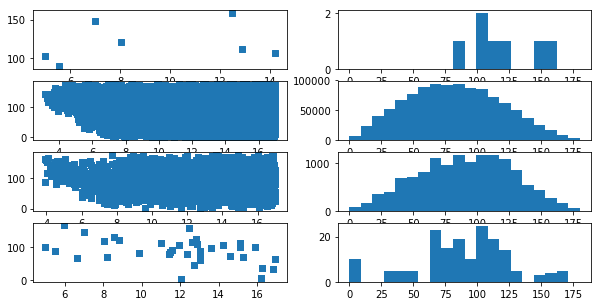

SSH connected
(0, 9)
SSH connected
(5, 9)
SSH connected
(9, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(9, 9)
SSH connected
(73318, 9)
SSH connected
(25735, 9)
SSH connected
(76247, 9)
SSH connected
(70552, 9)
SSH connected
(23095, 9)
SSH connected
(68399, 9)
SSH connected
(985, 9)
SSH connected
(401, 9)
SSH connected
(952, 9)
SSH connected
(722, 9)
SSH connected
(238, 9)
SSH connected
(774, 9)
SSH connected
(0, 9)
SSH connected
(140, 9)
SSH connected
(354, 9)
SSH connected
(0, 9)
SSH connected
(122, 9)
SSH connected
(275, 9)


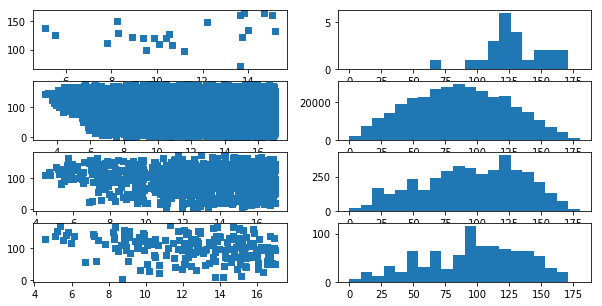

SSH connected
(4, 9)
SSH connected
(3, 9)
SSH connected
(3, 9)
SSH connected
(23, 9)
SSH connected
(4, 9)
SSH connected
(0, 9)
SSH connected
(4, 9)
SSH connected
(2, 9)
SSH connected
(3, 9)
SSH connected
(0, 9)
SSH connected
(69062, 9)
SSH connected
(23199, 9)
SSH connected
(50945, 9)
SSH connected
(106549, 9)
SSH connected
(91625, 9)
SSH connected
(64438, 9)
SSH connected
(21701, 9)
SSH connected
(48324, 9)
SSH connected
(92815, 9)
SSH connected
(83741, 9)
SSH connected
(860, 9)
SSH connected
(385, 9)
SSH connected
(498, 9)
SSH connected
(1557, 9)
SSH connected
(1363, 9)
SSH connected
(649, 9)
SSH connected
(157, 9)
SSH connected
(336, 9)
SSH connected
(1046, 9)
SSH connected
(1162, 9)
SSH connected
(244, 9)
SSH connected
(253, 9)
SSH connected
(141, 9)
SSH connected
(523, 9)
SSH connected
(64, 9)
SSH connected
(174, 9)
SSH connected
(201, 9)
SSH connected
(162, 9)
SSH connected
(311, 9)
SSH connected
(43, 9)


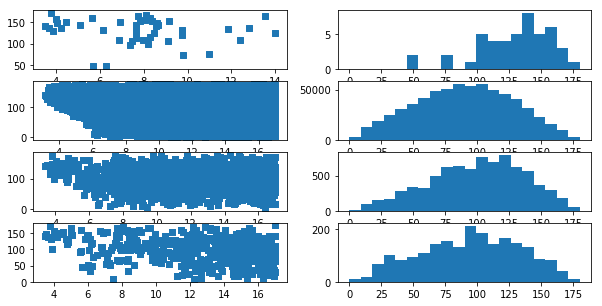

SSH connected
(20, 9)
SSH connected
(21, 9)
SSH connected
(21, 9)
SSH connected
(16, 9)
SSH connected
(84176, 9)
SSH connected
(80433, 9)
SSH connected
(80433, 9)
SSH connected
(88376, 9)
SSH connected
(976, 9)
SSH connected
(774, 9)
SSH connected
(888, 9)
SSH connected
(607, 9)
SSH connected
(976, 9)
SSH connected
(888, 9)
SSH connected
(774, 9)
SSH connected
(607, 9)


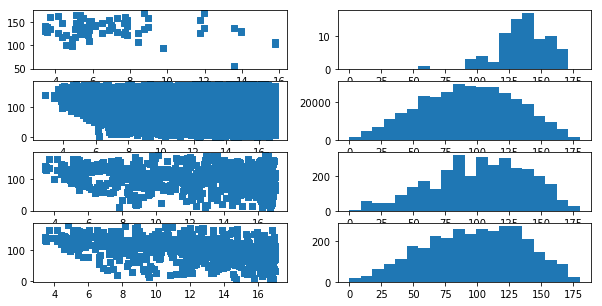

SSH connected
(5, 9)
SSH connected
(54, 9)
SSH connected
(3, 9)
SSH connected
(8, 9)
SSH connected
(48, 9)
SSH connected
(1, 9)
SSH connected
(70012, 9)
SSH connected
(39386, 9)
SSH connected
(66405, 9)
SSH connected
(77529, 9)
SSH connected
(33323, 9)
SSH connected
(70734, 9)
SSH connected
(675, 9)
SSH connected
(615, 9)
SSH connected
(464, 9)
SSH connected
(420, 9)
SSH connected
(526, 9)
SSH connected
(297, 9)
SSH connected
(295, 9)
SSH connected
(1806, 9)
SSH connected
(125, 9)
SSH connected
(211, 9)
SSH connected
(1100, 9)
SSH connected
(63, 9)


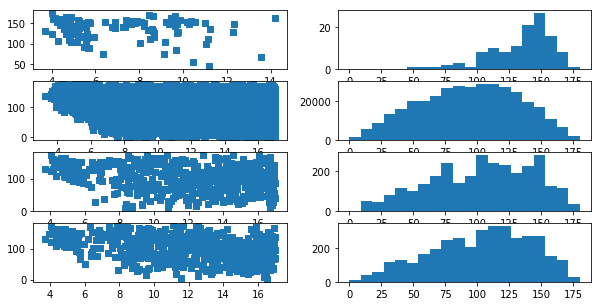

SSH connected
(11, 9)
SSH connected
(0, 9)
SSH connected
(3, 9)
SSH connected
(0, 9)
SSH connected
(141490, 9)
SSH connected
(60713, 9)
SSH connected
(128017, 9)
SSH connected
(61341, 9)
SSH connected
(2362, 9)
SSH connected
(689, 9)
SSH connected
(1634, 9)
SSH connected
(487, 9)
SSH connected
(243, 9)
SSH connected
(0, 9)
SSH connected
(199, 9)
SSH connected
(0, 9)


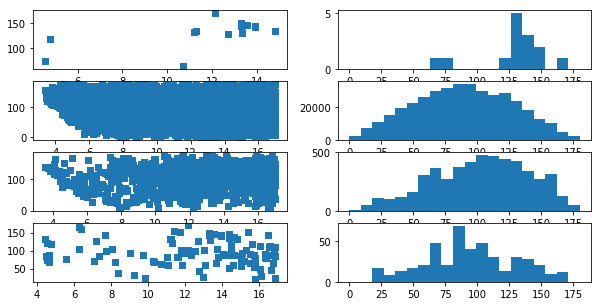

SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(3, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(106413, 9)
SSH connected
(86186, 9)
SSH connected
(126252, 9)
SSH connected
(30048, 9)
SSH connected
(101790, 9)
SSH connected
(60679, 9)
SSH connected
(50067, 9)
SSH connected
(69010, 9)
SSH connected
(17835, 9)
SSH connected
(56586, 9)
SSH connected
(90533, 9)
SSH connected
(86668, 9)
SSH connected
(112870, 9)
SSH connected
(24719, 9)
SSH connected
(91331, 9)
SSH connected
(358, 9)
SSH connected
(358, 9)
SSH connected
(449, 9)
SSH connected
(83, 9)
SSH connected
(335, 9)
SSH connected
(2704, 9)
SSH connected
(2353, 9)
SSH connected
(3213, 9)
SSH connected
(823, 9)
SSH connected
(2766, 9)
SSH connected
(251, 9)
SSH connected
(183, 9)
SSH connected
(276, 9)
SSH 

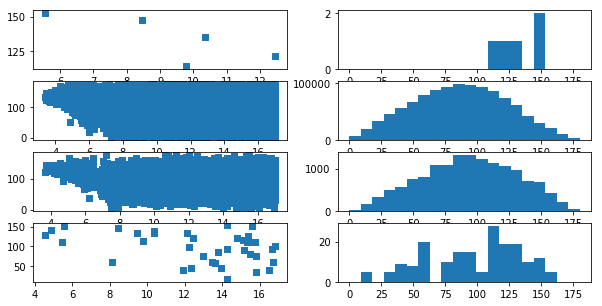

SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(2, 9)
SSH connected
(0, 9)
SSH connected
(4, 9)
SSH connected
(16, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(1, 9)
SSH connected
(59394, 9)
SSH connected
(21084, 9)
SSH connected
(56460, 9)
SSH connected
(32866, 9)
SSH connected
(11998, 9)
SSH connected
(34933, 9)
SSH connected
(53222, 9)
SSH connected
(16857, 9)
SSH connected
(54748, 9)
SSH connected
(234, 9)
SSH connected
(61, 9)
SSH connected
(182, 9)
SSH connected
(1538, 9)
SSH connected
(656, 9)
SSH connected
(1667, 9)
SSH connected
(65, 9)
SSH connected
(52, 9)
SSH connected
(74, 9)
SSH connected
(0, 9)
SSH connected
(67, 9)
SSH connected
(252, 9)
SSH connected
(0, 9)
SSH connected
(115, 9)
SSH connected
(242, 9)
SSH connected
(0, 9)
SSH connected
(43, 9)
SSH connected
(115, 9)


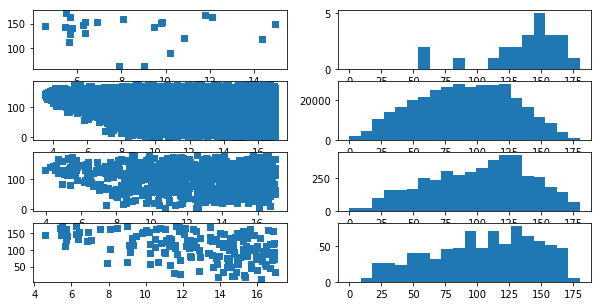

SSH connected
(1, 9)
SSH connected
(3, 9)
SSH connected
(0, 9)
SSH connected
(6, 9)
SSH connected
(1, 9)
SSH connected
(10, 9)
SSH connected
(17, 9)
SSH connected
(10, 9)
SSH connected
(21, 9)
SSH connected
(0, 9)
SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(6, 9)
SSH connected
(1, 9)
SSH connected
(53993, 9)
SSH connected
(18318, 9)
SSH connected
(42043, 9)
SSH connected
(81053, 9)
SSH connected
(69857, 9)
SSH connected
(28407, 9)
SSH connected
(12310, 9)
SSH connected
(21315, 9)
SSH connected
(46482, 9)
SSH connected
(41836, 9)
SSH connected
(52840, 9)
SSH connected
(15252, 9)
SSH connected
(38292, 9)
SSH connected
(72296, 9)
SSH connected
(61511, 9)
SSH connected
(276, 9)
SSH connected
(109, 9)
SSH connected
(106, 9)
SSH connected
(341, 9)
SSH connected
(300, 9)
SSH connected
(1421, 9)
SSH connected
(656, 9)
SSH connected
(797, 9)
SSH connected
(2566, 9)
SSH connected
(2278, 9)
SSH connected
(90, 9)
SSH connected
(56, 9)
SSH connected
(68, 9)
SSH con

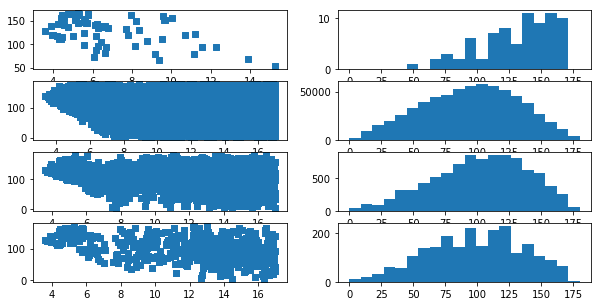

SSH connected
(5, 9)
SSH connected
(8, 9)
SSH connected
(54, 9)
SSH connected
(48, 9)
SSH connected
(3, 9)
SSH connected
(1, 9)
SSH connected
(70012, 9)
SSH connected
(77529, 9)
SSH connected
(39386, 9)
SSH connected
(33323, 9)
SSH connected
(66405, 9)
SSH connected
(70734, 9)
SSH connected
(295, 9)
SSH connected
(211, 9)
SSH connected
(1806, 9)
SSH connected
(1100, 9)
SSH connected
(125, 9)
SSH connected
(63, 9)
SSH connected
(675, 9)
SSH connected
(420, 9)
SSH connected
(615, 9)
SSH connected
(526, 9)
SSH connected
(464, 9)
SSH connected
(297, 9)


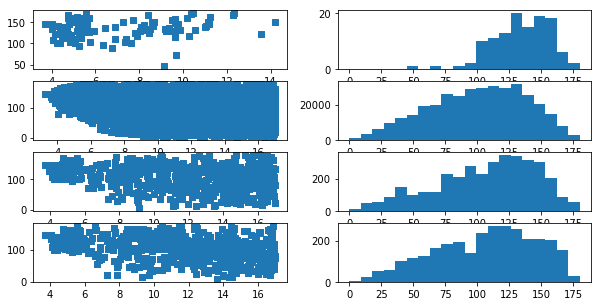

SSH connected
(2, 9)
SSH connected
(15, 9)
SSH connected
(2, 9)
SSH connected
(15, 9)
SSH connected
(66, 9)
SSH connected
(1, 9)
SSH connected
(2, 9)
SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(59078, 9)
SSH connected
(29542, 9)
SSH connected
(47244, 9)
SSH connected
(29542, 9)
SSH connected
(21286, 9)
SSH connected
(22145, 9)
SSH connected
(47244, 9)
SSH connected
(22145, 9)
SSH connected
(56038, 9)
SSH connected
(178, 9)
SSH connected
(176, 9)
SSH connected
(106, 9)
SSH connected
(1086, 9)
SSH connected
(1034, 9)
SSH connected
(589, 9)
SSH connected
(86, 9)
SSH connected
(31, 9)
SSH connected
(41, 9)
SSH connected
(178, 9)
SSH connected
(1086, 9)
SSH connected
(86, 9)
SSH connected
(176, 9)
SSH connected
(1034, 9)
SSH connected
(31, 9)
SSH connected
(106, 9)
SSH connected
(589, 9)
SSH connected
(41, 9)


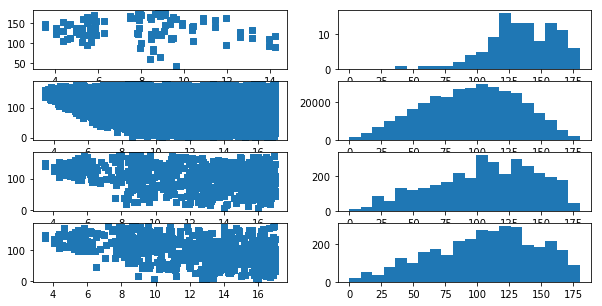

SSH connected
(2, 9)
SSH connected
(0, 9)
SSH connected
(13, 9)
SSH connected
(0, 9)
SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(111831, 9)
SSH connected
(51067, 9)
SSH connected
(65898, 9)
SSH connected
(26649, 9)
SSH connected
(91805, 9)
SSH connected
(45441, 9)
SSH connected
(484, 9)
SSH connected
(204, 9)
SSH connected


2019-11-05 14:10:02,495| ERROR   | Could not establish connection from ('127.0.0.1', 61443) to remote side of the tunnel


(3732, 9)
SSH connected
(1187, 9)
SSH connected
(200, 9)
SSH connected
(70, 9)
SSH connected
(188, 9)
SSH connected
(0, 9)
SSH connected
(214, 9)
SSH connected
(0, 9)
SSH connected
(124, 9)
SSH connected
(0, 9)


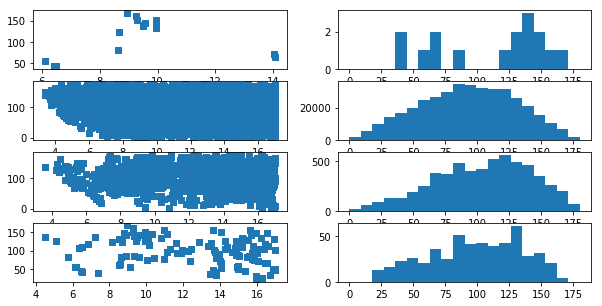

SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(228551, 9)
SSH connected
(187291, 9)
SSH connected
(243553, 9)
SSH connected
(59288, 9)
SSH connected
(222735, 9)
SSH connected
(94505, 9)
SSH connected
(82043, 9)
SSH connected
(113979, 9)
SSH connected
(25090, 9)
SSH connected
(94182, 9)
SSH connected
(574, 9)
SSH connected
(453, 9)
SSH connected
(529, 9)
SSH connected
(134, 9)
SSH connected
(507, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(136, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(64, 9)
SSH connected
(0, 9)
SSH connected
(48, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(15, 9)
SSH connected
(0, 9)


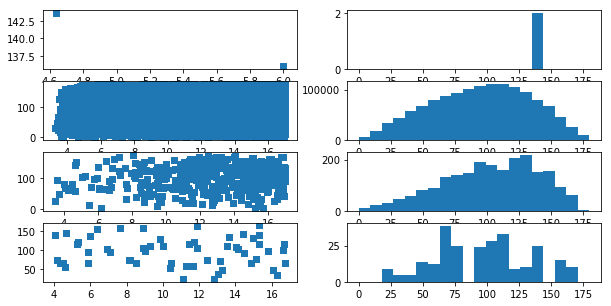

SSH connected
(0, 9)
SSH connected
(1, 9)
SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(117260, 9)
SSH connected
(45411, 9)
SSH connected
(117871, 9)
SSH connected
(51882, 9)
SSH connected
(19533, 9)
SSH connected
(52735, 9)
SSH connected
(336, 9)
SSH connected
(125, 9)
SSH connected
(194, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(259, 9)
SSH connected
(714, 9)
SSH connected
(0, 9)
SSH connected
(85, 9)
SSH connected
(249, 9)


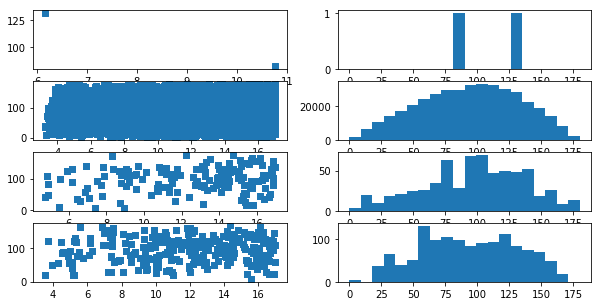

SSH connected
(1, 9)
SSH connected
(4, 9)
SSH connected
(1, 9)
SSH connected
(14, 9)
SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(111400, 9)
SSH connected
(45992, 9)
SSH connected
(81893, 9)
SSH connected
(186177, 9)
SSH connected
(158142, 9)
SSH connected
(48477, 9)
SSH connected
(19170, 9)
SSH connected
(39323, 9)
SSH connected
(76746, 9)
SSH connected
(65963, 9)
SSH connected
(206, 9)
SSH connected
(190, 9)
SSH connected
(160, 9)
SSH connected
(471, 9)
SSH connected
(461, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(606, 9)
SSH connected
(532, 9)
SSH connected
(421, 9)
SSH connected
(1792, 9)
SSH connected
(170, 9)
SSH connected
(169, 9)
SSH connected
(218, 9)
SSH connected
(140, 9)
SSH connected
(407, 9)
SSH connected
(37, 9)


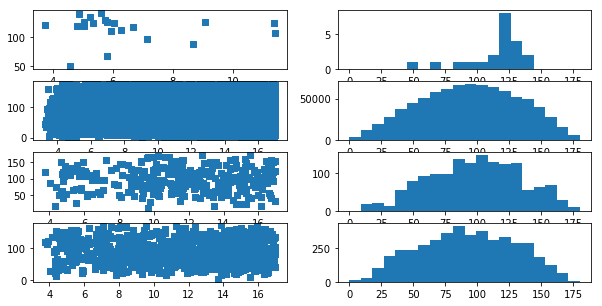

SSH connected
(11, 9)
SSH connected
(3, 9)
SSH connected


2019-11-05 14:28:30,009| ERROR   | Could not establish connection from ('127.0.0.1', 50191) to remote side of the tunnel


(0, 9)
SSH connected
(0, 9)
SSH connected
(141490, 9)
SSH connected
(128017, 9)
SSH connected
(60713, 9)
SSH connected
(61341, 9)
SSH connected
(243, 9)
SSH connected
(199, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(2362, 9)
SSH connected
(1634, 9)
SSH connected
(689, 9)
SSH connected
(487, 9)


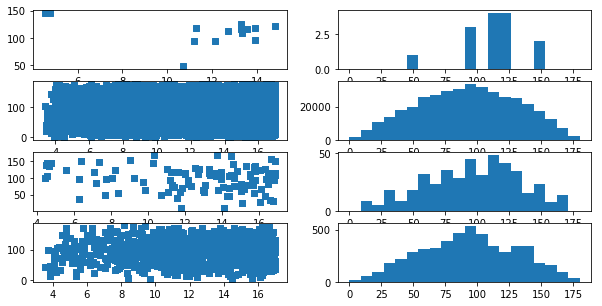

SSH connected
(2, 9)
SSH connected
(13, 9)
SSH connected
(1, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(111831, 9)
SSH connected
(65898, 9)
SSH connected
(91805, 9)
SSH connected
(51067, 9)
SSH connected
(26649, 9)
SSH connected
(45441, 9)
SSH connected
(188, 9)
SSH connected
(214, 9)
SSH connected
(124, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(484, 9)
SSH connected
(3732, 9)
SSH connected
(200, 9)
SSH connected
(204, 9)
SSH connected
(1187, 9)
SSH connected
(70, 9)


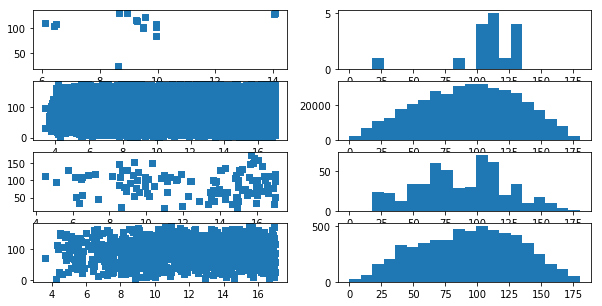

SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(259638, 9)
SSH connected
(100589, 9)
SSH connected
(100589, 9)
SSH connected
(43876, 9)
SSH connected
(810, 9)
SSH connected
(194, 9)
SSH connected
(0, 9)
SSH connected
(0, 9)
SSH connected
(810, 9)
SSH connected
(0, 9)
SSH connected
(194, 9)
SSH connected
(0, 9)


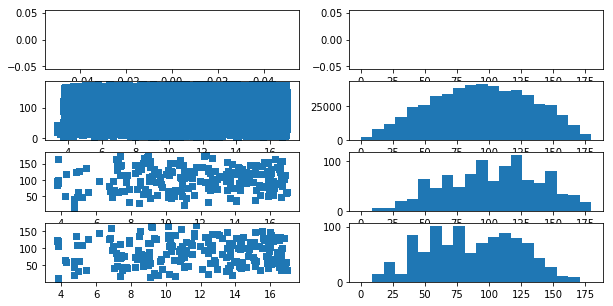

In [68]:
for i in range(1,7):
    for j in range(1,7):
        type_one = amino_acid_property_by_type[i]
        type_two = amino_acid_property_by_type[j]
        fig.suptitle('{} and {}'.format(str(i),str(j)))
        fig, axs = plt.subplots(4, 2,figsize=(10,5))
        
        plot_data = pd.DataFrame()
        for res_1 in type_one:
            for res_2 in type_two:
                active_data = Two_residues_generic_retrieval(res_1,res_2,"=","=")
                active_data = active_data[(active_data["Distance"]<17)&(active_data["Distance"]>0)]
                print(active_data.shape)
                plot_data = pd.concat([active_data,plot_data])
        
        axs[0,0].scatter(plot_data["Distance"],plot_data["Angle"],marker = "s")
        axs[0,1].hist([float(x) for x in plot_data["Angle"]], bins=20,range=(0,180)) 
        
        plot_data = pd.DataFrame()
        for res_1 in type_one:
            for res_2 in type_two:
                active_data = Two_residues_generic_retrieval(res_1,res_2,"!=","!=")
                active_data = active_data[(active_data["Distance"]<17)&(active_data["Distance"]>0)]
                print(active_data.shape)
                plot_data = pd.concat([active_data,plot_data])
        
        axs[1,0].scatter(plot_data["Distance"],plot_data["Angle"],marker = "s")
        axs[1,1].hist([float(x) for x in plot_data["Angle"]], bins=20,range=(0,180)) 

        plot_data = pd.DataFrame()
        for res_1 in type_one:
            for res_2 in type_two:
                active_data = Two_residues_generic_retrieval(res_1,res_2,"=","!=")
                active_data = active_data[(active_data["Distance"]<17)&(active_data["Distance"]>0)]
                print(active_data.shape)
                plot_data = pd.concat([active_data,plot_data])
        
        axs[2,0].scatter(plot_data["Distance"],plot_data["Angle"],marker = "s")
        axs[2,1].hist([float(x) for x in plot_data["Angle"]], bins=20,range=(0,180))
        
        plot_data = pd.DataFrame()
        for res_1 in type_one:
            for res_2 in type_two:
                active_data = Two_residues_generic_retrieval(res_1,res_2,"!=","=")
                active_data = active_data[(active_data["Distance"]<17)&(active_data["Distance"]>0)]
                print(active_data.shape)
                plot_data = pd.concat([active_data,plot_data])
        
        axs[3,0].scatter(plot_data["Distance"],plot_data["Angle"],marker = "s")
        axs[3,1].hist([float(x) for x in plot_data["Angle"]], bins=20,range=(0,180))
        
        fig.savefig("Y:/Yuan/temp/Two_way_plots/{}_and_{}".format(str(i),str(j)))
        plt.show()

In [62]:
plot_data

ID pdbID chain ID_1 Res_1 ID_2 Res_2  Distance  Angle
0     506427  1b65     A  289   GLY  289   GLY       0.0    0.0
1     818209  1azw     A   43   GLY   43   GLY       0.0    0.0
2    1252859  1fy2     A   88   GLY   88   GLY       0.0    0.0
3    3705054  1k32     A  918   GLY  918   GLY       0.0    0.0
4    4024907  1ssx     A  193   GLY  193   GLY       0.0    0.0
5    4570143  1pq5     A  193   GLY  193   GLY       0.0    0.0
6    4784584  1rtf     B  193   GLY  193   GLY       0.0    0.0
7    4844447  1qrz     A  742   GLY  742   GLY       0.0    0.0
8    4955577  1tyf     A   68   GLY   68   GLY       0.0    0.0
9    5037089  1rgq     A  140   GLY  140   GLY       0.0    0.0
10   5310853  1cqq     A  145   GLY  145   GLY       0.0    0.0
11   5562124  1cvr     A  212   GLY  212   GLY       0.0    0.0
12   6411770  1qx3     A  122   GLY  122   GLY       0.0    0.0
13   6464754  1qtn     A  350   GLY  350   GLY       0.0    0.0
14   6491849  1nw9     B  238   GLY  238   GLY       0.0    0.0
15   6677168  1a30     A   27   GLY   27   GLY       0.0    0.0
16  10171199  1ryp     I   47   GLY   47   GLY       0.0    0.0